<a href="https://colab.research.google.com/github/Luis-Alves2/ColabChagasInteg/blob/main/Mortalidade_Chagas_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio da semana:

### Objetivo principal
Caracterizar o perfil de mortalidade associada à Doença de Chagas nos últimos cinco anos disponíveis nas bases de dados do DataSUS.

### Objetivos específicos:
- Identificar possíveis partes interessadas no problema e sondar com estas quais são as cinco perguntas mais relevantes em relação ao objetivo principal;
- Planejar quais serão os dados adicionais necessários para compor a análise;
- Realizar uma análise exploratória dos dados para diagnosticar os *missing values*, quais variáveis serão incluídas ou excluídas da análise (e os respectivos porquês) e quais são as transformações que vocês julgam necessárias para trabalhar com os dados;
- Realizar uma análise descritiva dos dados para responder as perguntas levantadas na etapa inicial;

### Requisitos:
- Dados extraídos diretamente do DataSUS usando o PySUS;
- Codificação seguindo o CID-10 e trazer, além dos códigos, a descrição (nome) do mesmo;
- As saídas dos códigos devem estar em um mesmo formato para que possamos agregar e/ou comparar os resultados;
- Os gráficos não devem ser estáticos e devem permitir algum nível de interação com o usuário;


### ANÁLISE BÁSICA DOS DADOS



In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
!sudo apt install libffi-dev
!sudo pip install PySUS
!sudo pip install pandas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libffi-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 63.7 kB of archives.
After this operation, 336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libffi-dev amd64 3.4.2-4 [63.7 kB]
Fetched 63.7 kB in 0s (716 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libffi-dev:amd64.
(Reading database ... 121752 files and directori

In [ ]:
#Importando as bibliotecas
from pysus.online_data import SIM
from pysus.preprocessing.decoders import decodifica_idade_SIM, translate_variables_SIM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pd.set_option('max_columns', 100)
#pd.set_option('max_rows', 100)

In [ ]:
# Set max_columns option
pd.set_option('display.max_columns', 100)

# Set max_rows option
pd.set_option('display.max_rows', 100)


In [ ]:
from pysus.ftp.databases.sim import SIM
sim = SIM().load() # Loads the files from DATASUS

In [ ]:
sim.metadata

{'long_name': 'Sistema de Informação sobre Mortalidade',
 'source': 'http://sim.saude.gov.br',
 'description': ''}

In [ ]:
sim.groups

{'CID10': 'DO', 'CID9': 'DOR'}

In [ ]:
sim.get_files("CID10", uf="SP", year=2018)
#[DORSP95.DBC]
#sim.get_files("CID10", uf=["SP", "RJ"], year=[2019, 2020, 2021])
#[DORJ2019.dbc,
# DORJ2020.dbc,
# DORJ2021.dbc,
# DOSP2019.dbc,
# DOSP2020.dbc,
# DOSP2021.dbc]
files = sim.get_files(["CID9", "CID10"], uf=["SP"], year=[1995, 2020])
files = sim.get_files("CID10", uf="SP", year=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
sp_cidB = files

In [ ]:
#Obtendo os dados de mortalidade para Chagas (todos os CIDs) para um conjunto de estados, nos últimos anos
uf = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
uf_prov = ['PE','PB']
chagas = pd.DataFrame()


for x in uf:
  for a in range(0,12):
    #print(2011+a)
    #print(x)
    files = sim.get_files("CID10", uf=x, year=2011+a)
    parquet = sim.download(files)
    df = parquet.to_dataframe()
    #print(df.columns)
    filtered = df[df['CAUSABAS_O'].isin(['B57','B570','B571','B572','B573','B574','B575'])]
    filtered['UF'] = x
    filtered['ANO_O'] = 2011+a
    #print(filtered)
    #print(df)
    print(df[df['CAUSABAS_O'].str.startswith('B5')])
    chagas = pd.concat([chagas, filtered])


In [ ]:
pattern = r'B57\d*'

In [ ]:
#Obtendo os dados de mortalidade para Chagas (todos os CIDs) para um conjunto de estados, nos últimos 9 anos
uf = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
uf_prov = ['PE','PB']
chagas = pd.DataFrame()
import re

pattern = r'B57\d*'

for x in uf:
    for a in range(0, 12):
        print(x)
        print(2011+a)
        files = sim.get_files("CID10", uf=x, year=2011+a)
        parquet = sim.download(files)
        df = parquet.to_dataframe()
        df['IDADE'] = df['IDADE'].astype(str)
        # Assuming df is your DataFrame
        df['IDADE_DECODED'] = df['IDADE'].apply(lambda x: decodifica_idade_SIM(str(x)))


        filtered = df[df[['CAUSABAS_O', 'CAUSABAS', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']].apply(lambda row: row.str.contains(pattern)).any(axis=1)]



        # Add 'UF' and 'ANO_O' columns to the filtered DataFrame
        filtered['UF'] = x
        filtered['ANO_O'] = 2011 + a
        # filtered_2['UF'] = x
        # filtered_2['ANO_O'] = 2011 + a

        # filtered_3['UF'] = x
        # filtered_3['ANO_O'] = 2011 + a
        # filtered_4['UF'] = x
        # filtered_4['ANO_O'] = 2011 + a

        # filtered_5['UF'] = x
        # filtered_5['ANO_O'] = 2011 + a
        # filtered_6['UF'] = x
        # filtered_6['ANO_O'] = 2011 + a

        # Print filtered DataFrame for verification
        print(filtered['CAUSABAS_O'])

        # Concatenate the filtered DataFrame to the 'chagas' DataFrame
        chagas_plusLines = pd.concat([chagas, filtered])

AC
2011


DOAC2011.parquet: 100%|█████████▉| 8.08k/8.08k [00:00<00:00, 18.6kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AC
2012


DOAC2012.parquet: 100%|██████████| 11.0k/11.0k [00:00<00:00, 16.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1829    B572      
2559    B575      
Name: CAUSABAS_O, dtype: string
AC
2013


DOAC2013.parquet:   0%|          | 0.00/10.3k [00:00<?, ?B/s]/usr/local/lib/python3.10/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DOAC2013.parquet: 100%|██████████| 10.3k/10.3k [00:00<00:00, 24.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


354    J110      
362    D589      
410    B570      
Name: CAUSABAS_O, dtype: string
AC
2014


DOAC2014.parquet: 100%|██████████| 13.5k/13.5k [00:00<00:00, 22.8kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AC
2015


DOAC2015.parquet: 100%|██████████| 13.8k/13.8k [00:00<00:00, 24.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


692    R99       
Name: CAUSABAS_O, dtype: string
AC
2016


DOAC2016.parquet: 100%|██████████| 15.1k/15.1k [00:00<00:00, 15.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1718    B573      
Name: CAUSABAS_O, dtype: string
AC
2017


DOAC2017.parquet: 100%|██████████| 15.1k/15.1k [00:00<00:00, 24.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


486     B572      
1702    B572      
Name: CAUSABAS_O, dtype: string
AC
2018


DOAC2018.parquet: 100%|█████████▉| 10.4k/10.4k [00:00<00:00, 14.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2052    B572
Name: CAUSABAS_O, dtype: string
AC
2019


DOAC2019.parquet:   0%|          | 0.00/10.1k [00:00<?, ?B/s]/usr/local/lib/python3.10/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DOAC2019.parquet: 100%|██████████| 10.1k/10.1k [00:00<00:00, 16.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2638    I420
3600    B570
Name: CAUSABAS_O, dtype: string
AC
2020


DOAC2020.parquet: 100%|██████████| 11.9k/11.9k [00:01<00:00, 10.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1045    I850
1997    B572
2230    B342
3578    B572
Name: CAUSABAS_O, dtype: string
AC
2021


DOAC2021.parquet: 100%|██████████| 13.5k/13.5k [00:00<00:00, 17.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3403    B572
4410    B572
Name: CAUSABAS_O, dtype: string
AC
2022


DOAC2022.parquet: 100%|██████████| 10.2k/10.2k [00:00<00:00, 16.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1555    B572
Name: CAUSABAS_O, dtype: string
AL
2011


DOAL2011.parquet: 100%|██████████| 51.7k/51.7k [00:02<00:00, 18.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


378      B572      
380      B571      
404      B573      
413      B57       
483      B572      
            ...    
17780    B572      
17964    B572      
17977    B573      
18079    B572      
18441    B572      
Name: CAUSABAS_O, Length: 128, dtype: string
AL
2012


DOAL2012.parquet: 100%|██████████| 63.8k/63.8k [00:02<00:00, 24.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


111      B572      
207      B948      
266      B572      
274      B570      
679      B573      
            ...    
18023    B572      
18219    I10       
18263    B572      
18289    B573      
18344    B572      
Name: CAUSABAS_O, Length: 109, dtype: string
AL
2013


DOAL2013.parquet: 100%|██████████| 61.6k/61.6k [00:03<00:00, 17.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


414      B572      
453      B572      
640      B572      
1144     C80       
1170     B572      
            ...    
17864    B572      
18304    B572      
18375    B572      
18381    B572      
19209    B572      
Name: CAUSABAS_O, Length: 110, dtype: string
AL
2014


DOAL2014.parquet: 100%|██████████| 78.5k/78.5k [00:03<00:00, 23.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


61       B572      
128      B572      
162      B572      
194      B572      
220      B572      
            ...    
18083    B572      
18162    B570      
18580    B572      
18679    I259      
19031    B572      
Name: CAUSABAS_O, Length: 123, dtype: string
AL
2015


DOAL2015.parquet: 100%|██████████| 79.4k/79.4k [00:03<00:00, 24.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


48       K767      
626      B572      
820      B572      
884      B572      
897      I219      
1004     B572      
1236     B572      
1442     B572      
1513     B572      
1791     B572      
1832     B572      
1920     B572      
2000     B572      
2322     B575      
2397     B572      
4262     B572      
4274     K564      
4298     I219      
4315     B572      
4332     B572      
4662     B572      
4668     B572      
4672     I10       
4704     C61       
4829     B573      
5209     B575      
5476     B572      
5744     B572      
6137     B573      
6487     B575      
7429     B572      
7451     C189      
7616     B572      
7628     B572      
8210     B572      
8264     B572      
8272     B572      
8282     B572      
8523     B573      
9528     B572      
9640     E149      
9856     B572      
10072    B572      
10074    B572      
10076    B572      
10507    B572      
10875    B572      
10977    B572      
11052    B572      
11654    B572      


DOAL2016.parquet: 100%|██████████| 87.2k/87.2k [00:04<00:00, 19.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


12       B572      
23       B572      
161      B572      
222      B572      
475      I10       
            ...    
19415    B572      
19485    B572      
19652    B572      
19860    B572      
19893    B573      
Name: CAUSABAS_O, Length: 128, dtype: string
AL
2017


DOAL2017.parquet: 100%|██████████| 87.4k/87.4k [00:04<00:00, 21.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


17       I420      
35       B573      
159      B573      
232      B572      
248      B572      
            ...    
20561    B572      
20567    I694      
20582    B572      
20633    B572      
20646    B573      
Name: CAUSABAS_O, Length: 123, dtype: string
AL
2018


DOAL2018.parquet: 100%|██████████| 49.0k/49.0k [00:02<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


56       B572
110      B572
773      B573
794      I678
806      B572
         ... 
18824    B573
18835    B572
18888    I219
19001    A09 
19350    J449
Name: CAUSABAS_O, Length: 105, dtype: string
AL
2019


DOAL2019.parquet: 100%|██████████| 49.7k/49.7k [00:03<00:00, 12.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


821      B572
948      I119
988      B572
1141     J449
1277     B572
         ... 
19426    B572
19466    B572
19562    B572
19754    B572
20227    B572
Name: CAUSABAS_O, Length: 122, dtype: string
AL
2020


DOAL2020.parquet: 100%|██████████| 59.2k/59.2k [00:03<00:00, 17.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


223      B342
547      B342
594      B572
768      B572
1110     B572
         ... 
22432    B572
22895    B572
23090    A09 
23391    B573
24047    B572
Name: CAUSABAS_O, Length: 113, dtype: string
AL
2021


DOAL2021.parquet: 100%|██████████| 61.5k/61.5k [00:03<00:00, 17.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


473      B572
832      B572
867      B572
935      B572
1096     B572
         ... 
24203    B572
24404    B572
24942    B572
25064    B572
25065    B572
Name: CAUSABAS_O, Length: 118, dtype: string
AL
2022


DOAL2022.parquet: 100%|██████████| 56.7k/56.7k [00:04<00:00, 13.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


74       B572
263      I219
579      B572
813      B572
1862     B572
1973     B573
1989     B575
2283     B572
2393     B572
3671     B573
3738     G452
3825     B572
3836     K922
3843     B573
4104     B572
4571     B572
4576     L088
5210     B572
5363     B575
5400     J189
5569     B572
5869     K729
6117     C259
6398     B572
6405     B572
6409     B572
6895     B572
7154     B572
7195     B342
7396     B572
7589     B572
7710     I420
7783     B572
8592     B572
8701     B572
8764     I429
9079     B572
9263     I694
9605     B572
9895     C349
10459    B572
10636    B572
10829    B573
10854    B575
10971    I219
11149    B572
11165    B572
11331    B342
11820    I10 
12669    B572
12851    B572
12981    B572
13573    B572
13592    I110
13929    B572
14260    B572
14394    B573
14420    A419
14443    B572
15034    A049
15195    I219
15550    B572
15978    B572
16233    B572
16575    B573
16650    B572
16670    B572
16900    B572
17060    B572
17189    I10 
17945    B572
17962 

DOAP2011.parquet: 100%|█████████▉| 6.42k/6.42k [00:00<00:00, 22.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


772     B571      
2459    B570      
Name: CAUSABAS_O, dtype: string
AP
2012


DOAP2012.parquet: 100%|██████████| 8.71k/8.71k [00:00<00:00, 24.9kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AP
2013


DOAP2013.parquet: 100%|██████████| 8.40k/8.40k [00:00<00:00, 22.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2372    B572      
Name: CAUSABAS_O, dtype: string
AP
2014


DOAP2014.parquet: 100%|██████████| 11.1k/11.1k [00:00<00:00, 12.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


207     B572      
521     B574      
2641    B572      
Name: CAUSABAS_O, dtype: string
AP
2015


DOAP2015.parquet: 100%|██████████| 11.8k/11.8k [00:00<00:00, 24.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1619    B572      
Name: CAUSABAS_O, dtype: string
AP
2016


DOAP2016.parquet:   0%|          | 0.00/12.0k [00:00<?, ?B/s]/usr/local/lib/python3.10/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DOAP2016.parquet: 100%|██████████| 12.0k/12.0k [00:00<00:00, 23.9kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AP
2017


DOAP2017.parquet:   0%|          | 0.00/12.5k [00:00<?, ?B/s]/usr/local/lib/python3.10/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DOAP2017.parquet: 100%|██████████| 12.5k/12.5k [00:00<00:00, 24.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


242     B572      
1378    B572      
2795    B570      
Name: CAUSABAS_O, dtype: string
AP
2018


DOAP2018.parquet: 100%|██████████| 8.46k/8.46k [00:00<00:00, 16.8kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AP
2019


DOAP2019.parquet: 100%|██████████| 8.65k/8.65k [00:00<00:00, 17.9kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AP
2020


DOAP2020.parquet: 100%|█████████▉| 11.3k/11.3k [00:00<00:00, 17.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


881     B572
1165    B572
Name: CAUSABAS_O, dtype: string
AP
2021


DOAP2021.parquet: 100%|██████████| 11.7k/11.7k [00:00<00:00, 17.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1743    B342
4748        
Name: CAUSABAS_O, dtype: string
AP
2022


DOAP2022.parquet: 100%|██████████| 9.44k/9.44k [00:00<00:00, 14.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1306    B572
2387    B570
Name: CAUSABAS_O, dtype: string
AM
2011


DOAM2011.parquet: 100%|██████████| 39.1k/39.1k [00:01<00:00, 25.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


469      B571      
5671     B572      
7181     B572      
12411    B573      
Name: CAUSABAS_O, dtype: string
AM
2012


DOAM2012.parquet: 100%|██████████| 50.1k/50.1k [00:01<00:00, 25.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


886     I082      
3947    B573      
Name: CAUSABAS_O, dtype: string
AM
2013


DOAM2013.parquet: 100%|██████████| 47.7k/47.7k [00:02<00:00, 18.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1692    B572      
4013    K566      
8070    K220      
Name: CAUSABAS_O, dtype: string
AM
2014


DOAM2014.parquet: 100%|██████████| 65.8k/65.8k [00:02<00:00, 26.1kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
AM
2015


DOAM2015.parquet: 100%|██████████| 69.0k/69.0k [00:02<00:00, 24.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


70       B572      
2383     B572      
10201    B572      
Name: CAUSABAS_O, dtype: string
AM
2016


DOAM2016.parquet: 100%|██████████| 67.5k/67.5k [00:02<00:00, 23.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


12767    I694      
Name: CAUSABAS_O, dtype: string
AM
2017


DOAM2017.parquet: 100%|██████████| 71.4k/71.4k [00:02<00:00, 25.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9595     B570      
16268    B572      
Name: CAUSABAS_O, dtype: string
AM
2018


DOAM2018.parquet: 100%|██████████| 44.7k/44.7k [00:03<00:00, 14.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


568      B572
17444    B572
Name: CAUSABAS_O, dtype: string
AM
2019


DOAM2019.parquet: 100%|██████████| 44.9k/44.9k [00:02<00:00, 17.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2163     B572
10549    I219
16449    B573
Name: CAUSABAS_O, dtype: string
AM
2020


DOAM2020.parquet: 100%|██████████| 60.7k/60.7k [00:04<00:00, 13.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


8759    B573
Name: CAUSABAS_O, dtype: string
AM
2021


DOAM2021.parquet: 100%|██████████| 71.3k/71.3k [00:05<00:00, 14.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


24582    B572
Name: CAUSABAS_O, dtype: string
AM
2022


DOAM2022.parquet: 100%|██████████| 49.4k/49.4k [00:02<00:00, 18.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


793      B948
1322     B572
1787     C609
11376    K769
11881    N189
19705    B572
Name: CAUSABAS_O, dtype: string
BA
2011


DOBA2011.parquet: 100%|██████████| 220k/220k [00:09<00:00, 23.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


231      R98       
314      B572      
339      B572      
368      R98       
374      I110      
            ...    
76828    B572      
76858    B572      
77354    B570      
77969    R98       
78009    R98       
Name: CAUSABAS_O, Length: 839, dtype: string
BA
2012


DOBA2012.parquet: 100%|██████████| 283k/283k [00:11<00:00, 23.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


178      B571      
333      I428      
634      B572      
635      B572      
662      B573      
            ...    
78211    B572      
78774    R99       
79154    R99       
79298    I219      
80048    B572      
Name: CAUSABAS_O, Length: 832, dtype: string
BA
2013


DOBA2013.parquet: 100%|██████████| 271k/271k [00:11<00:00, 24.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


359      B572      
640      R98       
769      I219      
788      B572      
789      B572      
            ...    
80833    K922      
80933    R98       
80961    R99       
81021    B572      
81044    R570      
Name: CAUSABAS_O, Length: 828, dtype: string
BA
2014


DOBA2014.parquet: 100%|██████████| 353k/353k [00:16<00:00, 21.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


50       B572      
468      B572      
806      B573      
860      B572      
1142     B572      
            ...    
83286    B572      
83470    B572      
83476    R98       
83555    B572      
83574    K703      
Name: CAUSABAS_O, Length: 769, dtype: string
BA
2015


DOBA2015.parquet: 100%|██████████| 368k/368k [00:15<00:00, 24.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


156      K550      
179      B572      
353      B573      
388      B572      
652      B570      
            ...    
86233    B572      
86582    F171      
86756    B570      
86844    B572      
87051    B572      
Name: CAUSABAS_O, Length: 745, dtype: string
BA
2016


DOBA2016.parquet: 100%|██████████| 372k/372k [00:15<00:00, 24.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


123      B572      
131      B573      
217      B572      
220      B572      
287      B572      
            ...    
87611    R98       
87647    B573      
87738    W849      
87927    B573      
88052    B572      
Name: CAUSABAS_O, Length: 741, dtype: string
BA
2017


DOBA2017.parquet: 100%|██████████| 384k/384k [00:15<00:00, 24.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


68       K659      
126      I64       
512      B572      
534      B572      
616      R99       
            ...    
90150    Y349      
90662    I110      
90735    B572      
90811    B572      
90820    B572      
Name: CAUSABAS_O, Length: 778, dtype: string
BA
2018


DOBA2018.parquet: 100%|██████████| 228k/228k [00:13<00:00, 17.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


483      B570
711      B571
1045     B572
1118     B572
1146     B572
         ... 
89531    I678
89632    B572
89633    N390
89640    B572
89937    R99 
Name: CAUSABAS_O, Length: 780, dtype: string
BA
2019


DOBA2019.parquet: 100%|██████████| 229k/229k [00:13<00:00, 17.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


177      I501
264      B572
339      B572
365      R99 
370      B572
         ... 
93039    B572
93077    B572
93087    B572
93102    B572
93305    B572
Name: CAUSABAS_O, Length: 798, dtype: string
BA
2020


DOBA2020.parquet: 100%|██████████| 263k/263k [00:15<00:00, 16.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


151       B572
204       N390
292       B572
521       B572
1072      B573
          ... 
106979    B572
107094    B572
107116    B572
107130    J189
107143    B572
Name: CAUSABAS_O, Length: 821, dtype: string
BA
2021


DOBA2021.parquet: 100%|██████████| 283k/283k [00:16<00:00, 17.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


119       I219
448       B342
491       B572
575       B572
621       B572
          ... 
114523    J969
114751    B572
114875    B572
115079    B572
115273    K562
Name: CAUSABAS_O, Length: 864, dtype: string
BA
2022


DOBA2022.parquet: 100%|██████████| 264k/264k [00:16<00:00, 16.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


42        B572
46        B572
323       I64 
330       R99 
508       B570
          ... 
107364    B572
107447    C159
107456    B575
107519    J449
107544    B573
Name: CAUSABAS_O, Length: 860, dtype: string
CE
2011


DOCE2011.parquet: 100%|██████████| 135k/135k [00:05<00:00, 25.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1071     J449      
1116     B571      
1454     B572      
1542     B572      
1571     B572      
2500     B572      
2998     B573      
3385     B57       
3413     B572      
6710     B572      
7131     B573      
7268     X350      
10729    B572      
10730    B572      
12734    B572      
14278    B572      
14748    B573      
14778    C159      
15451    B572      
15536    I255      
17293    B948      
17385    B572      
18382    R99       
19287    B572      
20137    B573      
22564    F102      
22943    B570      
23365    I219      
23413    I219      
23943    B572      
24428    B572      
24791    B572      
27320    B572      
28032    B575      
29341    B573      
30517    B572      
32072    B572      
32270    B948      
33609    X350      
34910    B572      
35397    B570      
35608    B572      
35621    I110      
35797    B572      
36062    B572      
36644    B572      
36645    B572      
36738    B572      
36774    B572      
38307    B572      


DOCE2012.parquet: 100%|██████████| 172k/172k [00:07<00:00, 23.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


568      B570      
759      B572      
2144     B572      
2725     B573      
5086     B572      
6001     A483      
7491     B572      
8030     B572      
8074     N179      
8291     J678      
8366     B572      
10176    I678      
10266    J189      
11189    B572      
11940    B572      
11956    B572      
12199    B572      
12718    B572      
13349    B572      
13397    B575      
13511    B575      
13537    B572      
13798    B572      
13946    B572      
14161    B572      
15417    B572      
15429    B948      
15594    B572      
16184    B572      
16953    B572      
18915    B572      
19150    B572      
20848    B575      
21368    I10       
22498    B572      
22693    J449      
22725    B572      
23253    J189      
24475    B572      
26066    B572      
26168    E162      
26451    B573      
26989    B572      
27198    B573      
27258    R98       
27364    B575      
27404    B572      
27411    B572      
27483    B572      
27705    B572      


DOCE2013.parquet: 100%|██████████| 172k/172k [00:07<00:00, 23.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3857     I422      
4883     B572      
5826     E145      
6223     J189      
6377     B572      
8322     B572      
10297    J988      
11555    B573      
11997    B948      
13001    B573      
14068    N189      
14518    B572      
14720    B572      
14738    B572      
18744    B573      
19819    B573      
20540    B572      
21803    I694      
22354    I678      
23738    B572      
24963    B575      
25151    B570      
28010    B572      
29093    B572      
29143    B572      
29272    B572      
29570    I251      
29893    R688      
30884    B572      
32411    B572      
33074    I255      
33148    R99       
33160    B572      
33209    B572      
33253    R99       
33424    I219      
33834    B572      
34040    B572      
34079    B570      
34167    B572      
34188    B572      
34204    B572      
37552    B570      
37612    B572      
43347    B572      
43813    B572      
44014    B572      
44044    B572      
44785    I422      
45111    J189      


DOCE2014.parquet: 100%|██████████| 219k/219k [00:08<00:00, 26.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


597      B572      
676      B572      
3793     B572      
6045     B572      
6087     B572      
6137     B948      
6277     I619      
6689     K578      
6707     B571      
7198     B571      
8222     B572      
8927     B571      
10042    B572      
10109    B575      
10356    B948      
11493    K550      
12550    B572      
12590    B570      
12944    B572      
13036    I802      
14673    I249      
14759    B572      
16496    I10       
17960    B572      
18717    B572      
22495    B572      
23050    B572      
24282    B572      
24697    B572      
25283    K631      
25760    E149      
26036    B572      
26658    B572      
28279    I110      
28424    B572      
28525    B572      
29052    B573      
29424    B572      
31553    B572      
32300    I509      
33371    I422      
33507    R98       
34003    I110      
35242    I219      
36135    I420      
36787    B572      
39455    B570      
39823    B572      
39952    R99       
41173    R601      


DOCE2015.parquet: 100%|██████████| 240k/240k [00:09<00:00, 24.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1594     B572      
1607     B573      
3108     I422      
4306     B572      
4317     I110      
4964     B573      
4996     I64       
6634     B572      
7537     A09       
7849     B570      
10753    B572      
10798    B571      
10937    B572      
12396    B572      
12405    J189      
13106    B572      
14165    I509      
14179    O903      
15138    B572      
16083    B572      
16438    I219      
17017    I260      
17411    I10       
18166    B572      
18911    B572      
19858    I420      
20573    B572      
21972    B572      
22667    B572      
22674    B573      
22699    B573      
23392    B572      
25927    B572      
26348    B572      
26735    B572      
26856    B572      
27125    W198      
27306    B573      
27549    B572      
30262    B572      
30346    B572      
32014    R99       
32273    B574      
33285    R092      
34039    C900      
34349    B573      
34375    B572      
34390    B572      
34505    B572      
35671    B572      


DOCE2016.parquet: 100%|██████████| 229k/229k [00:08<00:00, 26.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1022     B573      
2814     I64       
3359     R98       
3731     R99       
3743     B572      
4208     B572      
4664     R99       
7492     I15       
7632     B575      
8351     B572      
8395     B572      
8896     B572      
11444    B572      
12021    B572      
12070    B572      
13328    R98       
13824    B572      
14905    G409      
16352    B572      
20354    I219      
20685    N189      
21546    B572      
22393    B572      
23044    B572      
23398    B572      
23449    B572      
25695    E149      
26024    J189      
26264    B572      
27579    G309      
27697    B573      
27699    B572      
28521    B572      
29065    B572      
29199    B572      
30794    B572      
31295    B572      
32139    B948      
32676    R092      
36571    B572      
36899    E149      
37361    B572      
38501    B572      
38743    B572      
38763    B572      
40110    B572      
40173    B572      
40337    B571      
40459    B572      
40576    C859      


DOCE2017.parquet: 100%|██████████| 250k/250k [00:10<00:00, 24.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2263     B573      
2518     B572      
3163     G939      
5394     B572      
6401     I251      
6962     B572      
7322     B572      
7679     B572      
8161     B572      
8295     B570      
8912     I219      
9869     K650      
11199    B948      
11566    B572      
12457    B572      
13212    B572      
13553    B572      
14280    I509      
15384    B572      
15793    B572      
16172    K709      
17173    C349      
17621    I256      
18264    B572      
19766    B573      
20685    B572      
23206    I678      
23915    B572      
24222    B572      
25870    I255      
25942    K565      
25992    R99       
26100    B948      
28133    B570      
28673    B572      
30127    B572      
30936    R99       
31578    I422      
31972    B572      
33195    I64       
34606    B570      
35599    B573      
36195    R54       
36658    B572      
37003    K231      
39315    I442      
39585    B573      
40370    B572      
41011    B572      
41552    K231      


DOCE2018.parquet: 100%|██████████| 144k/144k [00:08<00:00, 16.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


164      I110
1516     B573
2182     I64 
2349     B572
3104     R99 
3222     I412
4003     B948
4529     B57 
5212     I10 
5220     J449
5644     B572
6023     B570
7026     I255
7320     R99 
7396     R99 
7723     I429
10292    B948
11151    I50 
11242    B573
12101    B574
13837    B948
15403    B572
15441    B572
15479    B572
15628    B573
17395    B572
17892    B572
18318    C61 
19894    B573
20019    B571
20411    R99 
20914    B572
21285    B572
21577    I678
22110    B572
23408    B572
23431    B572
25279    I420
25281    B948
25783    B572
26895    B572
27477    B572
27478    B572
29907    B572
29913    C383
31463    I259
31852    B572
31976    B572
33149    I10 
33191    I21 
33576    B572
34113    B572
38617    B550
39867    R98 
40489    B572
41102    B573
42751    B572
42990    I21 
43528    B572
43951    I629
45286    B572
45295    I219
45528    B572
46721    B572
46896    B572
48853    B572
49249    R99 
49731    B572
50830    J690
52429    B572
52535    B572
53272 

DOCE2019.parquet: 100%|██████████| 139k/139k [00:08<00:00, 16.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3120     B572
4255     B570
4805     J189
4854     B575
5115     G238
5466     B572
7073     C33 
7847     E149
8393     B572
9580     J440
9708     B572
10397    B948
10515    E86 
10782    I210
11068    B572
11425    B572
11547    I10 
11659    J449
11832    B572
11951    B572
12495    B572
13340    B575
14045    B573
14716    J81 
14965    B572
15044    B572
15979    B572
16210    B572
17299    B572
18034    B572
20065    B572
20279    B572
20377    B570
22070    A46 
22947    B573
23505    B572
23642    B571
25282    R092
25283    R99 
25848    B572
26798    B572
27565    K403
27605    B948
28890    B572
30625    B572
30934    B572
31507    J189
31752    I211
32114    R99 
32205    R99 
32438    B572
32575    I515
32945    I210
33041    B573
35271    B572
35510    B572
35513    B572
35618    B572
37146    B572
37457    B572
38452    B572
39117    B572
39258    C509
40833    B572
41041    B570
41380    B572
43274    R99 
43986    B572
44150    C189
44419    B572
46305    B572
47286 

DOCE2020.parquet: 100%|██████████| 170k/170k [00:10<00:00, 16.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


148      C159
1947     B572
2624     B572
3184     C679
4325     B573
4564     I509
5858     B572
5902     B342
6976     L039
11175    B570
11570    J449
13595    R99 
14736    B572
14837    B572
16054    B572
16434    B570
17063    B572
17100    I50 
17753    B342
19981    B572
22089    J110
24943    B575
26027    B572
26400    B570
26803    B572
28306    K350
28522    B572
28831    C229
29416    B573
29583    B572
29663    B572
30256    B572
30280    B572
30660    B948
32011    R95 
32100    I693
32684    B572
32701    B572
34489    N390
34896    B572
36520    B572
37325    R99 
37589    B572
38356    B948
39096    B572
39673    C349
40401    B572
40441    B570
40662    B948
41149    B573
41840    K818
42176    G122
42892    R99 
43364    J069
43650    B572
43743    K566
44549    B342
44566    B572
45861    N189
45984    B572
48143    B570
48304    B572
48456    B572
49844    B572
51031    B572
51101    J189
51359    B572
52236    B572
53012    B342
53138    U049
54228    U049
56199 

DOCE2021.parquet: 100%|██████████| 181k/181k [00:10<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2        B572
907      G309
1562     I64 
3434     R99 
3867     B570
5679     B572
5934     B572
8054     B570
11025    I678
12045    B572
12536    I219
13054    B572
14277    I259
14697    N039
16231    I219
17608    B570
18323    B573
18436    B572
19036    B575
20616    B572
20681    I219
20804    B572
23470    B573
24173    B572
24187    I64 
24870    B572
27128    B572
27276    B573
27402    I64 
28779    K668
30122    B572
30170    B572
33361    B572
33788    B572
33866    B572
34111    B572
34209    B574
34326    I110
35900    B575
38595    B575
39687    B572
39773    B948
40267    B572
40972    W180
45817    B572
46013    B572
46386    B948
46472    B570
47282    B570
48568    R99 
49229    B342
49942    B342
51343    C221
51344    B572
52003    B572
52744    B572
53325    B572
53441    I110
53548    B572
54623    B572
57439    C349
57458    C80 
58619    E46 
58687    B573
60077    B572
60250    J690
61235    B572
61375    B342
62094    E148
62304    B572
63296    B572
63613 

DOCE2022.parquet: 100%|██████████| 158k/158k [00:09<00:00, 16.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


201      I678
323      B572
696      B572
1198     C224
1838     B572
2716     I219
3086     B572
3227     J690
3287     B572
3822     B572
4147     B572
4228     B572
5650     B572
6215     J189
7525     B572
8176     B572
9055     B572
9672     B572
9724     K550
11066    B574
11272    B572
12239    B572
12663    B572
12803    G218
14053    B572
16338    B572
17590    I219
19965    B572
20291    B572
20365    I428
21058    B572
21558    B572
23539    B574
24441    B572
24761    B573
25238    B572
26247    B572
28964    B572
29132    B571
31077    B573
31312    B572
31707    I10 
31777    I678
33339    B572
33793    B948
33934    I509
35008    B570
37827    B948
40476    I219
41497    J81 
42490    B575
43419    B342
43607    A41 
44051    B572
46221    B572
47171    I255
47512    B571
47983    B572
48133    E117
48501    C859
48941    I509
48992    B570
49457    N390
50494    B575
50729    B572
53708    B572
54034    I219
55322    B574
56072    B572
56550    I119
57181    J159
59452 

DODF2011.parquet: 100%|██████████| 31.2k/31.2k [00:01<00:00, 26.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


11       B572      
32       B572      
37       B572      
102      B572      
116      B573      
            ...    
10960    C719      
10966    I698      
10976    B572      
11042    B573      
11048    B572      
Name: CAUSABAS_O, Length: 245, dtype: string
DF
2012


DODF2012.parquet: 100%|██████████| 39.6k/39.6k [00:02<00:00, 18.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


93       E149      
133      B572      
153      B572      
164      I678      
166      I219      
            ...    
11079    C679      
11114    B572      
11152    B572      
11183    B572      
11233    I519      
Name: CAUSABAS_O, Length: 280, dtype: string
DF
2013


DODF2013.parquet: 100%|██████████| 37.9k/37.9k [00:02<00:00, 15.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        B572      
100      I110      
122      B572      
221      B573      
251      B572      
            ...    
11189    B572      
11196    K746      
11220    B572      
11255    B572      
11266    B572      
Name: CAUSABAS_O, Length: 288, dtype: string
DF
2014


DODF2014.parquet: 100%|██████████| 50.5k/50.5k [00:01<00:00, 26.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


105      B572      
222      J690      
280      J189      
318      B572      
355      G309      
            ...    
11770    B572      
11843    B573      
11904    I120      
11945    B572      
11983    B572      
Name: CAUSABAS_O, Length: 252, dtype: string
DF
2015


DODF2015.parquet: 100%|██████████| 52.5k/52.5k [00:02<00:00, 20.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


27       I619      
136      J449      
213      I219      
264      B572      
273      B572      
            ...    
11741    B572      
11788    K562      
11814    B572      
11817    I251      
11885    G009      
Name: CAUSABAS_O, Length: 275, dtype: string
DF
2016


DODF2016.parquet: 100%|██████████| 50.6k/50.6k [00:01<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


197      B572      
217      I509      
231      B572      
251      B572      
254      B572      
            ...    
11865    B572      
11953    I219      
11966    B572      
11987    B572      
12026    J189      
Name: CAUSABAS_O, Length: 289, dtype: string
DF
2017


DODF2017.parquet: 100%|██████████| 52.9k/52.9k [00:02<00:00, 21.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


13       C911      
38       I420      
231      B573      
258      A419      
264      B572      
            ...    
12281    B572      
12312    B572      
12323    K920      
12428    B573      
12439    B573      
Name: CAUSABAS_O, Length: 346, dtype: string
DF
2018


DODF2018.parquet: 100%|██████████| 30.7k/30.7k [00:01<00:00, 18.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


48       A047
239      B572
295      B572
440      I420
567      X599
         ... 
12075    B572
12076    I64 
12086    B572
12130    E878
12151    B572
Name: CAUSABAS_O, Length: 365, dtype: string
DF
2019


DODF2019.parquet: 100%|██████████| 31.4k/31.4k [00:01<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


72       C384
111      A419
161      J189
253      B573
292      J690
         ... 
12628    J189
12636    B573
12743    I219
12757    K819
12764    B574
Name: CAUSABAS_O, Length: 336, dtype: string
DF
2020


DODF2020.parquet: 100%|██████████| 39.7k/39.7k [00:02<00:00, 17.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


0        I10 
1        B572
10       B572
28       I219
38       B342
         ... 
16043    B572
16126    B572
16149    I64 
16161    I500
16193    B572
Name: CAUSABAS_O, Length: 377, dtype: string
DF
2021


DODF2021.parquet: 100%|██████████| 46.8k/46.8k [00:02<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


135      B342
172      B342
176      B574
199      I678
205      B342
         ... 
18966    I500
18978    B572
18981    I219
19010    B572
19036    I132
Name: CAUSABAS_O, Length: 384, dtype: string
DF
2022


DODF2022.parquet: 100%|██████████| 35.4k/35.4k [00:01<00:00, 18.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


92       B572
98       B572
135      B572
167      I509
220      B572
         ... 
14366    B342
14369    Y830
14370    J159
14431    B572
14440    B342
Name: CAUSABAS_O, Length: 330, dtype: string
ES
2011


DOES2011.parquet: 100%|██████████| 59.4k/59.4k [00:02<00:00, 21.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1003     I219      
3589     I420      
16013    B572      
16604    B572      
18606    B575      
19275    I119      
Name: CAUSABAS_O, dtype: string
ES
2012


DOES2012.parquet: 100%|██████████| 67.2k/67.2k [00:02<00:00, 27.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


163      I420      
829      C189      
2146     B572      
6004     B572      
11726    R99       
14843    B573      
Name: CAUSABAS_O, dtype: string
ES
2013


DOES2013.parquet: 100%|██████████| 71.5k/71.5k [00:03<00:00, 20.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


564      B572      
9971     B572      
12812    B572      
14694    I110      
16258    B572      
16693    B570      
21075    B572      
Name: CAUSABAS_O, dtype: string
ES
2014


DOES2014.parquet: 100%|██████████| 93.0k/93.0k [00:03<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


6548     R571      
13639    B572      
13694    I420      
17280    B572      
17460    J440      
17867    B572      
21696    B575      
Name: CAUSABAS_O, dtype: string
ES
2015


DOES2015.parquet: 100%|██████████| 94.3k/94.3k [00:03<00:00, 26.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2356     B572      
4898     B572      
7629     E149      
9206     B572      
14976    I110      
16609    B572      
Name: CAUSABAS_O, dtype: string
ES
2016


DOES2016.parquet: 100%|██████████| 95.8k/95.8k [00:03<00:00, 26.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2208     B572      
6306     I219      
14044    B572      
14382    B572      
20191    B572      
Name: CAUSABAS_O, dtype: string
ES
2017


DOES2017.parquet: 100%|██████████| 102k/102k [00:04<00:00, 23.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3645     B572      
7456     B572      
10827    I711      
15827    B572      
21286    B572      
Name: CAUSABAS_O, dtype: string
ES
2018


DOES2018.parquet: 100%|██████████| 59.4k/59.4k [00:03<00:00, 17.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2912     B573
3319     B572
4222     B572
5441     B572
12531    B572
Name: CAUSABAS_O, dtype: string
ES
2019


DOES2019.parquet: 100%|██████████| 59.9k/59.9k [00:03<00:00, 18.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1110     I10 
5993     B572
7737     B572
9517     B572
9894     J439
13629    B570
13737    B572
19008    B572
19827    B572
22300    K255
24063    B651
Name: CAUSABAS_O, dtype: string
ES
2020


DOES2020.parquet: 100%|██████████| 71.3k/71.3k [00:04<00:00, 15.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


426      B572
5258     B572
9202     B573
9468     B572
13427    B342
14301    B572
19772    B342
23131    B572
23411    I219
Name: CAUSABAS_O, dtype: string
ES
2021


DOES2021.parquet: 100%|██████████| 80.4k/80.4k [00:05<00:00, 15.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


608      B572
7458     B572
8259     B572
18011    K551
18903    B572
20117    J159
24007    I739
29681    B570
29862    B342
Name: CAUSABAS_O, dtype: string
ES
2022


DOES2022.parquet: 100%|██████████| 68.6k/68.6k [00:04<00:00, 14.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


291      I639
10854    B572
17398    N180
21215    I639
22900    B575
27883    B572
Name: CAUSABAS_O, dtype: string
GO
2011


DOGO2011.parquet: 100%|██████████| 95.6k/95.6k [00:03<00:00, 26.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        K573      
2        B572      
19       D571      
36       I219      
59       B572      
            ...    
33974    B572      
33991    B572      
33992    R99       
34001    B948      
34049    B572      
Name: CAUSABAS_O, Length: 996, dtype: string
GO
2012


DOGO2012.parquet: 100%|██████████| 112k/112k [00:04<00:00, 26.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


19       B573      
46       J439      
47       B572      
48       J439      
50       B572      
            ...    
35858    B573      
35895    B572      
35903    B572      
35909    B572      
35923    C159      
Name: CAUSABAS_O, Length: 957, dtype: string
GO
2013


DOGO2013.parquet: 100%|██████████| 121k/121k [00:04<00:00, 26.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


18       B572      
32       B572      
34       I219      
40       B573      
48       B572      
            ...    
35895    B572      
35896    J439      
35902    B572      
36040    I64       
36215    B572      
Name: CAUSABAS_O, Length: 1034, dtype: string
GO
2014


DOGO2014.parquet: 100%|██████████| 160k/160k [00:05<00:00, 27.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4        I219      
34       B575      
187      B572      
252      N390      
264      B572      
            ...    
37385    C159      
37432    B575      
37458    J189      
37491    R579      
37695    K729      
Name: CAUSABAS_O, Length: 996, dtype: string
GO
2015


DOGO2015.parquet: 100%|██████████| 170k/170k [00:06<00:00, 27.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        C837      
40       B572      
50       Y838      
111      B572      
126      B572      
            ...    
38246    I10       
38261    B572      
38344    B572      
38352    R99       
38534    B572      
Name: CAUSABAS_O, Length: 1043, dtype: string
GO
2016


DOGO2016.parquet: 100%|██████████| 161k/161k [00:06<00:00, 23.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


163      I219      
232      C349      
238      B572      
246      B572      
249      B572      
            ...    
37979    I110      
37982    I110      
38022    B572      
38025    B572      
38049    I678      
Name: CAUSABAS_O, Length: 1010, dtype: string
GO
2017


DOGO2017.parquet: 100%|██████████| 169k/169k [00:06<00:00, 24.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        B572      
10       A46       
12       B574      
29       V093      
166      B572      
            ...    
39826    B572      
39839    I219      
39869    B572      
39916    Y349      
39949    B572      
Name: CAUSABAS_O, Length: 1141, dtype: string
GO
2018


DOGO2018.parquet: 100%|██████████| 99.8k/99.8k [00:06<00:00, 16.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


265      G629
288      B573
290      B572
316      B572
391      B572
         ... 
39365    B572
39367    I219
39372    C679
39407    B572
39415    I219
Name: CAUSABAS_O, Length: 1103, dtype: string
GO
2019


DOGO2019.parquet: 100%|██████████| 101k/101k [00:05<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


17       X649
113      C449
121      K658
169      B572
177      B572
         ... 
40972    B573
41003    B572
41005    B572
41010    I219
41024    B572
Name: CAUSABAS_O, Length: 1114, dtype: string
GO
2020


DOGO2020.parquet: 100%|██████████| 118k/118k [00:06<00:00, 18.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


23       B573
50       I270
75       C412
198      C80 
199      B572
         ... 
48178    C260
48282    B572
48306    B342
48348    B572
48353    B948
Name: CAUSABAS_O, Length: 1123, dtype: string
GO
2021


DOGO2021.parquet: 100%|██████████| 149k/149k [00:09<00:00, 16.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2        B572
49       B342
64       B572
76       B573
154      I500
         ... 
60477    B572
60502    B573
60504    R98 
60597    B572
60677    I519
Name: CAUSABAS_O, Length: 1127, dtype: string
GO
2022


DOGO2022.parquet: 100%|██████████| 116k/116k [00:06<00:00, 18.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


63       J439
98       B573
120      C159
203      B342
335      C349
         ... 
47164    B572
47194    B572
47225    B572
47243    W809
47247    B572
Name: CAUSABAS_O, Length: 1083, dtype: string
MA
2011


DOMA2011.parquet: 100%|██████████| 81.0k/81.0k [00:02<00:00, 27.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


569      B571      
1148     B573      
1317     I64       
2958     B572      
4687     B572      
12430    B572      
Name: CAUSABAS_O, dtype: string
MA
2012


DOMA2012.parquet: 100%|██████████| 101k/101k [00:04<00:00, 21.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7088     B572      
7439     A419      
14765    B572      
15999    B572      
21489    B572      
24508    B572      
25927    B574      
Name: CAUSABAS_O, dtype: string
MA
2013


DOMA2013.parquet: 100%|██████████| 100k/100k [00:03<00:00, 26.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2172     B573      
3169     B572      
4107     I10       
4493     B570      
4852     B574      
8844     B572      
10563    B572      
13342    B572      
15027    B570      
17571    B572      
19489    I120      
21521    B572      
22424    B571      
24002    J189      
28640    B572      
Name: CAUSABAS_O, dtype: string
MA
2014


DOMA2014.parquet: 100%|██████████| 131k/131k [00:05<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


138      B573      
4531     B574      
8894     B573      
11881    B572      
21568    B572      
21771    B572      
23153    I253      
23514    B572      
26011    B572      
28601    B572      
Name: CAUSABAS_O, dtype: string
MA
2015


DOMA2015.parquet: 100%|██████████| 138k/138k [00:05<00:00, 24.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1080     D689      
3419     B572      
3723     B573      
3827     B574      
6227     I110      
11020    B572      
11484    E46       
12093    B572      
22273    D376      
27543    B573      
28218    B572      
Name: CAUSABAS_O, dtype: string
MA
2016


DOMA2016.parquet: 100%|██████████| 144k/144k [00:06<00:00, 23.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5886     B572      
7018     B572      
8051     B572      
12375    B575      
15608    B572      
17222    B948      
17700    B572      
19941    J988      
20131    E142      
21498    B572      
26899    B572      
27397    B572      
Name: CAUSABAS_O, dtype: string
MA
2017


DOMA2017.parquet: 100%|██████████| 146k/146k [00:06<00:00, 22.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9294     B572      
11528    B573      
18091    B572      
18492    B572      
21623    B572      
28059    B572      
Name: CAUSABAS_O, dtype: string
MA
2018


DOMA2018.parquet: 100%|██████████| 87.2k/87.2k [00:05<00:00, 15.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4706     B948
6265     B572
8274     B572
11100    B572
11120    B572
11672    E147
12450    I21 
13828    B572
14958    B572
15489    N390
17877    B571
18138    B572
18619    I21 
18856    B570
20779    B572
23831    I219
Name: CAUSABAS_O, dtype: string
MA
2019


DOMA2019.parquet: 100%|██████████| 86.1k/86.1k [00:05<00:00, 15.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


767      B572
2080     I110
5813     B572
7123     E142
8615     B572
9648     B572
11436    B570
14506    B572
17013    N390
17775    K931
18345    B572
20401    B570
25227    I609
29601    B572
29736    B948
Name: CAUSABAS_O, dtype: string
MA
2020


DOMA2020.parquet: 100%|██████████| 106k/106k [00:06<00:00, 15.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


375      B570
12276    I119
13027    B572
14022    K810
14903    B572
25852    B572
38741    B572
Name: CAUSABAS_O, dtype: string
MA
2021


DOMA2021.parquet: 100%|██████████| 109k/109k [00:07<00:00, 15.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5094     B572
9671     B572
15247    B570
17831    I10 
21387    B573
29447    B572
30333    B572
36186    B575
39959    B575
42002    B575
Name: CAUSABAS_O, dtype: string
MA
2022


DOMA2022.parquet: 100%|██████████| 97.9k/97.9k [00:06<00:00, 15.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2062     I219
6219     B572
9219     B572
15182    B572
25308    I678
27550    B570
27600    A09 
29568    B572
31105    B572
35240    J449
35376    B227
Name: CAUSABAS_O, dtype: string
MT
2011


DOMT2011.parquet: 100%|██████████| 42.2k/42.2k [00:02<00:00, 14.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


372      B572      
419      B571      
907      I119      
928      B573      
993      B572      
1421     B572      
1464     B572      
1677     B570      
2003     B572      
2052     B572      
2723     B572      
3105     B572      
3223     B572      
3282     B572      
4100     B572      
4315     B572      
4318     I219      
4667     B572      
4670     B573      
4695     B573      
4808     B572      
4824     B572      
4987               
5068     B573      
5282     B572      
5375     B572      
5623     B572      
5785     B573      
5799     B572      
5972     B573      
6305     B572      
6821     B572      
6943     B570      
7012     B572      
7173     C189      
8103     B572      
8582     B572      
9018     B572      
9023     R99       
9470     B572      
9548     B572      
9931     B572      
10319    B572      
10496    I219      
10542    B570      
10733    B572      
11236    J449      
11682    B572      
11903    E147      
12100    B572      


DOMT2012.parquet: 100%|██████████| 48.7k/48.7k [00:01<00:00, 26.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


112                
491      I10       
789      K570      
1292     B572      
1335     I64       
1342     B572      
1672     R99       
1830     I279      
2107     B572      
2134     B573      
2311     I678      
2319     B572      
2932     R99       
3694     B570      
3778     B572      
4060     B572      
4293     B572      
4501     B572      
4533     B572      
4578     B571      
4660     B572      
4798     B572      
4814     B572      
5037     I509      
5385     B572      
5715     J180      
5736     I219      
5913     B572      
6178     B572      
6362     B572      
6686     B572      
7379     B572      
7831     C20       
8025     J449      
8078     B572      
8321     J448      
8565     B572      
8694     I420      
9261     B573      
9326               
9581     B572      
10157    B572      
10409    B573      
10800    B572      
11038    R99       
11685    B572      
11759    B572      
11798    B572      
11949    B573      
12122    J189      


DOMT2013.parquet: 100%|██████████| 52.5k/52.5k [00:02<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


31       I694      
218      E149      
284      R99       
408      B571      
1507     B573      
1569     B570      
1593     B572      
1597     B572      
2116     B572      
2460     B572      
2734     B574      
3013     I110      
3468     B573      
3507     B572      
3814     B572      
3857     B572      
3989     B572      
4032     B572      
4279     I500      
4378     B572      
4874     R99       
5037     N390      
5538     B572      
5696     B572      
5837     B572      
5990     I10       
5994     B572      
6174     B572      
6228     B572      
6415     B573      
6909     I678      
6985     B572      
7204     R99       
7210     B572      
7310     J449      
7696     B572      
7941     B572      
8239     M009      
9354     B572      
9594     B573      
9680     B572      
9953     B572      
10080    B572      
10086    B570      
10289    N390      
10334    K562      
10510    B572      
11485    B572      
11626    B572      
12237    B572      


DOMT2014.parquet: 100%|██████████| 69.5k/69.5k [00:02<00:00, 24.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


657      B572      
850      B572      
1057     B573      
1195     B572      
1299     I219      
1348     B572      
1821     B570      
1914     B572      
1977     B572      
2298     R99       
2562     B570      
2701     R99       
2867     B572      
2986     B572      
3186     B572      
3779     B571      
3993     B572      
4161     B572      
4356     B572      
4471     B572      
4623     B572      
5103     J449      
5159     B572      
5408     B572      
5599     B572      
5838     B572      
5842     B572      
6222     E149      
7026     B572      
7345     B572      
7606     B572      
7727     A419      
7973     B572      
8513     B572      
8562     B572      
9395     I219      
9455     B572      
9861     B572      
10038    B572      
10401    B572      
10519    B572      
10712    B572      
10767    B573      
10934    E149      
11420    B572      
11743    B572      
11928    B948      
11994    B572      
12033    B572      
12263    B572      


DOMT2015.parquet: 100%|██████████| 74.2k/74.2k [00:03<00:00, 21.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


440      B572      
742      I219      
824      B572      
1766     B573      
2153     B572      
2658     E46       
2672     J189      
2718     B572      
3061     B572      
3553     B572      
3909     B572      
4557     B572      
5093     B572      
5886     G309      
5922     B573      
6042     B572      
6258     B572      
6543     B571      
7072     B572      
7394     B575      
8485     B572      
8561     B572      
8661     B572      
8694     B572      
8723     B573      
8937     I420      
9102     B572      
9103     B572      
9153     B572      
9169     B572      
9375               
9603     B572      
9697     B572      
10254    B572      
10430    B572      
11004    B572      
11207    B572      
11604    R99       
11613    B572      
11688    B572      
11841    R99       
11948    B572      
12140    I219      
12154    B57       
12162    B57       
12273    B572      
12570    B573      
12581    D181      
12932    B575      
12973    B571      


DOMT2016.parquet: 100%|██████████| 74.1k/74.1k [00:02<00:00, 27.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


62       B572      
336      B572      
368      R99       
1305     B572      
1402     K566      
1870     J448      
2024     B572      
2092     B573      
2347     B572      
2406     B572      
2660     B572      
3250     K572      
3295     B572      
3570     B572      
3640     B572      
4423     B572      
4595     I420      
4766     B572      
4972     B573      
5123     B573      
5327     B572      
5759     I64       
6215     J969      
6665     B572      
6806     B573      
7523     N390      
7546     B575      
7874     B572      
8168     B573      
8174     B573      
8530     B572      
8782     B573      
8852     E118      
9053     B572      
9558     B571      
9888     B572      
10689    B572      
10767    B572      
10854    B572      
11780    J441      
11898    I219      
13045    B573      
13084    B572      
13155    B572      
13472    B572      
13496    B572      
14411    B575      
14746    B573      
14759    I609      
14796    B572      


DOMT2017.parquet: 100%|██████████| 74.4k/74.4k [00:02<00:00, 25.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


124      N178      
207      B572      
321      B572      
559      B572      
713      B572      
780      J441      
949      B572      
1225     N189      
1624     B575      
2075     B575      
2079     I110      
2411     B570      
2790     B572      
3144     B575      
3508     J189      
3655     B572      
3683     I10       
4113     B572      
4335     R99       
4638     I709      
4658     B570      
4789     B572      
5185     B572      
5295     B573      
5371     B572      
5810     B573      
5876     I119      
5992     B572      
6328     B572      
6544     B572      
6614     B572      
6922     B572      
7273     B572      
7553     C61       
7679     B572      
8370     B572      
8704     B573      
8946     B572      
9204     B572      
9232     B573      
9315     I219      
9457     B572      
9487     B572      
9548     B572      
9551     B572      
9667     B572      
9977     B572      
11268    I678      
11412    B572      
11769    B572      


DOMT2018.parquet: 100%|██████████| 46.0k/46.0k [00:02<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


653      B573
884      A150
1381     B570
1541     B572
2420     B572
2499     B572
2523     B570
2595     B572
2987     E108
3302     N390
3706     R54 
3711     E149
3787     B572
4151     B572
4309     B572
4720     B570
4803     B572
5570     B572
5727     B573
6466     B572
6526     B572
7031     B573
7181     B573
7206     B573
7680     B572
8030     B572
8311     B572
8354     B572
8658     B570
9175     C159
9441     B572
9598     B573
9867     B572
10247    B572
10560    J189
10673    B572
11044    B572
11053    B572
11128    B572
11170    K931
11592    B572
11601    J189
11715    I633
11729    B572
11761    B572
11800    J90 
11980    I110
12165    B572
12236    B572
12433    B572
12452    B573
13048    B573
13090    B575
13327    B572
13378    C719
13639    J440
14045    I219
14317    I219
14481    B573
14678    B572
14698    B573
14820    B572
14996    B572
15113    B571
15182    B574
15486    B572
15601    B572
15667    B572
15748    I255
16656    I110
16662    E785
17166 

DOMT2019.parquet: 100%|██████████| 44.9k/44.9k [00:02<00:00, 18.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


192      B572
276      B572
312      B573
372      B572
520      B572
683      N390
820      J449
1388     B572
1534     R96 
1579     B572
1923     B572
2261     B572
2396     I110
2522     B572
2798     B572
2949     J449
3115     I46 
3121     B572
3560     I219
3684     I251
4140     B572
4475     I219
5334     B572
5460     J441
5810     B573
6116     B572
6426     B570
6508     B572
6657     B572
6699     B572
7132     B572
7222     B572
8094     B572
8095     B573
8096     C169
8164     I110
8836     B572
9008     B573
9048     B572
9326     B570
9475     B573
9542     N179
9964     B573
10176    I110
10211    B572
10422    B573
10787    N179
10899    B572
11130    B572
11836    R99 
11929        
12439    B572
12905    C920
12942    B573
13320    B573
13798    B572
13988    B572
14053    B572
14542    B572
14614    I509
14818    I10 
15548    B572
15794    B572
15923    B572
15942    B572
15991    K810
16227    I779
16228    B573
16293    B572
16397    I743
Name: CAUSABAS_O, dt

DOMT2020.parquet: 100%|██████████| 57.3k/57.3k [00:03<00:00, 14.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


104      B575
158      C169
208      B572
215      B572
367      I249
974      B572
1287     B572
1393     B573
1716     B572
1755     B572
1896     N829
2025     B570
2045     B572
3470     B572
4632     B572
4816     B572
4856     B572
4931     B573
4952     B572
5627     J449
5914     B572
7741     B572
7767     E46 
9110     B571
9239     B342
10088    B573
10927    B572
12123    B574
12279    B572
12464    N390
12745    B570
13143    I64 
13212    B572
13283    B573
13789    B572
13852    B575
13869    B573
14932    B572
15214    B572
15274    C159
15803    C678
17358    B342
18331    B342
18687    B570
18758    B572
18804    B342
19127    R99 
19225    B572
19387    B572
19820    B575
20417    B575
20555    B572
20567    B572
20590    J440
21181    B572
21187    B570
21723    B571
22436    B572
22566    B342
22709    B572
Name: CAUSABAS_O, dtype: string
MT
2021


DOMT2021.parquet: 100%|██████████| 70.1k/70.1k [00:04<00:00, 16.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


0        C069
5        B572
52       C169
136      B572
646      B572
811      B572
1057     B572
1160     I10 
1627     I619
1663     R99 
2672     B572
2774     B572
3050     B571
4330     B572
4620     B572
5069     B574
5436     B342
5666     B572
6439     B572
6832     K931
7560     R99 
9848     B575
10144    B342
10662    B572
11943    B570
12916    B572
13147    B342
14040    B572
14128    B572
14341    B342
14617    B572
14643    B342
15217    B570
15379    B342
15909    B572
16632    B572
16808    I10 
17210    B572
18012    B572
18375    I10 
19134    I828
20106    B572
21122    B572
21294    B573
21488    B572
21817    B572
22249    B572
22286    A419
22926    I259
23609    B572
23644    B572
23700    R99 
24042    B572
24364    B572
24585    C20 
24726    K559
24727    K931
24767    B572
24927    C710
25900    R99 
26025    B572
26438    R99 
26530    B572
26714    B572
27101    I10 
27829    B572
27871    B572
28217    B572
28404    A162
28600    B572
Name: CAUSABAS_O, dt

DOMT2022.parquet: 100%|██████████| 53.3k/53.3k [00:02<00:00, 17.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3        B573
369      B573
513      B575
543      B572
859      B572
1690     B573
1763     B575
2593     B575
3037     B572
3223     B570
3776     B572
4679     B575
5409     A419
6296     B573
6822     B572
6948     B575
7201     B570
7206     W010
7356     J180
7531     R99 
7567     B572
7908     B572
7963     B573
8383     I639
8384     R99 
8498     I219
8622     B572
9018     J189
9041     B572
9347     B575
9475     I255
9682     J129
9864     B573
10214    B572
10293    B572
11326    B572
11698    E110
11715    B572
11904    B572
12078    B572
12459    B572
12614    B572
13041    J189
13387    B572
13526    B572
13777    B572
14324    J984
14438    B572
15355    B572
16280    B572
16451    I110
17320    K231
17470    K729
17757    K579
17933    R99 
17985    B572
18968    N179
19264    B572
19622    B572
19630    K758
20451    B573
20519    B572
20694    B572
21512    I429
Name: CAUSABAS_O, dtype: string
MS
2011


DOMS2011.parquet: 100%|██████████| 40.4k/40.4k [00:01<00:00, 25.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


491      G309      
832      I500      
1011     B572      
1054     B573      
1577     I420      
2464     C349      
2476     B572      
2869     K593      
2879     B572      
2941     B572      
3336     J159      
3640     B572      
3750     B572      
3945     B572      
3946     B572      
4022     I509      
4038     B572      
4048     B572      
4062     B572      
4200     B572      
4529     K704      
4890     J440      
4907     B572      
4971     I609      
4974     J189      
4976     B572      
5058     B572      
5072     B572      
5328     J449      
5469     B572      
5533     B572      
5675     I253      
6460     B572      
6818     B573      
7109     B572      
7137     N390      
8195     B572      
8521     B570      
8723     I500      
8734     K593      
8736     B572      
8756     B573      
8759     B573      
8775     B572      
8883     B572      
8977     B572      
8985     B572      
9009     B572      
9010     B572      
9087     B573      


DOMS2012.parquet: 100%|██████████| 45.2k/45.2k [00:01<00:00, 26.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


50       R99       
156      B572      
422      I219      
507      B572      
590      B572      
607      I219      
748      B572      
811      I219      
913      B572      
981      B572      
1254     B572      
1408     B572      
1873     B572      
1875     B572      
1927     B572      
2205     B573      
2258     J440      
2404     B574      
2744     J189      
2832     B572      
2919     B572      
3055     B572      
3094     B572      
3226     B572      
3477     B572      
3559     B572      
4014     B573      
4430     B572      
4643     B572      
5762     B572      
5764     B572      
6717     B572      
6998     B573      
7476     B573      
9073     B572      
9201     B572      
9335     B573      
9530     B573      
9585     B572      
9737     I120      
9745     B572      
10055    B572      
10893    B572      
10904    E149      
11189    I500      
11791    B572      
12027    I619      
12168    A483      
12194    B570      
12820    B571      


DOMS2013.parquet: 100%|██████████| 49.3k/49.3k [00:02<00:00, 17.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


215      I219      
462      I500      
473      B572      
508      B573      
579      N390      
647      B573      
829      B572      
895      B572      
1103     I219      
1126     I219      
1442     I219      
1474     E141      
1575     I219      
1700     B572      
2211     B572      
2216     I500      
2521     B570      
3015     B572      
3297     B571      
4187     B572      
4217     K566      
4790     I64       
5518     I694      
5627     B572      
6350     B572      
6408     B573      
6926     B573      
6947     B572      
7411     B572      
7932     B573      
8101     B572      
8772     B572      
8783     I219      
9087     B572      
9510     B572      
9638     B572      
10025    B572      
10127    I500      
10132    B572      
10180    N189      
10430    I694      
10909    B572      
10935    B572      
10986    B572      
10987    I110      
11095    J189      
11467    J189      
11584    B572      
12274    B572      
12937    B572      


DOMS2014.parquet: 100%|██████████| 61.5k/61.5k [00:02<00:00, 27.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


207      B572      
304      B572      
428      B572      
464      I64       
881      B573      
1477     B572      
1746     B572      
1918     B572      
2057     I119      
2106     B575      
2813     B550      
3263     J440      
3313     I619      
3322     B572      
3604     B570      
3869     B573      
4061     B572      
4110     B572      
4649     B572      
4818     B572      
4878     B572      
5056     B572      
5156     B572      
5177     X449      
5569     B572      
5657     B572      
6365     E147      
6538     B572      
6660     K550      
6705     B572      
6713     B573      
7040     N390      
7581     B572      
8289     B572      
8339     B572      
8622     I500      
8965     B572      
9390     B572      
9650     I509      
9866     B572      
10359    B572      
10550    I694      
11110    B573      
11225    B572      
11298    B572      
11329    B572      
11409    I499      
11508    I500      
12024    B573      
12958    K565      


DOMS2015.parquet: 100%|██████████| 64.8k/64.8k [00:03<00:00, 20.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


64       I219      
156      B572      
172      B572      
342      B572      
632      B572      
1001     I500      
1042     B572      
1081     B572      
1243     B572      
1410     B572      
1522     B572      
1579     B570      
1755     G931      
1775     B200      
1793     B572      
2055     I802      
2167     J439      
2313     B573      
2387     B572      
2647     B572      
2664     I219      
3302     K550      
3328     B572      
3417     B573      
3454     B572      
3642     B572      
3731     B572      
4740     B207      
5576     B572      
5908     B572      
6445     B572      
6655     I219      
6885     B572      
6900     B572      
6945     B572      
7402     J180      
7717     I110      
7903     B573      
8547     B572      
8633     B572      
8725     B572      
9019     I219      
9033     B572      
9048     B572      
9055     B572      
9056     I10       
9952     K570      
10213    B572      
10378    B572      
10561    B572      


DOMS2016.parquet: 100%|██████████| 69.5k/69.5k [00:02<00:00, 26.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


302      B572      
1089     B572      
1453     B573      
2364     J90       
2618     B572      
2633     I219      
3117     B572      
3273     B573      
3873     B573      
3875     B573      
4687     I110      
4799     B572      
5231     B572      
6024     B572      
6153     I678      
6198     B572      
6206     B572      
6348     B572      
6705     B572      
6747     B572      
7004     I64       
7256     B573      
7574     B572      
7723     B572      
7973     B572      
8182     E059      
8224     B572      
8686     K639      
8804     B575      
8977     B572      
9141     B572      
9934     I693      
10105    B572      
10166    B572      
10434    B572      
11059    B572      
11466    J189      
11831    B572      
11953    B572      
12328    I132      
12694    B572      
12790    B572      
13960    B572      
14115    B572      
14219    B572      
14410    N390      
14411    J440      
14497    C349      
14707    B572      
14779    B572      


DOMS2017.parquet: 100%|██████████| 66.1k/66.1k [00:02<00:00, 26.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


460      B572      
609      B572      
677      B573      
894      B572      
1464     B572      
2564     B572      
4045     J189      
4136     W180      
4156     B572      
4855     B572      
5231     I258      
5260     B572      
5518     B572      
5909     B572      
6010     B573      
6190     B572      
6632     B948      
6772     B572      
6920     B572      
7619     B572      
7742     B572      
8186     B572      
8234     E43       
8392     N390      
8674     B572      
8716     B572      
8891     B572      
9077     B573      
9273     J159      
9503     B572      
9576     I110      
9579     K802      
9846     B572      
10419    B572      
10472    B572      
11593    I110      
11917    J189      
11962    B570      
12110    B572      
12185    B572      
13056    B572      
13308    B572      
13365    B572      
13601    B572      
13951    B573      
13997    B572      
14054    K550      
14187    B572      
14290    B572      
14434    B572      


DOMS2018.parquet: 100%|██████████| 41.9k/41.9k [00:02<00:00, 18.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


142      B572
175      B573
240      C61 
312      B572
621      B572
688      B573
1005     B572
1449     B573
2177     B572
2487     B570
3265     B570
3392     B572
3459     C61 
4349     B572
6092     A46 
6195     B572
6328     J441
6395     B573
6481     B572
6705     B572
6706     J841
7039     B573
7105     B572
7192     B572
7471     B572
7697     B572
7772     B573
7952     B573
8235     G309
8271     B572
8876     B572
8879     B572
9235     B572
9332     B572
9360     B573
9398     B572
9669     B575
9702     I693
10944    B572
11197    I219
11255    B572
11761    B572
12412    B573
12426    B572
12981    B572
13768    K566
13919    B572
14326    B573
14766    B572
14890    B572
15158    B572
15165    B572
15715    B572
15802    B572
15866    B572
15883    I64 
16341    N179
Name: CAUSABAS_O, dtype: string
MS
2019


DOMS2019.parquet: 100%|██████████| 41.2k/41.2k [00:02<00:00, 17.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


277      B572
638      B570
848      B572
1861     K566
1994     B575
2297     K562
2344     B572
2837     B572
3189     B573
3190     Y710
3339     B572
3355     I219
4396     B572
4602     B572
4725     B572
4870     B570
5016     B573
5157     B570
5488     B575
5557     B573
5690     B572
5831     B573
6008     E119
6584     B572
6615     C159
6799     J180
6961     B575
7684     B572
7931     B572
7948     C61 
8206     B572
8212     B572
8427     J159
9216     B572
9317     B573
10379    I219
10567    I219
10760    I219
11012    B572
12060    B572
12099    W019
12918    C220
13076    I619
13451    I110
13546    B572
13555    B572
13829    I420
14039    J159
14416    B575
14733    G309
14859    B573
15573    B575
16432    K659
16704    B575
Name: CAUSABAS_O, dtype: string
MS
2020


DOMS2020.parquet: 100%|██████████| 46.7k/46.7k [00:02<00:00, 17.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


561      B572
783      I219
938      B572
974      A419
1253     I219
1542     G309
1830     B572
2153     B575
2514     J189
3956     I64 
4009     B572
4324     I219
4478     B572
4557     B570
5034     B572
5789     B573
6559     B573
7213     B572
7312     B572
7748     B573
8694     B572
8932     B572
8981     B575
10095    B572
10350    B342
10463    B572
10622    B572
10944    B572
10967    B572
12392    B572
12850    B570
13046    B342
13360        
13386    G309
14218    B573
14491    C80 
14972    I219
17035    B573
17805    B342
18603    B570
Name: CAUSABAS_O, dtype: string
MS
2021


DOMS2021.parquet: 100%|██████████| 61.4k/61.4k [00:03<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1168     B572
1576     N12 
2241     B572
2486     B572
3923     B572
4711     I219
4804     B948
4912     B572
5617     B342
5668     B570
6577     B572
6622     B572
7176     B572
8002     B575
9479     B342
10787    B572
11013    B570
11719    B573
11830    B572
13253    I279
13368    B572
13458    B342
14576    E109
14810    B570
14914    B575
16232    I110
16327    B342
16912    B572
17041    B570
17183    B572
17664    E149
19007    B571
19067    I132
19574    B572
19779    B573
20102    J439
20189    B573
20571    B570
21493    I110
21969    B572
22536    B572
22670    B573
22689    B575
22887    B572
23072    I110
23263    B572
23648    B573
23964    B572
24291    I119
24723    B570
Name: CAUSABAS_O, dtype: string
MS
2022


DOMS2022.parquet: 100%|██████████| 50.1k/50.1k [00:02<00:00, 19.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


31       B572
84       B570
348      B572
477      B572
1607     N189
2920     B572
3029     B342
3467     B342
4058     B572
5211     E872
5934     B570
6227     J159
6413     J158
6823     K562
7022     B342
7159     B575
7722     N390
7775     K850
8095     B572
8216     B570
8500     I219
8621     B572
8686     K631
11122    K566
11187    B573
11254    B574
11887    I219
11968    B572
12860    B573
12996    B572
13581    I420
13703    B570
14093    B575
14338    B575
14981    B572
15974    B573
17320    B572
17443    I420
17918    B573
18344    I639
18825    K804
18931    B573
20036    B573
20074    B573
Name: CAUSABAS_O, dtype: string
MG
2011


DOMG2011.parquet: 100%|██████████| 347k/347k [00:13<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


13        B572      
25        B572      
31        B572      
459       B572      
471       B573      
             ...    
122022    B574      
122103    B572      
122135    B572      
122137    B572      
122151    B573      
Name: CAUSABAS_O, Length: 1494, dtype: string
MG
2012


DOMG2012.parquet: 100%|██████████| 389k/389k [00:14<00:00, 26.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


173       B572      
197       B572      
627       Y340      
1871      Y349      
1980      B572      
             ...    
124494    B572      
124677    B572      
124778    C911      
124825    B572      
124832    J841      
Name: CAUSABAS_O, Length: 1493, dtype: string
MG
2013


DOMG2013.parquet: 100%|██████████| 418k/418k [00:16<00:00, 24.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


87        B572      
117       B572      
211       B572      
477       B572      
543       J189      
             ...    
125351    I698      
125421    B572      
125430    B572      
125776    B572      
125794    B572      
Name: CAUSABAS_O, Length: 1479, dtype: string
MG
2014


DOMG2014.parquet: 100%|██████████| 545k/545k [00:21<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


75        B572      
116       B572      
117       B572      
513       I110      
593       B572      
             ...    
127088    E46       
127331    B572      
127652    B572      
127658    I10       
127659    C349      
Name: CAUSABAS_O, Length: 1491, dtype: string
MG
2015


DOMG2015.parquet: 100%|██████████| 559k/559k [00:22<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


195       B572      
238       C159      
258       B572      
274       B572      
329       I620      
             ...    
130711    B571      
130713    B572      
130833    B572      
130859    B572      
131192    B572      
Name: CAUSABAS_O, Length: 1504, dtype: string
MG
2016


DOMG2016.parquet: 100%|██████████| 571k/571k [00:22<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


28        J441      
72        B573      
116       J449      
122       B572      
167       B572      
             ...    
134549    K922      
134582    B572      
134598    B572      
134700    B572      
134948    B572      
Name: CAUSABAS_O, Length: 1480, dtype: string
MG
2017


DOMG2017.parquet: 100%|██████████| 584k/584k [00:23<00:00, 24.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


105       B573      
169       J189      
261       J690      
276       I64       
347       B572      
             ...    
137828    B573      
137840    B572      
138020    B572      
138025    B572      
138031    B572      
Name: CAUSABAS_O, Length: 1482, dtype: string
MG
2018


DOMG2018.parquet: 100%|██████████| 342k/342k [00:20<00:00, 16.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


137       B572
171       B948
307       B572
337       B572
542       B572
          ... 
135522    B573
135548    B572
135562    B57 
135584    B572
135600    B572
Name: CAUSABAS_O, Length: 1394, dtype: string
MG
2019


DOMG2019.parquet: 100%|██████████| 346k/346k [00:19<00:00, 17.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


176       B572
303       K469
304       B573
325       J449
336       B573
          ... 
139753    B573
139813    B572
140659    B572
140707    B572
140713    B572
Name: CAUSABAS_O, Length: 1375, dtype: string
MG
2020


DOMG2020.parquet: 100%|██████████| 373k/373k [00:22<00:00, 16.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


80        I110
108       B572
110       B572
331       B575
449       B572
          ... 
151886    B572
151941    B342
151965    J188
151991    I219
151993    B572
Name: CAUSABAS_O, Length: 1510, dtype: string
MG
2021


DOMG2021.parquet: 100%|██████████| 466k/466k [00:27<00:00, 17.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


124       K922
175       B573
254       B570
486       B342
529       B573
          ... 
189491    B574
189729    B573
189900    B572
189902    B572
189933    B342
Name: CAUSABAS_O, Length: 1501, dtype: string
MG
2022


DOMG2022.parquet: 100%|██████████| 398k/398k [00:23<00:00, 16.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


61        B572
87        B572
245       A09 
266       I678
267       J159
          ... 
162061    I64 
162152    C159
162182    E149
162522    B572
162556    C539
Name: CAUSABAS_O, Length: 1415, dtype: string
PA
2011


DOPA2011.parquet: 100%|██████████| 91.2k/91.2k [00:04<00:00, 21.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


127      B570      
2225     B572      
4534     B572      
5901     I10       
6934     I219      
6966     B572      
8466     B575      
11403    B572      
18270    B572      
19982    B575      
21601    B572      
21631    B572      
22578    B572      
23184    B572      
23609    B573      
24139    B572      
26282    B572      
26909    B571      
29255    B572      
Name: CAUSABAS_O, dtype: string
PA
2012


DOPA2012.parquet: 100%|██████████| 119k/119k [00:04<00:00, 27.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


618      B575      
875      B570      
919      B572      
7728     B572      
8143     B572      
10056    B572      
10160    B572      
12608    B572      
13875    B573      
16632    B575      
17484    I270      
17838    B572      
20176    B571      
24308    B572      
24896    B572      
25818    B572      
26123    B572      
28206    B572      
29447    N189      
30394    J180      
30433    B572      
30933    B573      
Name: CAUSABAS_O, dtype: string
PA
2013


DOPA2013.parquet: 100%|██████████| 111k/111k [00:04<00:00, 26.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1188     B572      
1804     B572      
5157     B570      
9607     R688      
9629     B572      
14262    B571      
15959    B570      
17748    B573      
20158    I219      
25998    B572      
27864    K819      
29296    B573      
Name: CAUSABAS_O, dtype: string
PA
2014


DOPA2014.parquet: 100%|██████████| 149k/149k [00:05<00:00, 25.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


857      B572      
2908     B572      
7160     B550      
11021    B572      
14573    I278      
19354    B572      
22913    B948      
23243    B570      
23977    B572      
26452    B570      
28812    I139      
29259    I059      
30502    B572      
30815    B573      
32540    J841      
32723    B572      
34555    B570      
Name: CAUSABAS_O, dtype: string
PA
2015


DOPA2015.parquet: 100%|██████████| 156k/156k [00:06<00:00, 22.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3659     K746      
5441     B572      
5690     B572      
5697     B570      
6312     I255      
7699     J960      
7964     D619      
8118     B57       
8658     B573      
8872     D593      
15166    B572      
15390    B571      
15396    B571      
17182    J189      
18522    B570      
21901    I219      
25818    B572      
25848    B572      
30106    B572      
34329    B573      
34465    J189      
37162    B571      
Name: CAUSABAS_O, dtype: string
PA
2016


DOPA2016.parquet: 100%|██████████| 161k/161k [00:06<00:00, 23.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1647     B570      
2138     B575      
2808     B572      
3806     B572      
4696     B572      
6628     I219      
11452    B571      
12035    E149      
13661    B572      
15915    B572      
16356    B572      
19502    B572      
20048    B570      
25964    B572      
28466    B573      
28543    B572      
28737    I219      
29493    B571      
29664    B570      
29954    B572      
30112    B573      
30846    B571      
34489    B571      
38414    B572      
Name: CAUSABAS_O, dtype: string
PA
2017


DOPA2017.parquet: 100%|██████████| 168k/168k [00:07<00:00, 23.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1344     B570      
2928     B572      
4827     B573      
6315     B572      
6360     B572      
10479    B572      
11071    B572      
12668    B571      
13960    B570      
15607    B572      
18007    B575      
19621    N179      
23679    B572      
25782    B570      
26120    J189      
28429    B570      
32058    B572      
33758    B570      
34942    B575      
35759    K920      
36322    B572      
39136    K231      
39581    B572      
Name: CAUSABAS_O, dtype: string
PA
2018


DOPA2018.parquet: 100%|██████████| 102k/102k [00:05<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


698      B574
4238     B575
4842     B572
7286     I718
9769     B572
9981     B573
11399    B572
15772    B206
16895    B574
17015    B570
17816    B572
22194    B572
22326    B572
23963    B571
24147    B570
24164    I219
25743    R99 
26076    R98 
26311    R98 
26603    B572
31586    B570
31768    B572
32107    B572
33004    B573
33109    B572
34657    B572
36733    B570
37563    B572
Name: CAUSABAS_O, dtype: string
PA
2019


DOPA2019.parquet: 100%|██████████| 99.5k/99.5k [00:05<00:00, 18.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


406      B572
5278     B572
9820     B571
11916    B573
12153    B572
15574    B572
15896    B572
16783    B572
17239    B572
18979    B570
20180    B573
21823    I500
21862    B573
24500    J440
25699    B575
26701    B572
32264    B572
34979    B572
35432    B574
39187    I110
39359    B572
Name: CAUSABAS_O, dtype: string
PA
2020


DOPA2020.parquet: 100%|██████████| 127k/127k [00:06<00:00, 19.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3037     B573
4726     I219
7161     B342
11370    B572
12983    B572
14820    B572
17663    B572
20154    B572
20485    B575
22867    B571
25485    B572
26000    B575
29504    B574
32282    B572
32571    B572
33299    B572
38502    B572
39991    B342
42349    R100
44312    B571
46114    I270
47626    B572
48701    B572
50443    B572
Name: CAUSABAS_O, dtype: string
PA
2021


DOPA2021.parquet: 100%|██████████| 128k/128k [00:07<00:00, 16.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3986     B573
12502    O986
14857    B570
18352    B572
26758    B572
27373    B572
40321    B570
41930    B572
44387    I110
45654    B572
49052    B342
51221    B573
Name: CAUSABAS_O, dtype: string
PA
2022


DOPA2022.parquet: 100%|██████████| 111k/111k [00:06<00:00, 16.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


679      B573
1228     B572
1258     R99 
1560     B572
3260     B570
3746     B572
7888     C61 
9540     B572
9955     B573
10252    B572
13202    B572
14266    B571
14267    J189
14319    B571
15533    B342
15810    I678
17330    B572
19527    B575
20391    B572
24439    B342
25036    B572
26233    B570
26552    B572
28845    C710
32317    B572
38368    R99 
Name: CAUSABAS_O, dtype: string
PB
2011


DOPB2011.parquet: 100%|██████████| 66.9k/66.9k [00:03<00:00, 19.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


193      B570      
1844     R98       
1993     B571      
2275     B572      
2332     B572      
2534     B572      
2760     B575      
3549     B572      
3579     B572      
3600     B572      
3604     B570      
5266     I10       
5359     B571      
5645     B572      
5651     B572      
5997     I213      
6405     I255      
7132     B573      
7978     B573      
8566     B572      
8971     R092      
8975     B572      
9824     B572      
9897     B572      
11362    B570      
11404    B570      
12589    B572      
14557    B572      
14558    B570      
14679    B570      
14914    B572      
14964    B572      
15512    B570      
15681    R99       
21792    B572      
22958    B572      
24453    B573      
Name: CAUSABAS_O, dtype: string
PB
2012


DOPB2012.parquet: 100%|██████████| 88.0k/88.0k [00:03<00:00, 28.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


85       B572      
772      B570      
827      B570      
838      I639      
1118     B572      
2297     B572      
2466     B573      
3266     B572      
3703     B572      
6203     B572      
6651     B572      
6652     B575      
7017     B572      
7025     I255      
7092     B571      
7093     E149      
7361     B572      
7697     B572      
8279     I219      
9136     B572      
10256    B570      
10302    I210      
10752    G309      
11497    B572      
11503    B570      
14369    B572      
14872    B572      
16119    B570      
17887    B572      
17897    B572      
18085    B572      
20234    B572      
22294    B572      
24440    G122      
24479    B572      
24549    B573      
24648    B573      
Name: CAUSABAS_O, dtype: string
PB
2013


DOPB2013.parquet: 100%|██████████| 85.4k/85.4k [00:03<00:00, 26.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


317      B570      
1005     B570      
1068     N12       
1322     B572      
1479     I110      
2050     I420      
2720     B572      
3036     B572      
4307     B570      
4666     B571      
6113     B570      
6301     B572      
6583     R98       
7070     B571      
11729    Q390      
12045    B575      
12807    B572      
14095    B572      
14315    B570      
14725    B572      
15497    I10       
15617    G309      
15708    B572      
15766    B572      
16787    R99       
16924    B572      
17009    B572      
18452    B570      
19852    C187      
20903    F104      
22089    B572      
24323    R98       
25514    B571      
Name: CAUSABAS_O, dtype: string
PB
2014


DOPB2014.parquet: 100%|██████████| 106k/106k [00:04<00:00, 23.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


983      I219      
2127     B572      
3166     B572      
3748     B573      
3895     C449      
3917     B572      
4663     B570      
5382     B570      
5754     I110      
8706     B570      
9413     B572      
10223    B570      
10781    B572      
11089    B572      
11542    I219      
13356    B574      
13806    B572      
14098    I110      
14809    I110      
16205    I110      
16234    K566      
16419    B573      
17622    I64       
18253    B572      
19145    B572      
19259    B570      
20111    I210      
20506    B575      
20860    B572      
22015    B572      
23524    B573      
24346    B572      
Name: CAUSABAS_O, dtype: string
PB
2015


DOPB2015.parquet: 100%|██████████| 111k/111k [00:04<00:00, 23.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


159      B575      
494      B572      
587      B572      
1041     B572      
1051     B572      
1077     B572      
1372     C229      
1458     B572      
2110     I10       
2345     B572      
2418     B57       
2943     R092      
2944     E119      
3492     I119      
3505     B572      
3586     B572      
4598     B575      
6564     B572      
6822     B570      
6823     B570      
7235     B570      
7926     B570      
8932     B570      
9123     B573      
9125     B572      
9605     B575      
10154    B572      
10282    B570      
12007    B573      
12015    B570      
14454    B572      
14464    C718      
14477    B572      
14553    B572      
14737    J449      
15050    B572      
17340    B572      
17988    B572      
18082    B572      
19489    B572      
20778    B572      
22071    B572      
22667    B572      
22952    B572      
22958    B572      
25705    B572      
25729    B572      
25735    B572      
26364    B572      
Name: CAUSABAS_O, dt

DOPB2016.parquet: 100%|██████████| 118k/118k [00:04<00:00, 28.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


426      B572      
465      I219      
570      B572      
1544     B572      
1747     B575      
3158     B573      
4422     B572      
4722     J189      
6725     B572      
7484     B572      
7555     B572      
8799     B948      
8822     E148      
9984     B572      
10019    B572      
10958    B570      
11532    B570      
13809    B572      
13878    B572      
15812    B572      
15934    G379      
16060    B572      
17635    B572      
18599    B571      
19780    B570      
22995    B572      
25942    I120      
26100    B572      
26558    I10       
26576    B572      
26625    B573      
27708    B572      
27993    B570      
Name: CAUSABAS_O, dtype: string
PB
2017


DOPB2017.parquet: 100%|██████████| 113k/113k [00:04<00:00, 26.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


835      B572      
929      I219      
1590     B572      
4386     B572      
5356     B573      
7545     I219      
7976     I110      
8664     B572      
10354    B572      
10402    B572      
10481    B572      
11083    B573      
12659    B572      
13262    B573      
15006    B572      
15065    B572      
16184    B572      
16421    I412      
16786    B571      
16787    B572      
17603    B572      
19094    B572      
19191    B572      
19721    B572      
20196    B572      
21208    B573      
21278    B572      
23003    B572      
23466    B572      
24099    B573      
24449    B573      
24788    B572      
25733    C159      
25942    B572      
Name: CAUSABAS_O, dtype: string
PB
2018


DOPB2018.parquet: 100%|██████████| 67.3k/67.3k [00:03<00:00, 19.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


201      B572
295      B572
414      B572
1178     B572
1336     B572
1448     B570
1656     B572
1749     B570
1800     I50 
1905     I50 
2112     B572
2559     B570
4208     B572
4510     B572
6042     B572
6141     B570
6955     B572
7304     B572
8382     B572
8923     B572
9204     B572
11306    B572
12332    A310
12351    B572
12396    B574
12574    E119
14274    B572
14319    B572
14383    I219
14466    B572
14496    B572
14558    I219
16210    I219
16348    B572
16855    I10 
17221    B570
17739    I424
18017    B572
20484    I50 
20495    B572
21464    E740
22000    I21 
24695    M623
24916    J159
25600    B570
25647    I64 
26233    B570
26603    B572
Name: CAUSABAS_O, dtype: string
PB
2019


DOPB2019.parquet: 100%|██████████| 67.1k/67.1k [00:04<00:00, 14.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


259      B570
309      K231
2691     I219
2874     B572
2936     B572
3237     B572
5012     C179
5929     B572
7628     B572
8602     B572
10719    B572
10830    J448
11574    B572
13653    B570
14555    B572
15692    B572
15695    B572
16024    B572
16617    B572
16727    I219
18490    B572
19678    B570
20283    I219
21219    B573
21949    B570
22365    I10 
23093    B570
24359    B572
24589    B572
25836    B573
25928    B572
27205    B572
Name: CAUSABAS_O, dtype: string
PB
2020


DOPB2020.parquet: 100%|██████████| 76.2k/76.2k [00:04<00:00, 15.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


744      B572
1337     B572
1515     B572
2965     I219
3142     B572
3355     B572
3435     J459
4132     B572
4337     B575
4506     B572
4722     I10 
5573     B572
5820     B572
6202     B572
7157     B575
7990     B572
9039     B572
9524     B572
9550     C539
9971     B572
10224    J81 
10856    B572
12634    I110
13162    B572
13737    B572
14320    B570
14726    C259
14784    I219
16073    B572
16351    I219
16354    B572
16365    I10 
16368    B570
18160    B572
18469    B572
19218    B572
19410    B570
19559    B572
20497    B342
20513    C480
21524    B573
22105    B572
23114    B570
23519    B572
23981    B570
25425    G710
25995    B572
27970    B572
28212    B572
28373    B948
28607    I219
28932    B575
29819    B571
30426    B342
31046    A310
Name: CAUSABAS_O, dtype: string
PB
2021


DOPB2021.parquet: 100%|██████████| 85.0k/85.0k [00:05<00:00, 15.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


472      I830
1160     B572
1564     B575
2361     A049
2446     B948
2516     C911
3092     B572
3246     B572
3247     B572
4480     B572
4968     B570
7018     B575
7393     B572
7493     B572
7846     B570
7877     I272
9313     I850
9564     B572
9892     B573
10307    B573
10400    B572
12090    B572
12505    B572
12794    B572
14365    B575
14447    B572
15027    B571
15486    B572
16413    B572
16417    B573
17364    J189
17856    B572
19840    I110
20444    B572
20447    I110
20644    B572
24637    B572
24639    B572
25666    B575
26949    B572
27777    B948
27951    B574
29040    B573
30127    B570
31658    B570
32368    B570
32884    B570
32886    E149
34509    N179
Name: CAUSABAS_O, dtype: string
PB
2022


DOPB2022.parquet: 100%|██████████| 79.4k/79.4k [00:04<00:00, 18.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


99       B570
728      B572
868      B572
2785     B572
2813     B572
3071     B342
3152     B948
3315     A419
6359     B572
6913     B572
7741     B570
7865     B575
12034    B570
12183    I694
12790    B572
13015    B570
13165    B909
13291    B572
13693    N189
16542    I219
18405    B572
18951    C229
19996    B575
20041    B572
20728    B573
21550    I219
22056    B574
22938    L509
23802    B570
23972    B572
24868    B575
26375    B572
26838    K590
27724    G820
28082    B575
28248    B572
28260    K931
28642    B572
29029    I219
29219    A419
29459    B570
29823    B572
30446    B572
30859    B572
31858    B572
Name: CAUSABAS_O, dtype: string
PR
2011


DOPR2011.parquet: 100%|██████████| 194k/194k [00:07<00:00, 24.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


418      B573      
487      B572      
996      B572      
1274     B572      
1275     B573      
            ...    
67117    K819      
67177    B572      
67317    B572      
67495    B572      
68544    B573      
Name: CAUSABAS_O, Length: 235, dtype: string
PR
2012


DOPR2012.parquet: 100%|██████████| 213k/213k [00:08<00:00, 25.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


226      B572      
879      B573      
2872     B574      
3904     B572      
3967     B573      
            ...    
67330    B572      
67569    I743      
68194    B572      
68250    B573      
68608    B573      
Name: CAUSABAS_O, Length: 229, dtype: string
PR
2013


DOPR2013.parquet: 100%|██████████| 233k/233k [00:09<00:00, 25.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


250      B572      
470      I219      
842      B570      
2744     B572      
2870     N390      
            ...    
68969    B572      
69013    B573      
69038    B573      
69203    B572      
69262    B573      
Name: CAUSABAS_O, Length: 246, dtype: string
PR
2014


DOPR2014.parquet: 100%|██████████| 293k/293k [00:11<00:00, 24.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


120      J440      
1142     B572      
1149     I219      
1298     K550      
1328     B572      
            ...    
68630    C859      
68634    B573      
68750    B572      
68765    B572      
68952    B573      
Name: CAUSABAS_O, Length: 260, dtype: string
PR
2015


DOPR2015.parquet: 100%|██████████| 298k/298k [00:11<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


20       B572      
277      B572      
991      B573      
1031     B572      
1192     B573      
            ...    
70006    B573      
70476    K746      
70552    F102      
70670    B573      
70757    B572      
Name: CAUSABAS_O, Length: 237, dtype: string
PR
2016


DOPR2016.parquet: 100%|██████████| 312k/312k [00:12<00:00, 24.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1038     B572      
2149     B575      
3046     B572      
3734     B570      
4102     B572      
            ...    
72896    B572      
73056    M069      
73283    B572      
73402    B573      
73935    B573      
Name: CAUSABAS_O, Length: 212, dtype: string
PR
2017


DOPR2017.parquet: 100%|██████████| 301k/301k [00:11<00:00, 25.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


830      I639      
911      B572      
931      C259      
1278     B575      
2034     B573      
            ...    
70934    B572      
71086    B572      
71318    E109      
71543    B572      
71613    B573      
Name: CAUSABAS_O, Length: 244, dtype: string
PR
2018


DOPR2018.parquet: 100%|██████████| 186k/186k [00:11<00:00, 16.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


11       I110
262      B572
347      B572
700      B572
893      B572
         ... 
71264    B573
71541    B573
71757    B572
72116    K559
72308    J441
Name: CAUSABAS_O, Length: 254, dtype: string
PR
2019


DOPR2019.parquet: 100%|██████████| 183k/183k [00:10<00:00, 16.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


299      B573
521      D689
848      B572
2061     B572
2184     B572
         ... 
72883    J189
73062    C189
73756    B572
74310    B572
74441    B573
Name: CAUSABAS_O, Length: 236, dtype: string
PR
2020


DOPR2020.parquet: 100%|██████████| 202k/202k [00:12<00:00, 15.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


547      B572
707      B572
1437     C678
1802     B573
2245     J180
         ... 
81223    B572
81959    I64 
82030    B573
82035    B572
82085    B572
Name: CAUSABAS_O, Length: 217, dtype: string
PR
2021


DOPR2021.parquet: 100%|██████████| 276k/276k [00:15<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


124       B342
612       R98 
830       B342
1682      B342
2007      I500
          ... 
110616    A419
112003    B572
112020    B572
112152    C169
112250    B572
Name: CAUSABAS_O, Length: 280, dtype: string
PR
2022


DOPR2022.parquet: 100%|██████████| 220k/220k [00:12<00:00, 17.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


52       B573
211      I64 
615      R960
1184     B572
2564     B573
         ... 
89009    B572
89361    I251
89495    B573
89681    B572
89758    B572
Name: CAUSABAS_O, Length: 236, dtype: string
PE
2011


DOPE2011.parquet: 100%|██████████| 162k/162k [00:06<00:00, 26.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


501      B572      
1447     K859      
1560     B573      
2443     I219      
3214     K801      
            ...    
55193    B570      
55308    K920      
55365    J988      
55559    E46       
57069    B570      
Name: CAUSABAS_O, Length: 160, dtype: string
PE
2012


DOPE2012.parquet: 100%|██████████| 201k/201k [00:07<00:00, 27.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


650      B572      
1065     B572      
1604     B572      
1708     B572      
1858     J988      
            ...    
54954    B572      
55172    B572      
55189    B572      
55905    I678      
56603    J189      
Name: CAUSABAS_O, Length: 163, dtype: string
PE
2013


DOPE2013.parquet: 100%|██████████| 194k/194k [00:07<00:00, 24.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1391     R98       
1609     R98       
1759     B572      
1864     N19       
3420     I139      
            ...    
54871    K922      
55940    B572      
57072    B572      
57662    B573      
57977    B572      
Name: CAUSABAS_O, Length: 159, dtype: string
PE
2014


DOPE2014.parquet: 100%|██████████| 244k/244k [00:08<00:00, 28.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


352      I219      
438      B207      
502      C159      
718      B572      
778      B572      
            ...    
56261    B572      
56400    B572      
56605    B572      
57033    B575      
57345    B572      
Name: CAUSABAS_O, Length: 161, dtype: string
PE
2015


DOPE2015.parquet: 100%|██████████| 264k/264k [00:10<00:00, 25.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


697      B572      
950      B572      
1521     B573      
1742     I219      
1781     B572      
            ...    
60883    B573      
61425    N390      
61863    B572      
62092    B572      
62374    I219      
Name: CAUSABAS_O, Length: 177, dtype: string
PE
2016


DOPE2016.parquet: 100%|██████████| 283k/283k [00:11<00:00, 25.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


140      B572      
427      B572      
479      I219      
748      B573      
1498     B575      
            ...    
64966    B572      
65476    C539      
66022    I609      
66224    B572      
66363    B572      
Name: CAUSABAS_O, Length: 185, dtype: string
PE
2017


DOPE2017.parquet: 100%|██████████| 272k/272k [00:10<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


265      B572      
419      B572      
515      B572      
1021     B573      
1458     N390      
            ...    
62354    B572      
62458    B572      
62485    C679      
62883    D539      
63605    B572      
Name: CAUSABAS_O, Length: 168, dtype: string
PE
2018


DOPE2018.parquet: 100%|██████████| 157k/157k [00:08<00:00, 18.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


283      B572
286      B570
321      K254
385      B572
684      B572
         ... 
60572    B572
60795    B572
60802    B572
61263    B572
61702    B575
Name: CAUSABAS_O, Length: 157, dtype: string
PE
2019


DOPE2019.parquet: 100%|██████████| 158k/158k [00:09<00:00, 16.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


65       B207
185      B571
229      B570
322      B573
331      J189
         ... 
63232    I139
63448    B573
63630    A09 
63662    I219
64119    A419
Name: CAUSABAS_O, Length: 148, dtype: string
PE
2020


DOPE2020.parquet: 100%|██████████| 188k/188k [00:10<00:00, 17.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


179      B572
235      B572
405      B572
572      R99 
1024     B572
         ... 
74105    B572
74249    B572
75477    B572
76115    B571
76262    B342
Name: CAUSABAS_O, Length: 205, dtype: string
PE
2021


DOPE2021.parquet: 100%|██████████| 198k/198k [00:11<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


674      E142
1374     B572
1510     B342
1706     B572
1918     B570
         ... 
79789    W189
79917    B572
79918    E43 
79935    B572
80547    B572
Name: CAUSABAS_O, Length: 212, dtype: string
PE
2022


DOPE2022.parquet: 100%|██████████| 176k/176k [00:10<00:00, 16.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


266      B572
774      B573
811      B572
863      I219
874      R99 
         ... 
70590    B572
70671    K746
71298    I678
71930    B572
72009    B572
Name: CAUSABAS_O, Length: 172, dtype: string
PI
2011


DOPI2011.parquet: 100%|██████████| 48.2k/48.2k [00:01<00:00, 24.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


126      B573      
528      B573      
761      B572      
1131     B572      
1133     B572      
            ...    
16450    B573      
16705    B572      
16904    B572      
16912    B572      
16933    B572      
Name: CAUSABAS_O, Length: 106, dtype: string
PI
2012


DOPI2012.parquet: 100%|██████████| 61.1k/61.1k [00:02<00:00, 28.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4        I119      
32       B572      
68       B572      
208      B572      
678      B572      
925      B572      
1530     B572      
1830     B570      
2001     B572      
2003     B572      
2078     B572      
3042     B572      
3052     I219      
3075     B572      
3084     E149      
3295     B572      
3791     B572      
4303     B572      
4572     B574      
4583     B572      
4792     B573      
4961     B572      
4982     B570      
4987     C349      
4991     B572      
5823     B573      
6082     B572      
6410     B572      
6803     B572      
6820     B572      
6827     B573      
7393     B572      
7422     B572      
7481     B572      
7559     I219      
7641     I110      
7710     B572      
7878     B572      
7957     B572      
8046     B572      
8413     B573      
8417     B572      
8423     B572      
8457     B572      
8967     I219      
9149     R98       
9178     B572      
9273     B572      
9303     R98       
9310     B572      


DOPI2013.parquet: 100%|██████████| 59.8k/59.8k [00:02<00:00, 23.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


270      B572      
346      B572      
610      B572      
735      B573      
964      B572      
967      B572      
968      B572      
1236     I219      
1321     B572      
1373     B572      
1588     B572      
2038     B572      
2473     B572      
2554     B573      
3166     I500      
3415     B573      
3636     B572      
3647     I694      
3752     B572      
3857     I10       
4036     B572      
4080     B572      
4326     B572      
4375     B572      
4403     B570      
4878     B572      
5143     B572      
5267     B572      
5449     B572      
5551     B572      
5745     B572      
5776     B572      
5783     B573      
5844     B572      
5883     I219      
5922     R98       
5973     R98       
5975     B572      
5995     B572      
6087     B572      
6229     B573      
6239     B572      
6605     B572      
6806     B572      
6999     R98       
7326     B572      
7881     B572      
7984     B572      
7986     B573      
8307     B572      


DOPI2014.parquet: 100%|██████████| 77.6k/77.6k [00:02<00:00, 27.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


117      B572      
173      B572      
807      I64       
809      B572      
817      B572      
1174     B572      
1698     B572      
2055     B572      
2062     B570      
2150     B572      
3094     B572      
3296     I64       
3352     B948      
3681     B572      
3817     B572      
4095     I219      
4171     B573      
4317     B572      
4863     B572      
4962     B572      
5608     B572      
5685     B572      
5938     B573      
5940     B572      
5999     R99       
6042     I219      
6516     M489      
6885     B572      
7062     B574      
7210     B572      
7342     B572      
7469     B570      
7781     I119      
7879     I219      
8060     B572      
8527     B573      
9076     J159      
9148     B573      
9681     B572      
9793     B572      
10119    B573      
10274    B572      
10314    B572      
10572    I519      
10602    B572      
11436    B572      
11491    B573      
11591    I219      
12006    I119      
12214    R98       


DOPI2015.parquet: 100%|██████████| 81.6k/81.6k [00:03<00:00, 25.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7        B572      
74       B572      
128      B572      
215      B572      
275      R98       
376      B572      
479      B573      
607      B572      
786      B572      
807      B572      
1073     B572      
1078     I219      
1091     B572      
1595     B572      
2736     K564      
3011     I219      
3875     B573      
4562     R98       
5923     B573      
5932     B570      
6256     B572      
6419     B572      
7237     B572      
7331     B572      
7960     B573      
8570     I678      
8932     B573      
9013     B572      
9297     B572      
9340     B572      
9350     B573      
9356     C269      
9367     I64       
9369     I110      
9387     B572      
9393     B572      
9435     B572      
9581     B572      
9646     B572      
9693     I219      
10421    B572      
10747    B572      
10749    I219      
10821    B572      
10829    B572      
10959    I110      
11285    B572      
11328    B570      
11667    B572      
11677    I420      


DOPI2016.parquet: 100%|██████████| 79.2k/79.2k [00:02<00:00, 28.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


536      B572      
569      B572      
948      B572      
1110     B572      
1298     B572      
1706     R98       
2528     B573      
2666     B572      
2715     B572      
2741     B572      
2839     B572      
2882     B572      
2884     Q390      
3482     B573      
3732     I518      
3971     B572      
4159     B573      
4231     B573      
4481     B572      
5183     I10       
5462     B572      
6067     B572      
6389     B572      
6787     D075      
7098     E107      
7321     B570      
7727     B572      
7795     B572      
8444     B572      
8952     J690      
9825     B572      
9980     B572      
10063    B572      
10191    B572      
10199    B572      
10203    B573      
10690    B572      
10775    B570      
10826    B572      
11008    B573      
11234    B573      
11471    B572      
11729    B572      
12401    B572      
12427    B572      
13196    B572      
13455    B572      
14027    B572      
14047    C23       
14170    B572      


DOPI2017.parquet: 100%|██████████| 82.7k/82.7k [00:03<00:00, 27.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


88       B572      
302      B572      
951      B572      
1091     B572      
1213     N390      
1261     B572      
1311     B572      
1342     I052      
1375     B572      
2078     C189      
2148     B572      
2356     B572      
2396     B207      
2429     B575      
2941     B572      
3257     B572      
3396     B572      
3627     B572      
4312     B572      
4830     B572      
5092     B572      
5252     I64       
5338     B572      
5578     B573      
5606     B573      
5644     I219      
5662     B574      
5666     B573      
6153     B572      
6927     B572      
7224     B572      
7232     B572      
8106     B572      
8448     B572      
8514     B572      
8694     I120      
8860     K566      
8889     B572      
9145     I110      
9291     B573      
10264    B573      
10570    B572      
11038    B572      
11249    B572      
11760    B572      
13333    E149      
13567    B572      
13625    B573      
13645    B572      
14507    B572      


DOPI2018.parquet: 100%|██████████| 50.5k/50.5k [00:03<00:00, 14.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


154      B572
276      B572
389      B573
1128     B575
1552     B572
1641     B574
1807     B572
3332     C439
3537     B572
3602     C80 
4329     B572
4334     B573
4697     B572
4743     B572
4744     B573
4775     B572
4789     B574
4796     B572
4812     B572
5258     B572
5496     B573
5842     B572
6541     B572
6631     B572
7294     B572
7451     B572
7652     B572
7802     B570
7928     B570
8664     B573
8827     B573
8860     B572
8861     B572
8877     B572
8900     B572
8971     B572
8987     B570
8993     K659
9025     B570
9312     J969
9781     I219
9892     B572
10030    B572
10488    B572
10494    B573
10507    B550
10822    B572
11216    B572
11218    B572
11219    B572
11318    B572
11724    B572
11856    B573
11864    B572
12212    B572
12366    B573
13718    B573
13783    B572
14182    B572
14519    B572
14527    I678
15098    B572
15552    B575
15567    B572
15862    I678
17187    B572
17277    B573
17320    B573
17323    I64 
17394    J159
17450    B573
17487 

DOPI2019.parquet: 100%|██████████| 50.3k/50.3k [00:02<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


447      B572
549      B572
627      B572
695      I678
767      B572
804      B572
808      B572
928      B573
1267     B572
2003     B572
2155     I427
2164     B572
2425     I678
3001     B572
3057     B572
3298     B570
3414     B572
3939     B573
4019     B574
4257     B572
4644     B571
4773     J189
4967     B572
5626     B570
5725     B570
6054     B572
7026     A09 
7673     I110
7716     B948
8140     B572
8547     B572
8997     B572
9107     B572
9108     B575
9325     B572
9327     B574
9513     B570
9547     B572
9588     B572
9886     B572
10424    B573
10561    B570
10699    B572
10829    B572
11261    B573
11474    J189
11565    B572
12008    B573
12092    B572
12286    B573
12302    B572
12500    B572
12969    I219
13012    B572
13360    I10 
14195    B948
14833    I219
15084    B571
15614    B572
16064    J189
16149    I620
16590    J159
16591    B570
17246    I64 
17473    B572
17562    A049
17569    B948
17680    B572
17771    I219
17956    B572
18709    I64 
18963 

DOPI2020.parquet: 100%|██████████| 57.9k/57.9k [00:03<00:00, 18.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


183      B572
464      B570
784      B572
840      B573
872      J189
1798     J189
1885     B572
2266     B573
2321     B572
3477     B572
3847     B572
4285     B570
4466     B572
4493     B572
4679     B572
4806     B572
4819     B572
5168     B342
5235     I64 
6593     B572
6630     B572
6713     B572
6922     R98 
7132     B573
7148     R98 
7279     B573
7441     I110
8136     I219
8582     B570
8710     B572
8890     B572
8911     B572
9001     B572
9343     B572
9482     I259
10143    K830
10549    I219
10554    I10 
10921    I10 
12195    B572
12322    B572
12370    B572
13013    B572
14521    J189
15605    B573
15851    B573
16747    C97 
17036    B573
17060    I219
17238    B573
17913    A499
17957    B342
18079    B572
18515    W180
18716    B575
19025    B572
19205    K579
21400    B572
21742    B574
21807    M349
22024    B575
22230    B572
22901    B572
23132    B572
23527    B573
Name: CAUSABAS_O, dtype: string
PI
2021


DOPI2021.parquet: 100%|██████████| 64.2k/64.2k [00:04<00:00, 14.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10       B573
272      B572
652      B572
1048     B573
2395     B575
2722     B342
2784     B572
3317     B342
3767     B572
3785     B572
3923     B572
4210     B342
4675     G309
5188     B573
5674     E145
5679     B572
5720     B572
6458     B572
6722     A419
6931     B572
6952     J159
7072     J459
8012     R98 
8133     B575
8311     B572
8319     B572
8723     B572
8745     B342
8862     B571
8934     B573
9211     B572
9664     B572
9748     B572
10052    B572
10974    B572
11308    B572
11313    B572
11615    B570
12115    B572
12170    B572
12426    B572
13415    B572
13735    B342
14054    B572
14178    B575
14192    B572
14398    I255
14716    I421
15791    B575
15854    B572
16231    G309
16348    B572
16417    B571
16451    I678
16846    B342
16932    B573
17179    C159
17236    B572
17274    B572
17332    G309
17380    B572
17667    B572
17894    B572
18249    B572
18268    A049
18684    B572
18777    B572
18885    I219
18917    I259
19385    B570
19387    B572
19689 

DOPI2022.parquet: 100%|██████████| 59.7k/59.7k [00:03<00:00, 18.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


428      I64 
562      B572
849      B573
852      B572
2096     B573
2570     G309
2745     B572
3095     I119
3220     B572
3296     B573
3459     B572
3746     A419
4035     R960
4317     B572
4322     B572
5039     R98 
5492     I64 
5534     B573
5933     B572
6057     B572
6431     B572
7256     B570
7280     B572
7360     B948
7601     B572
7939     B573
9335     B572
10036    R99 
10079    B570
10503    B572
10671    A169
11477    B572
11489    B573
12630    B570
13949    R98 
14351    B572
14352    B572
14400    B342
14507    B572
14547    B948
14647    B570
14648    B572
14650    B574
14951    B572
15151    B570
15474    B572
15809    B573
15962    B342
16146    B572
16939    B572
17122    B573
17138    B572
18077    B572
18236    B572
18457    B571
19244    B572
19354    B571
19560    B570
20123    B572
21253    B572
21996    B572
22611    B572
22818    B573
23230    B572
23796    B573
24210    B572
Name: CAUSABAS_O, dtype: string
RJ
2011


DORJ2011.parquet: 100%|██████████| 359k/359k [00:13<00:00, 25.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1575      B573      
2367      B572      
4526      J189      
10689     W849      
15182     B573      
17771     B573      
23277     I694      
24674     B572      
30051     B572      
33561     B572      
34274     B572      
36114     B573      
38256     J189      
47331     A419      
48309     B572      
68798     J189      
68968     B572      
69102     B572      
69209     Y349      
74529     B572      
81647     B572      
81780     B573      
87027     B572      
93220     B572      
98771     B573      
104390    B572      
108137    B572      
112563    I850      
113850    B572      
118676    R99       
123648    B572      
123649    B572      
123654    B572      
123658    I420      
124767    B573      
125128    B572      
127074    B571      
Name: CAUSABAS_O, dtype: string
RJ
2012


DORJ2012.parquet: 100%|██████████| 393k/393k [00:16<00:00, 24.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9571      B572      
20520     B571      
21617     B572      
22509     J690      
22583     B570      
30338     B572      
35289     B572      
43867     B572      
46530     R99       
56550     B572      
56683     B572      
59305     B572      
70029     B572      
77208     B572      
77764     N189      
78010     B572      
84048     K450      
92137     B572      
92375     B572      
96675     B572      
104354    B572      
105010    B572      
105747    B573      
106326    K226      
106723    B182      
106727    I219      
106733    B572      
109663    I678      
109919    I619      
116353    B572      
118356    C61       
120588    B572      
120887    B572      
120939    N189      
Name: CAUSABAS_O, dtype: string
RJ
2013


DORJ2013.parquet: 100%|██████████| 432k/432k [00:16<00:00, 26.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3145      J189      
8976      B572      
9308      B572      
15739     B572      
17909     B572      
20907     B572      
21818     J46       
22261     I678      
22493     I678      
26610     B573      
26894     R99       
30259     R99       
30502     B572      
34002     R99       
42609     B573      
43241     B572      
43465     B572      
44249     C349      
50431     J189      
52166     A419      
59348     I099      
59351     B572      
59362     A490      
59369     B572      
62835     I139      
71065     B572      
75115     I420      
75628     B572      
75771     B572      
78374     B572      
83200     B572      
84364     B573      
90426     B572      
97988     C80       
98183     C61       
99746     K720      
100357    B572      
100573    B571      
108871    J189      
109295    B572      
111061    B572      
115333    I10       
118814    B572      
121829    B572      
122072    J680      
124972    B227      
Name: CAUSABAS_O, dtype: string
RJ

DORJ2014.parquet: 100%|██████████| 554k/554k [00:21<00:00, 26.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2853      J189      
11311     B573      
15273     B572      
19059     B572      
19722     B181      
33708     B572      
34770     E142      
35613     A419      
43706     B572      
47201     B572      
48872     B573      
49741     B571      
59677     B573      
62494     B572      
65109     C349      
67854     B207      
73591     I678      
73802     B573      
75601     C159      
80904     I859      
84243     B572      
90827     B572      
95407     A419      
107697    B572      
108400    B573      
109975    B572      
110944    R99       
112581    J189      
112914    I619      
114992    B572      
115301    B572      
122610    B572      
122667    B572      
123970    I678      
125571    B572      
128113    J189      
Name: CAUSABAS_O, dtype: string
RJ
2015


DORJ2015.parquet: 100%|██████████| 561k/561k [00:22<00:00, 25.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1137      B572      
4232      B573      
4328      A419      
5617      B572      
5686      B573      
5847      B572      
6116      B182      
16929     B572      
22940     B575      
25775     J984      
29822     B572      
31717     B572      
32985     B572      
33485     B572      
34438     B572      
34442     B572      
41530     I110      
47266     B570      
48020     B572      
48561     B573      
48588     B572      
48627     B572      
58844     B572      
65823     B572      
67045     B572      
68213     B572      
78035     B572      
79050     B572      
90643     B572      
90847     B572      
94578     B572      
97925     B572      
127081    B573      
127784    L97       
129672    I420      
Name: CAUSABAS_O, dtype: string
RJ
2016


DORJ2016.parquet: 100%|██████████| 596k/596k [00:23<00:00, 25.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


180       B572      
10164     B573      
11484     B572      
16066     B573      
19888     B572      
21247     K285      
23167     K746      
26022     B573      
31200     B572      
33034     J189      
34863     B573      
44097     B572      
44500     B572      
45182     B572      
45653     B573      
55393     B572      
66372     B572      
68580     B572      
70778     R092      
70983     D539      
73615     B572      
77940     J159      
80997     B572      
86864     B572      
87429     B572      
88258     B572      
90778     B572      
94870     B570      
94919     B570      
97711     B572      
100360    K578      
102396    B572      
102435    C349      
105304    A419      
107627    K562      
108633    I110      
108702    B572      
110864    C240      
110877    B572      
113621    B572      
116292    B572      
118377    B572      
121277    B572      
126266    B572      
131835    B572      
131942    B573      
134731    B571      
135805    K56

DORJ2017.parquet: 100%|██████████| 578k/578k [00:22<00:00, 25.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1020      B572      
1625      J189      
2555      B572      
3039      B573      
7848      B572      
10854     B572      
12855     C109      
15273     B572      
16348     B573      
18537     B572      
18828     B572      
22717     Q430      
23266     C20       
28281     B572      
31424     B573      
31507     B573      
33579     N390      
34707     J439      
39609     E149      
42808     I132      
45105     B572      
46649     B572      
46757     R99       
48563     B572      
65716     R570      
70171     B572      
76460     B573      
82319     B573      
85829     Y833      
88657     N390      
92750     I620      
99876     B572      
104391    I219      
109509    C259      
111494    B572      
115601    C859      
116710    B572      
119930    B572      
122045    J189      
124903    B573      
126927    B572      
128464    B573      
Name: CAUSABAS_O, dtype: string
RJ
2018


DORJ2018.parquet: 100%|██████████| 355k/355k [00:20<00:00, 17.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3189      B573
3980      B572
6778      B572
11707     C859
14176     B572
14587     I255
20913     K566
25472     K573
25635     I120
28172     B572
31529     B572
33551     B572
37710     B575
43786     B572
45862     B570
56811     J440
56821     B571
56827     J159
56845     B573
60525     B573
62737     B570
66874     B572
66890     B572
67454     B572
72829     I219
80626     K251
81369     B570
90032     R99 
95341     B572
96523     B572
98212     B572
98217     K920
98219     K566
98223     B572
98224     C349
101722    B572
112688    B572
137833    B572
Name: CAUSABAS_O, dtype: string
RJ
2019


DORJ2019.parquet: 100%|██████████| 354k/354k [00:20<00:00, 17.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5163      B572
9023      B572
11772     B572
15971     C189
18481     I120
18521     K593
20566     I619
22456     K922
28246     A419
31462     B572
36342     B572
37625     B572
41564     I10 
48961     A419
56560     B572
56595     K572
58712     B572
58827     B573
59749     B571
62789     B572
75988     B570
77432     B572
78452     B573
80968     J189
88738     B573
89738     B572
104088    B572
105051    F03 
109799    B572
112147    J159
114645    B574
114890    B573
120460    B573
121106    B572
122275    B572
123086    B572
123826    B572
127962    B572
144190    K550
Name: CAUSABAS_O, dtype: string
RJ
2020


DORJ2020.parquet: 100%|██████████| 422k/422k [00:24<00:00, 17.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9796      B572
15435     B342
19756     B572
32208     B572
38327     B573
42405     A419
47836     I420
49450     B572
51207     B572
51514     B575
59031     B572
70216     B573
73731     B572
78739     B572
78993     B573
79997     W849
80856     B342
82295     B572
87795     I10 
89279     B572
90337     B572
90786     U049
94073     N390
95952     B572
98526     B572
102099    B572
102628    B342
104757    B572
105916    B572
117885    B572
118403    K920
120406    B572
125947    B342
133129    C900
136383    B342
143862    B342
145037    B342
145322    B572
146315    B572
155141    B573
155834    B342
157123    B572
162874    B572
163901    C55 
166136    B572
166391    B571
Name: CAUSABAS_O, dtype: string
RJ
2021


DORJ2021.parquet: 100%|██████████| 464k/464k [00:28<00:00, 16.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


958       G309
1069      C539
3794      B342
4940      B572
6857      B342
9422      B572
9934      B572
14381     B570
16630     C785
17820     B572
20129     B572
30536     I10 
31565     B342
42235     I749
45631     B574
52271     B572
52590     J189
52620     B572
55247     B342
59770     B573
62229     I219
65131     E43 
66812     B575
68925     B572
69714     B572
71599     B573
71797     J449
72470     C159
77506     B572
78687     B342
87154     B572
90156     B572
97739     B182
98219     B572
114409    B571
122977    B573
123571    B572
132110    J159
133165    B572
137625    I694
142876    B572
147954    B573
149021    B572
150264    B572
154397    B570
158343    B572
159211    I219
175774    B342
175868    B572
181117    B572
183995    I64 
187057    B572
Name: CAUSABAS_O, dtype: string
RJ
2022


DORJ2022.parquet: 100%|██████████| 369k/369k [00:20<00:00, 17.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


978       B572
8900      B572
13599     B572
14131     B572
16517     I714
18010     B572
19450     B572
19453     A162
20243     B572
20874     B342
21480     B572
24504     B342
24760     I219
32459     B572
33316     I420
36975     B572
37413     C539
37419     B573
38224     R99 
49982     B572
51241     B572
62405     W849
63196     B573
63353     C419
69851     B572
72000     C20 
72253     B572
73123     J159
74294     J189
78071     B573
78781     B572
79764     A419
81781     B572
87150     B570
87901     B572
87921     B572
98187     B572
101178    J159
105896    R092
106026    B572
115474    A419
116652    R99 
125945    B572
128310    B572
135064    B572
137816    B573
149185    B572
Name: CAUSABAS_O, dtype: string
RN
2011


DORN2011.parquet: 100%|██████████| 47.6k/47.6k [00:01<00:00, 26.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


353      B572      
1026     B572      
1812     B572      
2998     B572      
3406     B572      
3738     B573      
7867     B572      
7876     B572      
8006     B572      
8796     B572      
9536     B572      
10390    B572      
10913    B574      
12181    B572      
13548    B572      
13802    I219      
15250    B572      
15690    B571      
16268    I219      
Name: CAUSABAS_O, dtype: string
RN
2012


DORN2012.parquet: 100%|██████████| 60.5k/60.5k [00:02<00:00, 27.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


194      B572      
638      I110      
652      C762      
4124     C169      
5089     B572      
5168     B571      
5516     B572      
6196     B572      
7097     B572      
7782     B570      
8043     I10       
8047     B572      
8119     B572      
8292     I64       
9500     B572      
9828     B572      
11583    N390      
13784    B572      
14443    I422      
17799    B572      
Name: CAUSABAS_O, dtype: string
RN
2013


DORN2013.parquet: 100%|██████████| 61.0k/61.0k [00:03<00:00, 19.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1414     B572      
1518     B572      
1794     B572      
2848     B572      
3067     I10       
3506     B572      
3778     B572      
4082     B575      
4275     B572      
5490     B572      
5506     B572      
5777     B573      
5869     C169      
7496     B572      
9871     B572      
10002    B572      
15307    B572      
16799    B572      
16808    B572      
16811    I120      
17252    B572      
Name: CAUSABAS_O, dtype: string
RN
2014


DORN2014.parquet: 100%|██████████| 80.3k/80.3k [00:02<00:00, 28.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1651     B572      
2265     B572      
2317     B572      
2368     Y830      
2776     B948      
3484     J189      
5704     B572      
7128     B572      
8572     B572      
8952     B572      
9709     B572      
10224    B572      
12621    B573      
13410    B570      
14757    B572      
14923    B572      
18789    D619      
Name: CAUSABAS_O, dtype: string
RN
2015


DORN2015.parquet: 100%|██████████| 83.0k/83.0k [00:03<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


823      B572      
1954     B572      
5756     R99       
6253     C900      
6698     B572      
7708     B572      
7720     B570      
7784     R99       
7814     E100      
8071     I219      
8964     B572      
9669     B571      
10022    B572      
10603    B572      
10891    B572      
10922    N18       
12165    B572      
12213    B572      
12840    K550      
13760    I10       
13793    I10       
14121    B572      
14913    B572      
15544    B572      
16790    B572      
16794    I64       
17542    B572      
18241    R99       
18736    B572      
19390    I10       
Name: CAUSABAS_O, dtype: string
RN
2016


DORN2016.parquet: 100%|██████████| 92.0k/92.0k [00:03<00:00, 23.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3647     B572      
3669     B572      
3870     B572      
5088     I611      
6067     B572      
6852     B572      
9229     E46       
10208    A162      
12670    B572      
13295    B572      
15800    B572      
16203    B572      
16329    B572      
17892    B572      
18129    B572      
18164    B572      
18558    B572      
18958    R99       
19285    B572      
19463    I10       
20611    B572      
Name: CAUSABAS_O, dtype: string
RN
2017


DORN2017.parquet: 100%|██████████| 90.3k/90.3k [00:03<00:00, 28.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


80       B575      
281      B572      
1055     B570      
1107     I110      
1531     B570      
1825     I110      
2241     I251      
2686     B575      
4050     B572      
4279     B572      
5676     C159      
5951     B570      
10531    I219      
11107    B572      
11825    B572      
14580    B572      
14824    I64       
15816    I420      
16090    N189      
16747    B572      
17133    B572      
20239    B570      
20591    B572      
20636    B207      
Name: CAUSABAS_O, dtype: string
RN
2018


DORN2018.parquet: 100%|██████████| 53.6k/53.6k [00:02<00:00, 18.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


730      B572
2434     B572
3343     B571
3470     B572
5452     B572
5612     B572
5645     I219
7004     B572
7130     B572
8227     B570
8295     B572
8503     I10 
9996     B572
10067    R99 
10691    B572
11507    B572
11509    B573
12093    B572
12454    J189
13868    B572
14281    I738
14310    B573
15214    B572
15332    B570
15350    B572
16877    B572
17631    I46 
17852    B572
18073    B572
18197    I50 
20653    B572
20880    I110
20913    B572
Name: CAUSABAS_O, dtype: string
RN
2019


DORN2019.parquet: 100%|██████████| 53.3k/53.3k [00:03<00:00, 15.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


35       I219
2338     B572
3500     B572
3791     I10 
5465     B572
6019     B572
6124     I219
6125     I219
6190     B572
6524     B570
6854     B570
7211     B570
7549     B572
7820     B572
7961     B572
7994     B572
8124     B572
10413    B572
10780    B572
11152    B572
11191    B572
12022    B572
12219    B572
13858    B570
15875    B572
17806    B572
19961    B571
20746    B572
20852    B574
21525    B572
Name: CAUSABAS_O, dtype: string
RN
2020


DORN2020.parquet: 100%|██████████| 60.5k/60.5k [00:03<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1001     I634
1004     B572
1210     B572
1893     B572
2427     I110
2573     B572
3922     B572
4204     I219
4319     B572
4416     B573
5135     C61 
6999     B572
7423     B572
8701     B572
9898     B572
10257    B573
11521    C189
12207    B572
13198    I509
14009    B572
14608    Y835
14946    B572
17160    B342
20969    I219
21924    A46 
22423    B571
22600    B572
22722    B571
24381    J129
24396    B572
Name: CAUSABAS_O, dtype: string
RN
2021


DORN2021.parquet: 100%|██████████| 65.6k/65.6k [00:03<00:00, 19.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


56       R99 
278      K632
748      B572
755      B342
782      B570
1665     B572
5064     I219
5283     F102
7552     B572
8020     B342
8375     I110
9513     B572
12210    B948
12623    I132
13663    B572
16637    I693
18830    I219
20051    B573
20975    B573
23055    I10 
23269    B572
23783    B572
24555    I219
24909    B572
25207    I10 
Name: CAUSABAS_O, dtype: string
RN
2022


DORN2022.parquet: 100%|██████████| 59.4k/59.4k [00:04<00:00, 14.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


91       E148
1689     B572
2241     B572
3070     B572
3448     B572
4932     I219
5284     A46 
6424     B572
6688     B573
7029     A46 
7879     B572
8159     K550
8177     I509
8531     I639
9752     B570
10587    B572
11054    B572
11856    I219
12161    B572
12450    B572
13962    B572
14544    B572
16845    C268
18287    B572
18418    B572
18715    B572
20760    B572
20800    B572
20956    B572
21468    E149
21868    B575
23373    B572
Name: CAUSABAS_O, dtype: string
RS
2011


DORS2011.parquet: 100%|██████████| 226k/226k [00:08<00:00, 25.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2923     B572      
3478     B572      
3699     K566      
4520     B572      
6356     B571      
9755     I500      
10168    J180      
10182    B572      
13673    B573      
15257    J180      
20184    B573      
27802    B572      
32252    B572      
32370    I64       
33326    I219      
37421    B573      
37427    I420      
39848    B575      
40166    J189      
41340    J440      
44917    B572      
45413    B572      
47737    J988      
47864    B572      
47894    J189      
49513    B572      
55070    E142      
56273    J449      
56611    I219      
59787    B572      
61465    B572      
62414    A09       
62868    I110      
63100    B572      
64485    B572      
70606    B573      
74320    B573      
74800    B572      
75423    B572      
77005    I219      
77016    I693      
77360    J439      
78729    B572      
Name: CAUSABAS_O, dtype: string
RS
2012


DORS2012.parquet: 100%|██████████| 247k/247k [00:09<00:00, 25.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3468     B573      
6132     K562      
8641     B572      
14259    J180      
15433    B572      
17882    B572      
19572    B572      
20722    J189      
27395    K229      
28308    B573      
28311    J988      
28605    B572      
28907    B572      
30191    B572      
34414    C349      
39327    J449      
39502    B573      
39815    R688      
41311    K566      
41799    B572      
42058    B573      
46989    I259      
47271    B572      
54303    B572      
56563    B572      
57782    J159      
58512    B572      
59383    I10       
61247    B572      
62170    C260      
62222    B575      
64054    B573      
64843    B182      
67389    B572      
68065    C480      
69181    I64       
69543    I739      
70094    B573      
70412    N390      
70431    C80       
Name: CAUSABAS_O, dtype: string
RS
2013


DORS2013.parquet: 100%|██████████| 276k/276k [00:10<00:00, 25.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3356     K920      
4823     B572      
6265     B572      
15519    B572      
17373    C169      
17415    I259      
18201    B572      
18903    I219      
20055    B572      
21433    B572      
25034    B572      
25989    C710      
27038    E142      
27122    B572      
27531    J439      
31040    I219      
31773    B572      
38026    B573      
41574    X649      
42830    N19       
44507    B575      
44554    B572      
47602    C509      
50760    B572      
53236    B573      
53433    B573      
54173    B572      
54239    K590      
55713    I64       
56328    I219      
64708    C349      
67876    I219      
69782    J440      
71286    I219      
71333    G20       
73420    B572      
74419    R98       
74869    R98       
76936    B573      
79661    B573      
81406    B573      
82184    B570      
Name: CAUSABAS_O, dtype: string
RS
2014


DORS2014.parquet: 100%|██████████| 347k/347k [00:13<00:00, 26.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2562     B572      
7473     E149      
9728     B573      
10392    E149      
11896    A419      
14616    J449      
15953    J690      
16280    W180      
20169    J440      
22794    B573      
24083    R99       
24435    B572      
25937    I259      
29262    B572      
31041    B573      
31502    N390      
32789    B573      
33072    B572      
33076    B570      
35983    B207      
36142    B572      
37222    B573      
39474    I219      
43588    R98       
43898    B572      
44932    B572      
46309    N390      
46502    K566      
47288    B572      
48039    B572      
49723    I671      
51313    I132      
52109    B572      
53681    A419      
57275    I694      
57425    B572      
57702    B573      
58014    B570      
61463    J980      
64454    R54       
65115    B572      
65641    B572      
71365    B572      
72323    E112      
72554    I219      
74396    B573      
77099    B573      
77326    B573      
79004    I678      
79764    B572      


DORS2015.parquet: 100%|██████████| 357k/357k [00:13<00:00, 27.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


911      R98       
1302     B572      
8654     R99       
11027    B572      
11238    B572      
13425    B572      
13451    B575      
13684    B575      
15082    I10       
17463    B572      
20314    B572      
20690    B572      
24190    J189      
24917    B573      
25969    I64       
28435    B572      
30423    B572      
32213    B573      
32412    B573      
32727    E145      
33156    B573      
34212    B573      
35510    B572      
45949    A419      
46627    B572      
52145    O986      
54557    B572      
58418    B573      
58496    B572      
64260    A178      
65468    B572      
65799    B573      
65919    C159      
66143    B572      
66176    R99       
67151    B575      
67170    K703      
67248    J440      
68812    I420      
68831    B573      
69474    B572      
70790    A09       
72890    G20       
73855    B572      
77183    B572      
Name: CAUSABAS_O, dtype: string
RS
2016


DORS2016.parquet: 100%|██████████| 370k/370k [00:14<00:00, 26.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


86       K566      
349      R99       
3437     B575      
4197     B572      
8216     B572      
8302     B572      
11786    B570      
12917    I219      
14031    I509      
16908    B572      
18446    B572      
19211    R98       
23599    J90       
24208    B572      
26687    B573      
30206    B572      
30375    B572      
32442    B572      
35553    B572      
35568    R98       
38488    B572      
39761    B575      
41804    J189      
45351    B572      
45965    B572      
47571    B572      
48748    K659      
50685    B572      
57690    B572      
58533    B572      
61180    B573      
62256    B573      
62368    E149      
64253    I802      
65457    B572      
68801    B575      
69560    B573      
69776    B572      
70246    B572      
71258    B573      
76938    B573      
81217    B572      
82106    J440      
83534    B572      
85663    B572      
86416    B572      
Name: CAUSABAS_O, dtype: string
RS
2017


DORS2017.parquet: 100%|██████████| 364k/364k [00:13<00:00, 26.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1735     B572      
3258     B571      
4728     B572      
5355     B572      
5423     R99       
5772     N319      
7851     B572      
13753    B572      
16139    B573      
17002    B575      
20455    A419      
23349    K593      
28323    I694      
29044    R092      
30781    K559      
30900    I110      
30921    N039      
33123    B573      
33654    B573      
35178    C56       
36244    I219      
37201    B575      
41102    C169      
42319    B573      
47694    B570      
47779    B573      
48010    B573      
48316    B572      
50110    E849      
51327    B572      
51358    B573      
51539    J189      
53680    R99       
53828    I119      
56107    C341      
56477    B572      
57816    A419      
60967    K800      
63239    K746      
68730    B570      
69719    B575      
72283    B572      
72596    J180      
73855    B572      
78733    B572      
79722    B572      
81541    B572      
81553    B573      
82984    B572      
84846    C187      


DORS2018.parquet: 100%|██████████| 224k/224k [00:12<00:00, 17.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


713      I10 
1685     C260
2659     C349
3308     J189
6663     B573
7122     I500
8529     B572
9353     C158
14323    C449
16632    I269
17523    B572
18440    J869
20491    I500
23047    E142
23969    B572
27402    K566
31908    I219
34561    N390
35779    B570
36733    B575
37384    B575
38348    B575
38668    B572
39692    B573
39943    B573
43605    C169
44037    B572
44054    B575
44874    B572
46300    B573
48054    B572
48397    R99 
50805    B572
51113    B573
55099    B572
56057    K566
59528    B573
60812    B570
61802    B572
63290    J159
64027    I219
64700    B572
71782    I713
75738    I219
75772    B573
75841    C189
76742    I501
85250    B573
Name: CAUSABAS_O, dtype: string
RS
2019


DORS2019.parquet: 100%|██████████| 219k/219k [00:12<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


182      B573
2332     B573
2690     B572
4535     B572
6171     B573
12519    B572
12608    B572
12821    C349
13427    B572
16343    B573
20922    B573
20979    M321
21180    I219
22614    B573
22835    B573
22895    B573
23043    B572
24225    B575
25491    I639
26982    I219
29333    C229
30419    B573
31212    I110
32261    K703
32509    B572
38101    I259
40021    R688
40620    K566
43121    B572
43315    K920
43454    A419
47800    I110
48588    R99 
50476    B573
51741    B573
52352    B572
53087    I500
56239    B573
57726    B572
59916    K562
61443    B570
65937    I694
73163    J440
74246    B572
76108    R99 
78111    B570
80198    L039
80474    G309
83195    B572
83409    E145
84397    B572
86251    K659
88698    B572
89169    I272
Name: CAUSABAS_O, dtype: string
RS
2020


DORS2020.parquet: 100%|██████████| 227k/227k [00:12<00:00, 17.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


343      I259
1227     B572
2676     B342
5808     E147
7868     C248
9778     B342
14713    B342
16133    B572
16375    B572
19248    E119
21723    B574
23759    B572
24824    C259
25334    B342
25704    B572
29769    B342
34436    B572
36103    B575
36178    I219
36312    B572
36739    J189
36965    R99 
42122    R54 
47833    C189
51528    B572
52196    B342
52291    B572
53767    B572
54050    R99 
55639    B573
58640    B573
66655    B575
70091    I219
70184    B572
71359    B573
72102    B572
73717    R99 
74310    B573
77113    I420
77547    B572
79531    B575
79774    B572
83226    B573
84020    I259
85099    K859
Name: CAUSABAS_O, dtype: string
RS
2021


DORS2021.parquet: 100%|██████████| 288k/288k [00:16<00:00, 17.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4088      B342
6686      C189
8550      B570
9089      B570
10875     B572
16476     N390
18938     B575
21118     B575
26495     B572
29308     J449
30478     C449
34822     I110
37722     B572
42794     K562
48935     B570
50510     B572
78862     B572
78881     B573
79186     K632
82035     G931
83448     B342
84095     B573
84789     B572
87108     B573
87307     I313
88304     R54 
88550     B342
92384     B572
96823     B572
99443     C719
100904    B573
103622    B572
107985    B572
108225    J449
110326    B572
110487    W109
112032    C187
114573    B572
117398    B572
Name: CAUSABAS_O, dtype: string
RS
2022


DORS2022.parquet: 100%|██████████| 255k/255k [00:14<00:00, 17.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4384      B570
4913      B572
10351     B572
10940     B572
13391     B570
15622     I10 
19286     A91 
19489     J449
20572     B342
23737     W189
24887     I694
26659     B573
28383     B575
29396     B572
30126     B573
32264     C444
34516     K593
35995     E119
43094     G309
46358     B573
51380     R99 
55017     B572
57373     B572
58754     B572
59712     A162
60980     A419
61349     R092
62929     B573
66237     B342
67179     B574
67816     B948
68101     D126
68361     B570
69315     K566
78186     B573
79785     B572
79787     B572
80355     I110
81974     B342
83954     B573
85941     G20 
86563     I272
86782     B572
89308     C349
93638     B572
98176     B572
98180     B572
98210     B572
98717     B573
101117    B572
102471    B572
103678    B572
Name: CAUSABAS_O, dtype: string
RO
2011


DORO2011.parquet: 100%|██████████| 18.6k/18.6k [00:00<00:00, 22.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


54      I10       
150     B572      
626     B572      
1196    B575      
1724    B572      
2401    B572      
2441    B570      
2526    B572      
2667    I120      
2996    B571      
3357    B572      
3401    B572      
3962    B570      
4726    B570      
4829    B572      
5045    B572      
5503    B570      
5524    I110      
6694    B570      
6777    B570      
Name: CAUSABAS_O, dtype: string
RO
2012


DORO2012.parquet: 100%|██████████| 25.7k/25.7k [00:01<00:00, 16.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


213     B572      
310     B573      
342     B572      
524     I219      
826     R960      
1158    B572      
1224    B572      
1890    B572      
1892    K521      
1902    B572      
2159    R99       
3256    B572      
3405    B570      
3898    I10       
4546    B572      
4580    B572      
4591    B573      
4671    B572      
4708    B572      
4742    B572      
4998    I10       
5303    B572      
5333    B575      
5724    B572      
6015    B572      
6690    B572      
7375    B572      
Name: CAUSABAS_O, dtype: string
RO
2013


DORO2013.parquet: 100%|██████████| 23.8k/23.8k [00:00<00:00, 24.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


963     E149      
1074    J439      
1417    B572      
1578    B570      
1842    B572      
1930    B572      
2090    B572      
2349    B571      
2378    B572      
2393    B572      
2406    B572      
2526    K566      
3017    J189      
3314    B572      
3555    B572      
3833    B572      
4092    B573      
4895    B572      
5146    B572      
5608    B572      
5960    B572      
5972    C220      
6405    B572      
6848    B572      
7054    B572      
7449    B572      
7491    B572      
Name: CAUSABAS_O, dtype: string
RO
2014


DORO2014.parquet: 100%|██████████| 31.3k/31.3k [00:01<00:00, 25.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


194     B572      
580     B572      
1733    B572      
1938    B572      
2371    B572      
2764    B572      
3872    B572      
4896    B572      
4916    B572      
5657    B572      
6293    B573      
6375    B572      
6431    B572      
6697    B575      
6784    B570      
6986    N179      
7002    B572      
7156    B572      
7269    B572      
7319    N179      
7324    B572      
Name: CAUSABAS_O, dtype: string
RO
2015


DORO2015.parquet: 100%|██████████| 32.6k/32.6k [00:02<00:00, 15.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


82      B570      
362     J449      
500     I259      
609     I219      
611     I64       
902     B572      
1358    I64       
1381    G309      
1448    K931      
1717    B572      
1803    B570      
2708    B572      
3794    B572      
3814    B575      
4352    B573      
4542    B572      
4779    B572      
6232    B572      
7215    B572      
7281    B572      
Name: CAUSABAS_O, dtype: string
RO
2016


DORO2016.parquet: 100%|██████████| 34.6k/34.6k [00:01<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


361     B572      
728     B572      
2064    B572      
2594    B575      
2846    C55       
2983    I251      
3900    B572      
4130    B570      
4418    B572      
4587    B572      
5044    B572      
5103    C959      
6028    B573      
6449    B572      
6478    B572      
6504    I64       
7185    B572      
7793    B573      
8297    B572      
Name: CAUSABAS_O, dtype: string
RO
2017


DORO2017.parquet: 100%|██████████| 33.2k/33.2k [00:01<00:00, 26.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


957     B572      
1107    E042      
1131    B573      
1642    I219      
1668    E101      
2079    B573      
2166    B570      
2419    B572      
2722    I110      
3222    B572      
3320    B572      
3619    B571      
3740    B572      
3755    B572      
4165    B573      
4166    B572      
4874    B572      
5277    C920      
5555    B572      
5593    B572      
5615    I64       
5819    I500      
6407    B570      
6865    B572      
7642    B572      
8122    B570      
Name: CAUSABAS_O, dtype: string
RO
2018


DORO2018.parquet: 100%|██████████| 20.6k/20.6k [00:01<00:00, 18.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


83      B572
441     I50 
949     I110
1092    B575
1317    B573
1687    B572
2310    B570
3340    I255
3521    B572
3691    B57 
4128    B573
4227    B572
4346    I420
4542    B572
5289    N390
5636    B572
5852    B572
6525    B572
7116    E878
7437    B572
7574    B570
7671    I259
7957    B573
Name: CAUSABAS_O, dtype: string
RO
2019


DORO2019.parquet: 100%|██████████| 20.4k/20.4k [00:01<00:00, 18.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


242     B572
849     B572
1154    B572
1195    B572
1740    K804
2093    J189
2558    B575
2842    B572
3105    R99 
3674    C761
4185    J449
4284    B572
4830    D65 
5525    A047
5579    B572
5613    J969
6714    B572
6918    R99 
7077    A419
7221    B572
7785    A419
8159    B572
8299    J90 
Name: CAUSABAS_O, dtype: string
RO
2020


DORO2020.parquet: 100%|██████████| 25.2k/25.2k [00:01<00:00, 16.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


176     B572
795     R99 
877     B572
937     B571
1009    B572
1052    B572
1296    C959
1456    B575
1616    B572
2182    B572
2262    B572
2433    B572
2437    B572
2495    B572
4303    G309
4901    K229
5659    B572
6128    I110
6306    B572
6809    B342
7258    B342
7613    B572
8060    C349
Name: CAUSABAS_O, dtype: string
RO
2021


DORO2021.parquet: 100%|██████████| 34.4k/34.4k [00:01<00:00, 18.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


867      B571
1389     B572
2726     B572
2735     B572
3134     N179
3440     B572
4830     J449
5380     I64 
6037     B570
6299     B572
6616     B572
6945     I10 
7002     B575
7571     B573
7604     B573
7955     B342
9449     B572
9771     B572
9904     E119
10156    I64 
10455    Y349
10986    B572
11000    B572
11403    B572
11808    B575
12580    B342
13780    B572
13866    I219
13974    I219
Name: CAUSABAS_O, dtype: string
RO
2022


DORO2022.parquet: 100%|██████████| 25.2k/25.2k [00:01<00:00, 18.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1086     C179
1742     B572
2194     B572
2868     N179
2979     J441
3348     R99 
3678     B948
3685     B572
3970     C449
4179     B573
4274     J440
5096     I219
5329     B572
6003     B572
6072     B570
7373     B572
7392     J449
8115     J189
9115     B572
10210    B572
Name: CAUSABAS_O, dtype: string
RR
2011


DORR2011.parquet:   0%|          | 0.00/4.09k [00:00<?, ?B/s]/usr/local/lib/python3.10/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DORR2011.parquet: 100%|██████████| 4.09k/4.09k [00:00<00:00, 12.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1060    B572      
Name: CAUSABAS_O, dtype: string
RR
2012


DORR2012.parquet: 100%|█████████▉| 5.89k/5.89k [00:00<00:00, 19.9kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2013


DORR2013.parquet: 100%|█████████▉| 6.05k/6.05k [00:00<00:00, 19.5kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2014


DORR2014.parquet: 100%|█████████▉| 7.81k/7.81k [00:00<00:00, 21.3kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2015


DORR2015.parquet: 100%|██████████| 8.14k/8.14k [00:00<00:00, 20.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


855    B572      
Name: CAUSABAS_O, dtype: string
RR
2016


DORR2016.parquet: 100%|██████████| 8.36k/8.36k [00:00<00:00, 10.7kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2017


DORR2017.parquet: 100%|██████████| 9.59k/9.59k [00:00<00:00, 22.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1866    B572      
Name: CAUSABAS_O, dtype: string
RR
2018


DORR2018.parquet: 100%|█████████▉| 7.05k/7.05k [00:00<00:00, 15.7kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2019


DORR2019.parquet: 100%|█████████▉| 6.82k/6.82k [00:00<00:00, 15.6kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2020


DORR2020.parquet: 100%|██████████| 8.79k/8.79k [00:00<00:00, 10.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1261    B575
Name: CAUSABAS_O, dtype: string
RR
2021


DORR2021.parquet: 100%|██████████| 10.6k/10.6k [00:00<00:00, 16.5kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
RR
2022


DORR2022.parquet:   0%|          | 0.00/7.97k [00:00<?, ?B/s]/usr/local/lib/python3.10/dist-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
DORR2022.parquet: 100%|██████████| 7.97k/7.97k [00:00<00:00, 15.5kB/s]


Series([], Name: CAUSABAS_O, dtype: string)
SC
2011


DOSC2011.parquet: 100%|██████████| 98.8k/98.8k [00:04<00:00, 21.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2462     B573      
18995    B572      
28026    J449      
31237    B570      
Name: CAUSABAS_O, dtype: string
SC
2012


DOSC2012.parquet: 100%|██████████| 108k/108k [00:04<00:00, 24.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3743     B573      
8979     B570      
20665    B572      
25442    C762      
33979    J690      
Name: CAUSABAS_O, dtype: string
SC
2013


DOSC2013.parquet: 100%|██████████| 120k/120k [00:04<00:00, 26.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9119     B574      
9329     B572      
12240    B572      
34094    B572      
35120    B573      
Name: CAUSABAS_O, dtype: string
SC
2014


DOSC2014.parquet: 100%|██████████| 154k/154k [00:06<00:00, 24.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


19728    J180      
20603    B572      
27590    B570      
Name: CAUSABAS_O, dtype: string
SC
2015


DOSC2015.parquet: 100%|██████████| 160k/160k [00:06<00:00, 25.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


11995    C80       
12194    B573      
20596    B572      
25772    B419      
Name: CAUSABAS_O, dtype: string
SC
2016


DOSC2016.parquet: 100%|██████████| 168k/168k [00:06<00:00, 25.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3711     B572      
4850     B572      
7995     B570      
14452    B572      
15940    N40       
16407    I110      
21741    B572      
22371    B572      
23030    B572      
30110    B572      
37282    B572      
40212    B572      
Name: CAUSABAS_O, dtype: string
SC
2017


DOSC2017.parquet: 100%|██████████| 168k/168k [00:06<00:00, 27.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10442    B572      
26901    B573      
30282    C349      
31007    B572      
32983    B572      
Name: CAUSABAS_O, dtype: string
SC
2018


DOSC2018.parquet: 100%|██████████| 104k/104k [00:05<00:00, 19.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10158    B572
11710    B572
15822    I420
19043    I64 
21206    B572
23651    B572
30470    B572
31336    B572
Name: CAUSABAS_O, dtype: string
SC
2019


DOSC2019.parquet: 100%|██████████| 104k/104k [00:05<00:00, 19.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


13799    E149
36353    B572
Name: CAUSABAS_O, dtype: string
SC
2020


DOSC2020.parquet: 100%|██████████| 114k/114k [00:05<00:00, 19.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


8153     B572
11837    B572
12612    C349
18188    I500
23506    B570
29598    B572
37058    B572
40052    B573
42803    B572
Name: CAUSABAS_O, dtype: string
SC
2021


DOSC2021.parquet: 100%|██████████| 147k/147k [00:08<00:00, 17.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10889    B572
12334    A156
18537    I639
20052    B575
33623    B572
49371    I420
49994    B572
57244    B572
Name: CAUSABAS_O, dtype: string
SC
2022


DOSC2022.parquet: 100%|██████████| 126k/126k [00:06<00:00, 19.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


8497     I219
36458    J189
44548    I420
47745    B572
Name: CAUSABAS_O, dtype: string
SP
2011


DOSP2011.parquet: 100%|██████████| 764k/764k [00:29<00:00, 26.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


82        B572      
544       B572      
676       I678      
801       B572      
822       B572      
             ...    
270050    B575      
270053    B575      
270144    B575      
270278    B570      
270366    B572      
Name: CAUSABAS_O, Length: 1537, dtype: string
SP
2012


DOSP2012.parquet: 100%|██████████| 841k/841k [00:31<00:00, 27.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


112       B572      
242       B570      
588       J189      
635       B572      
712       I779      
             ...    
269086    B573      
269112    B572      
269150    N200      
269229    I219      
269838    B572      
Name: CAUSABAS_O, Length: 1491, dtype: string
SP
2013


DOSP2013.parquet: 100%|██████████| 921k/921k [00:36<00:00, 24.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


136       I219      
179       B573      
228       B572      
232       B573      
238       A419      
             ...    
275912    B573      
276050    I259      
276147    B572      
276527    B573      
276968    B572      
Name: CAUSABAS_O, Length: 1525, dtype: string
SP
2014


DOSP2014.parquet: 100%|██████████| 1.23M/1.23M [00:46<00:00, 26.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


193       B572      
340       B572      
622       B570      
1176      C509      
1328      B572      
             ...    
280600    B572      
280620    B572      
281179    B572      
281215    B572      
281252    B572      
Name: CAUSABAS_O, Length: 1493, dtype: string
SP
2015


DOSP2015.parquet: 100%|██████████| 1.26M/1.26M [00:45<00:00, 27.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


187       B572      
402       B572      
727       B572      
1057      B572      
1082      B572      
             ...    
286067    I639      
286076    B572      
286085    B572      
286265    B572      
286465    B572      
Name: CAUSABAS_O, Length: 1467, dtype: string
SP
2016


DOSP2016.parquet: 100%|██████████| 1.25M/1.25M [00:47<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


819       B575      
1059      B572      
1161      I251      
1296      J449      
1500      I251      
             ...    
295922              
296015              
296052              
296160              
296188              
Name: CAUSABAS_O, Length: 1469, dtype: string
SP
2017


DOSP2017.parquet: 100%|██████████| 1.25M/1.25M [00:46<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


142       B572      
171       B572      
248       I694      
340       I219      
813       B572      
             ...    
294110    B572      
294158    B572      
294353    B572      
294419    B572      
294567    B572      
Name: CAUSABAS_O, Length: 1472, dtype: string
SP
2018


DOSP2018.parquet: 100%|██████████| 753k/753k [00:40<00:00, 18.4kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


29        N390
134       J159
176       B573
1476      N189
1573      B572
          ... 
297741    B572
297850    I251
297872    B572
297912    B572
297923    B572
Name: CAUSABAS_O, Length: 1394, dtype: string
SP
2019


DOSP2019.parquet: 100%|██████████| 750k/750k [00:42<00:00, 17.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


111       J449
263       B572
293       B572
338       B572
374       J189
          ... 
304541    B572
304690    K566
304879    R98 
305464    B572
306125    I219
Name: CAUSABAS_O, Length: 1435, dtype: string
SP
2020


DOSP2020.parquet: 100%|██████████| 857k/857k [00:48<00:00, 17.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


625       B572
655       B572
1416      B572
1431      B572
1602      B572
          ... 
347799    B570
347918    B572
348114    B572
349509    I219
349551    B572
Name: CAUSABAS_O, Length: 1566, dtype: string
SP
2021


DOSP2021.parquet: 100%|██████████| 1.06M/1.06M [00:59<00:00, 17.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


130       B342
352       B342
462       R98 
876       B572
1054      B572
          ... 
429882    B572
430271    I219
430477    B572
430900    B572
431348    B342
Name: CAUSABAS_O, Length: 1684, dtype: string
SP
2022


DOSP2022.parquet: 100%|██████████| 867k/867k [00:49<00:00, 17.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


718       B572
1139      K859
1905      B572
2175      B572
2711      I10 
          ... 
352368    B572
353153    B572
353190    B572
353216    I219
353503    B572
Name: CAUSABAS_O, Length: 1474, dtype: string
SE
2011


DOSE2011.parquet: 100%|██████████| 31.1k/31.1k [00:01<00:00, 26.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


224      B572      
249      A46       
254      I219      
375      R99       
1168     I64       
1223     B573      
1876     R98       
2101     B572      
2739     E669      
2787     B572      
2905     R98       
3057     R98       
3604     B570      
4399     I110      
5198     R99       
5380     B572      
6782     B572      
6939     R98       
7182     I420      
7316     B572      
7630     B574      
8539     I10       
9577     B572      
11323    B572      
11392    B570      
Name: CAUSABAS_O, dtype: string
SE
2012


DOSE2012.parquet: 100%|██████████| 41.4k/41.4k [00:02<00:00, 19.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1246     R99       
1788     B572      
2128     R98       
2202     B572      
2344     R98       
2384     B572      
2409     B572      
2852     C159      
3202     B572      
3225     R99       
4334     B572      
6522     B572      
7101     B572      
7217     I678      
7262     N289      
7603     B572      
7635     I219      
7685     R98       
9068     B572      
9388     B572      
9450     B572      
9479     B572      
9602     B573      
9662     B572      
9867     N390      
10347    B572      
Name: CAUSABAS_O, dtype: string
SE
2013


DOSE2013.parquet: 100%|██████████| 39.7k/39.7k [00:02<00:00, 16.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


630      B572      
1193     B572      
1575     B948      
2121     A46       
2480     B570      
2588     I10       
2830     B572      
2952     B572      
3367     I251      
3840     B572      
4951     B570      
6018     K650      
6407     I270      
7171     B572      
7712     B572      
8145     I219      
8272     B570      
8289     R98       
8785     B573      
8786     B572      
8982     C159      
9605     B570      
9727     K562      
10098    B572      
10880    B572      
Name: CAUSABAS_O, dtype: string
SE
2014


DOSE2014.parquet: 100%|██████████| 50.8k/50.8k [00:02<00:00, 18.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


378      B572      
524      B572      
2104     R99       
2476     C187      
3069     R99       
5237     B572      
5615     B572      
5635     R98       
6455     I219      
6511     B572      
6572     B573      
7798     B572      
8360     N390      
9015     B572      
10580    B572      
10842    B572      
10912    B572      
11609    I620      
11704    B572      
11964    K921      
12010    B572      
12019    B572      
Name: CAUSABAS_O, dtype: string
SE
2015


DOSE2015.parquet: 100%|██████████| 56.4k/56.4k [00:02<00:00, 27.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


164      B572      
219      B572      
330      B572      
761      W189      
977      B573      
1877     B572      
2263     I694      
2661     B572      
2867     B572      
4029     B572      
4033     B572      
4766     B572      
4788     B572      
5309     I64       
6246     E149      
6725     B572      
6780     B574      
7147     B572      
8351     B572      
8423     B572      
8448     B572      
8523     B573      
8844     I219      
8879     B573      
10500    J189      
10737    B572      
12375    J189      
13015    B572      
Name: CAUSABAS_O, dtype: string
SE
2016


DOSE2016.parquet: 100%|██████████| 56.8k/56.8k [00:02<00:00, 19.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


56       G20       
115      B573      
794      B572      
943      B572      
962      B572      
1617     I10       
2135     B573      
3184     B572      
4178     B572      
4300     B572      
4683     B572      
4700     B573      
5117     B570      
5344     J988      
5881     B573      
6579     B572      
6818     B574      
6951     B572      
6975     B572      
7190     B572      
9157     I219      
10386    I219      
10713    K746      
10822    R99       
11161    B572      
11634    B572      
11704    B573      
12044    B573      
12537    B572      
13320    B572      
Name: CAUSABAS_O, dtype: string
SE
2017


DOSE2017.parquet: 100%|██████████| 56.0k/56.0k [00:02<00:00, 26.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


174      B573      
466      B572      
469      R99       
1561     J189      
1882     B573      
4914     C169      
4977     B572      
5704     B573      
5874     B572      
6619     B571      
6663     B572      
6813     B572      
7354     B572      
8643     B572      
8949     R98       
9148     I420      
9220     B574      
9362     I64       
9485     B573      
9548     B572      
10422    J449      
10488    B573      
11996    J189      
11998    K922      
12077    B572      
Name: CAUSABAS_O, dtype: string
SE
2018


DOSE2018.parquet: 100%|██████████| 32.9k/32.9k [00:02<00:00, 13.0kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


334      B572
740      B571
744      B572
870      B572
1062     B572
1432     B572
1720     B948
2525     B572
4054     B573
6188     B572
7228     B572
7472     B572
7864     R99 
8222     B572
8581     B572
8585     R99 
8664     B572
9623     I219
11147    B573
11444    I10 
11607    I500
11671    B572
12037    J189
12415    B572
12732    B572
12974    B572
Name: CAUSABAS_O, dtype: string
SE
2019


DOSE2019.parquet: 100%|██████████| 33.0k/33.0k [00:01<00:00, 18.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


27       B573
899      I440
1583     B572
1620     B573
2165     I678
2369     B572
2827     I219
2959     B573
3214     J159
4226     B572
4455     B573
4652     B572
4653     B572
4735     R99 
5577     M623
5628     B572
6148     B572
6370     B572
6464     B572
6684     B572
7002     B572
7889     B572
7911     B572
8807     C169
8837     N12 
9418     B572
11717    B572
12106    A419
Name: CAUSABAS_O, dtype: string
SE
2020


DOSE2020.parquet: 100%|██████████| 38.7k/38.7k [00:03<00:00, 12.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


633      J440
707      B342
2523     I10 
6603     R99 
6973     B573
7377     I10 
7409     B572
7431     B572
7605     C959
8286     I10 
8411     B572
8700     B948
10053    B572
10324    B572
10714    C349
12101    A419
12590    I10 
13090    B342
13542    B572
14184    B570
15628    B572
Name: CAUSABAS_O, dtype: string
SE
2021


DOSE2021.parquet: 100%|██████████| 40.9k/40.9k [00:02<00:00, 18.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


352      B342
1017     B572
1130     B572
1359     B572
1661     B572
2929     B570
3083     R98 
4000     B572
4284     B573
4610     G319
5091     I500
6896     B572
7396     B572
9082     C169
9119     B572
10316    B572
10366    B572
10477    B571
10590    I219
11636    B574
11776    B572
12287    B572
12624    B572
12697    I517
13371    B570
14490    I509
14762    I219
14821    B573
15337    I219
15392    B572
16396    K566
16535    J159
Name: CAUSABAS_O, dtype: string
SE
2022


DOSE2022.parquet: 100%|██████████| 36.3k/36.3k [00:02<00:00, 16.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


322      I64 
603      I255
1144     B571
1431     B572
1475     B572
2741     K409
3377     B570
4174     R960
5269     B574
5558     B572
5682     B570
7228     B571
7655     K630
8069     K859
8356     A419
8795     B573
9254     B572
9351     B342
9985     M628
11928    B572
12113    B572
12389    L031
12446    B573
12585    B573
12928    B572
12986    B207
13311    I120
Name: CAUSABAS_O, dtype: string
TO
2011


DOTO2011.parquet: 100%|██████████| 17.8k/17.8k [00:00<00:00, 23.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


41      B573      
127     B572      
317     B573      
602     B572      
900     B572      
1124    C80       
1302    A419      
1353    B572      
1429    R99       
1482    B572      
1521    R99       
1534    R99       
1567    R092      
1570    I694      
1654    B572      
1666    B572      
1793    J439      
1819    I219      
2042    B572      
2349    B572      
2379    B573      
2398    B570      
2453    B572      
2465    C159      
2471    B572      
2570    B572      
2656    B572      
2810    B572      
2955    B572      
3091    R99       
3272    B572      
3430    B572      
3462    B572      
3630    B572      
3718    B573      
3733    B573      
3737    C541      
3739    B572      
4032    B573      
4094    B572      
4095    I251      
4128    B572      
4271    B570      
4415    B570      
4556    I110      
4668    B570      
4682    B570      
4864    B573      
4907    B572      
5131    B572      
5254    B572      
5261    B572      
5331    B573

DOTO2012.parquet: 100%|██████████| 22.8k/22.8k [00:01<00:00, 22.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


96      I219      
97      B948      
148     B572      
216     J448      
290     I10       
348     B572      
407     B572      
547     B572      
620     B572      
708     B573      
778     B572      
796     B572      
1248    B572      
1785    W189      
1793    B572      
1862    B573      
1865    K318      
1985    B573      
1993    K802      
2204    C61       
2262    I21       
2290    B572      
2292    B570      
2304    B575      
2409    B572      
2412    B573      
2937    B573      
2986    I64       
3018    J849      
3410    B572      
3662    R99       
3668    R99       
3669    B572      
3998    B572      
4233    R99       
4272    B572      
4310    R99       
4321    B572      
4603    I110      
4648    R99       
4679    B572      
4703    B948      
4901    K220      
5121    B572      
5221    Q249      
5222    C412      
5301    B572      
5377    B572      
5397    B572      
5402    B572      
5426    B572      
5597    B572      
5656    I110

DOTO2013.parquet: 100%|██████████| 22.9k/22.9k [00:00<00:00, 25.5kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


132     B572      
206     B572      
350     B572      
422     B572      
437     B572      
561     B572      
737     B572      
841     B573      
955     B573      
1047    I64       
1087    B572      
1088    B572      
1175    B572      
1393    B573      
1419    I499      
1534    B572      
1540    B573      
1709    B572      
1726    R99       
1795    B572      
1805    R99       
1818    B570      
1947    B570      
2047    B570      
2085    B570      
2095    B570      
2171    B570      
2224    B572      
2317    B572      
2486    N390      
2784    B572      
2875    B572      
2958    R99       
2987    R99       
3058    I255      
3065    B572      
3067    B572      
3243    B572      
3250    B573      
3303    B570      
3311    I64       
3357    B572      
3431    B570      
3505    B570      
3551    B572      
3578    B572      
3816    B570      
4446    B573      
4459    E147      
4464    B572      
4482    C911      
4694    B573      
4872    I678

DOTO2014.parquet: 100%|██████████| 29.7k/29.7k [00:01<00:00, 26.7kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


24      B573      
302     B572      
317     B948      
394     I110      
449     B572      
679     R99       
762     B572      
815     B572      
868     C349      
929     B575      
930     G309      
938     B572      
992     B572      
1018    B573      
1043    I219      
1051    I219      
1400    I500      
1616    B570      
1687    E149      
2010    B575      
2020    B575      
2506    C419      
2650    B572      
2700    J440      
2843    B572      
2866    B572      
2970    B573      
3037    B572      
3171    R99       
3337    I251      
3506    N179      
3684    B572      
3750    B573      
3880    B572      
4062    B572      
4108    B572      
4283    B572      
4292    B572      
4344    B572      
4428    I110      
4432    I619      
4436    B570      
4463    B572      
4529    J189      
4657    R99       
4736    B572      
4742    B573      
4769    I428      
4944    B572      
5072    B572      
5151    J459      
5401    B573      
5425    B572

DOTO2015.parquet: 100%|██████████| 30.5k/30.5k [00:01<00:00, 26.2kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


73      R99       
113     B570      
187     B572      
383     R99       
493     B572      
494     B572      
549     R99       
782     B572      
879     B572      
976     B572      
985     C719      
1025    I110      
1063    C61       
1190    B572      
1213    B572      
1263    J189      
1266    W019      
1296    D291      
1349    N179      
1443    I110      
1522    C61       
1535    B572      
1551    B572      
1572    R99       
1581    B572      
1878    B57       
2006    B572      
2148    B572      
2196    B572      
2241    B572      
2247    I48       
2281    D849      
2347    I619      
2358    I219      
2409    B572      
2410    R100      
2575    B572      
2859    B572      
2978    I412      
3325    B572      
3518    K229      
3800    B572      
3816    B572      
4203    B572      
4321    I259      
4352    B572      
4387    J448      
4777    B573      
4863    B574      
4992    B948      
5120    B572      
5317    B572      
5342    R99 

DOTO2016.parquet: 100%|██████████| 31.3k/31.3k [00:01<00:00, 26.6kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


55      I219      
168     K659      
212     A418      
230     B573      
271     B573      
316     B572      
411     I219      
444     B572      
643     B575      
992     B573      
1066    B572      
1120    J159      
1272    B572      
1376    B948      
1694    B573      
1789    B570      
2051    B572      
2056    B572      
2193    J189      
2254    B573      
2258    B572      
2357    B572      
2498    B572      
2506    B572      
2525    B572      
2595    B573      
2742    B570      
2750    B572      
2771    B572      
2893    I219      
3007    B572      
3076    I501      
3110    B572      
3138    B572      
3147    B572      
3214    B572      
3478    R99       
3597    B572      
3604    B572      
3650    B572      
3710    B573      
3721    E147      
3776    B572      
3845    B573      
4176    B573      
4193    B572      
4424    B572      
4460    J189      
4564    B572      
4584    B570      
4610    B573      
4623    B572      
4627    E149

DOTO2017.parquet: 100%|██████████| 33.8k/33.8k [00:01<00:00, 24.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


103     B572      
130     B572      
176     B572      
229     B573      
241     B572      
324     K631      
329     B572      
356     B572      
523     J440      
548     B572      
604     R99       
662     B573      
801     C419      
1018    B572      
1080    B572      
1199    B572      
1354    B573      
1519    B572      
1601    B572      
1742    B572      
1744    J159      
1789    C241      
1826    B572      
2388    C61       
2458    K564      
2564    I509      
2708    N180      
2787    B573      
2846    C761      
2847    B575      
2977    B572      
3150    B572      
3215    B572      
3257    B572      
3554    B572      
3828    B572      
3841    B572      
3952    B572      
3969    K402      
4110    B571      
4412    B572      
4616    I420      
4670    R99       
4724    B572      
4855    B572      
4883    A418      
4958    B572      
4988    R99       
5130    B573      
5270    R99       
5298    I219      
5603    C61       
5658    B572

DOTO2018.parquet: 100%|██████████| 19.7k/19.7k [00:01<00:00, 11.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


91      B572
128     B573
203     I420
229     B572
239     B572
333     J189
583     B572
584     B572
665     B572
829     K222
844     I500
879     B572
897     B573
907     B572
996     I219
1130    I219
1182    B572
1337    I639
1470    B572
1583    B948
1590    I10 
1712    I10 
1839    R092
2005    B570
2020    B948
2042    B572
2198    B572
2424    B572
2717    B572
2735    B572
3121    B572
3180    B572
3191    I10 
3323    B572
3421    B570
3766    B570
3919    B572
3977    K830
4088    B573
4261    R98 
5288    B572
5424    C61 
5470    B572
5597    B572
5682    B573
5735    B570
5743    I64 
5796    I803
5818    I120
6206    J189
6288    J159
6425    K566
6505    B572
6637    B575
6838    K290
6888    E162
7079    B572
7195    I110
7209    B573
7389    J159
7403    B572
7465    B574
7527    B573
7530    E117
7551    B570
7678    B573
7679    J984
Name: CAUSABAS_O, dtype: string
TO
2019


DOTO2019.parquet: 100%|██████████| 19.7k/19.7k [00:01<00:00, 17.9kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


81      B572
135     E119
156     I639
301     B572
330     J440
356     B573
435     B572
469     B572
498     B573
811     B572
862     B572
1212    I110
1294    B571
1316    K729
1317    B572
1341    B573
1386    B948
1737    B573
1866    K578
2215    I219
2331    B572
2333    B571
2781    B573
2990    B572
3133    I739
3301    B572
3466    B572
3548    A498
3550    B572
3819    I714
4079    B572
4294    B572
4376    B572
4664    B572
4857    B572
4864    I442
4966    K769
4975    E149
5407    B572
5582    K851
5704    M179
5836    I10 
6109    Y349
6131    B572
6325    B572
6807    B572
6904    B570
7037    B572
7222    B572
7253    B572
7282    B572
7504    B572
7708    B573
7887    B573
Name: CAUSABAS_O, dtype: string
TO
2020


DOTO2020.parquet: 100%|██████████| 22.7k/22.7k [00:01<00:00, 18.1kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


20      B572
86      R99 
454     B573
520     C443
521     B572
843     B573
897     J440
1142    A46 
1214    B572
1325    B572
1328    J189
1461    B572
1531    C61 
1543    K255
1852    C258
2056    E118
2117    B572
2377    B572
2498    I139
2680    B570
2879    B572
3021    B573
3097    B572
3111    I219
3116    I219
3158    B572
3191    C710
3273    B572
3286    B573
3372    B572
3373    B572
3750    I48 
3863    B572
4087    I461
4316    I130
4682    B948
4883    B342
5041    B572
5277    B573
5602    B572
5665    B342
5678    B572
5683    B572
5748    B575
5754    C159
6199    R99 
6630    B948
6647    B572
6888    C80 
7187    I219
7329    N309
7610    B572
7705    N390
7828    B572
8067    N189
8221    N390
8520    K801
8674    B573
8884    B573
8982    J189
8996    B572
9080    I10 
Name: CAUSABAS_O, dtype: string
TO
2021


DOTO2021.parquet: 100%|██████████| 28.2k/28.2k [00:01<00:00, 15.3kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


217      B573
230      J189
443      B342
482      B572
531      B575
574      B572
718      B342
872      W188
1091     B575
1393     B572
1405     B572
1686     I509
1892     B342
1956     B572
2069     B570
2341     B572
2551     B573
2692     B572
2791     J440
2794     B342
2871     B572
3097     I10 
3635     B342
3945     B572
4252     B342
4295     B575
4435     B575
4614     B575
4752     B570
4999     A419
5042     B572
5135     B573
5239     K668
5373     B948
5583     B342
5872     B572
6043     B572
6326     B573
6810     B572
6817     B572
6830     I691
6997     B572
7267     N390
7319     E149
7402     I619
7454     I272
7572     K922
7883     B572
7968     B574
8104     B572
8409     N390
8518     B572
8720     J159
8789     B342
9476     K573
9494     B574
9656     B570
9785     B572
9979     K830
10197    R99 
10251    B342
10433    B572
10479    B572
10538    R99 
10633    B573
10708    C20 
10932    B948
10987    C159
11176    B573
11268    B342
11418    B342
Name: 

DOTO2022.parquet: 100%|██████████| 23.0k/23.0k [00:01<00:00, 16.8kB/s]
<ipython-input-9-0c8179537f69>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-9-0c8179537f69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


51      B570
99      B575
222     B948
245     B572
648     G300
887     C349
933     A419
1031    B572
1037    J189
1061    B572
1094    B342
1264    B572
1328    B342
1454    J449
1516    B948
1615    B572
1872    B342
2066    E271
2103    I10 
2189    I10 
2353    B572
2464    R99 
2575    K413
2593    W199
2619    B573
2791    B572
2867    W060
2933    B572
3018    B572
3209    B572
3397    B572
3692    R99 
3694    B572
4315    B570
4479    J159
4671    K566
4848    I500
5189    B572
5212    B572
5470    B573
5748    B572
5764    B572
5765    B570
5788    R99 
5834    B572
5872    B342
5900    B573
6254    C539
6262    K562
6305    B342
6353    A162
6669    I219
7355    I639
7400    B572
7449    B572
7693    B572
7823    J440
7853    K566
7942    R99 
7955    B572
8266    B572
8290    I219
8316    B572
8585    I219
8600    B572
8665    I132
8883    B572
8958    B572
9099    B572
9262    I694
Name: CAUSABAS_O, dtype: string


In [ ]:
chagas

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,ESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,FONTEINV,DTRECEBIM,DTRECORIG,DTRECORIGA,CAUSAMAT,ESC2010,ESCMAE2010,STDOEPIDEM,STDONOVA,DTCADINV,TPOBITOCOR,DTCADINF,MORTEPARTO,IDADE_DECODED,UF,ANO_O,CODMUNCART,CODCART,NUMREGCART,DTREGCART,SERIESCFAL,ESCMAEAGR1,ESCFALAGR1,SERIESCMAE,SEMAGESTAC,TPMORTEOCO,EXPDIFDATA,DIFDATA,DTCONINV,DTCONCASO,NUDIASOBIN,CODMUNNATU,ESTABDESCR,CB_PRE,CRM,NUMEROLOTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,ATESTADO,NUDIASOBCO,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,FONTESINF,ALTCAUSA
1829,1830,1,2,14012012,0830,812,10041944,467,1,,9,9,,120040,1,2001586,120040,,,,,,,,,,,,,,,,,*R570,*I500,*B572,*N189,,B572,,14012012,,,,N,,B572,15022012,5,,15022012,15022012,15022012,,,,0,1,,,,,24455.0,AC,2012,,,,,,,,,,,32,032,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2559,2560,1,2,02042012,0745,,11111920,491,1,4,3,3,999993,120070,3,,120070,,,,,,,,,,,,,,,,,*J189,,*D649,*B575,*S720,B575,,02042012,,,,N,,B575,02042012,1,,02042012,02042012,02042012,,1,,0,1,,,,,33215.0,AC,2012,,,,,4,,,,,,0,000,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
354,355,1,2,24022013,0705,,06061933,479,2,4,2,3,999992,120070,3,,120070,,,,,,,,,,,,,,,,,*I500,*J110,*E108,*F172,*B572,J110,,24022013,,,,N,,J110,28022013,1,,28022013,28022013,<NA>,,1,,0,1,,,,,28835.0,AC,2013,,,,,4,<NA>,<NA>,,,,<NA>,004,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
362,363,1,2,11052013,1500,,09111927,485,2,4,3,4,999993,120070,3,,120070,,,,,,,,,,,,,,,,,*D589,*J180,*I130,*B572,*T658,D589,,11052013,,,,N,,D589,30052013,5,,30052013,30052013,<NA>,,3,,0,1,,,,,31025.0,AC,2013,,,,,3,<NA>,<NA>,,,,<NA>,019,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
410,411,1,2,18052013,1600,,07041970,443,1,4,2,3,999993,120050,1,2000865,120050,,,,,,,,,,,,,,,,,*R092,*I517,*B570,,,B570,,18052013,,,,,,B570,24052013,,,31052013,31052013,<NA>,,1,,0,1,,,,,15695.0,AC,2013,,,,,4,<NA>,<NA>,,,,<NA>,013,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,1360896,1,2,02122022,0725,823,21031970,452,1,4,2,1,621005,171886,2,7998864,170210,,,,,,,,,,,,,1,,,2,*R570,*I132,*I500,*B572,*K746,I132,,02122022,,,,,,I132,14122022,1,,20122022,<NA>,20122022,,0,,0,1,,,,,18980.0,TO,2022,<NA>,<NA>,<NA>,<NA>,,,00,,,,<NA>,018,,,,230150,,,<NA>,20220083,S,S,3.2.30,3.4,R570/I132/I500/B572*K746 ...,,,,,,,
8883,1398621,1,2,17112022,1746,829,28021942,480,2,4,1,9,612005,170700,1,2786117,172100,,,,,,,,,,,,,1,,,2,*A419,*J189,*B572,,*I10X,B572,,17112022,,,,,,B572,22112022,2,,26062023,<NA>,28112022,,9,,0,1,,,,,29200.0,TO,2022,<NA>,<NA>,<NA>,<NA>,,,09,,,,<NA>,221,,,,290320,,,<NA>,20230045,S,S,3.2.30,3.4,A419/J189/B572*I10 ...,,,,,,,
8958,1425489,1,2,04092022,0550,822,17051947,475,1,4,2,2,999993,171820,1,2786125,171820,,,,,,,,,,,,,1,,,2,*R092,*I509,*B572,,*I10X,B572,,04092022,,,,,,B572,13092022,2,,26062023,<NA>,15092022,,1,,0,1,,,,,27375.0,TO,2022,<NA>,<NA>,<NA>,<NA>,,,10,,,,<NA>,295,,,,220190,,,<NA>,20230045,S,S,3.2.30,3.4,R092/I509/B572*I10 ...,,,,,,,
9099,1448875,1,2,15112022,0350,831,20051942,480,1,2,2,1,621005,170210,3,,170210,,,,,,,,,,,,,1,,,2,*I219,*I509,*B572,,,B572,,15112022,,,,,,B57

In [ ]:
for index, x in chagas.iterrows():
  a = str(x['IDADE'])
  #a = "020"
  code = a[0:1]
  age = a[1:3]
  age_final=0
  print("Original: ",a," Código: ",code," Idade: ", age)

  if code == 0:
    print(np.nan)
  if code in ["1", "2", "3"]:
    age_final = 0
  if code == "4":
    age_final = int(age)
  if code == "5":
    age_final = int(age)+100

  chagas.loc[index, 'IDADE_D'] = age_final

print(chagas['IDADE'])

In [ ]:
print(chagas['CAUSABAS_O'].unique())

print(chagas['CAUSABAS'].unique())

In [ ]:
#Obtendo os dados de mortalidade para Chagas (todos os CIDs) para um conjunto de estados, nos últimos 9 anos
uf = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
uf_prov = ['PE','PB']
chagas1 = pd.DataFrame()
import re

pattern = r'B57\d*'

for x in uf:
    for a in range(0, 12):
        print(x)
        print(2011+a)
        files = sim.get_files("CID10", uf=x, year=2011+a)
        parquet = sim.download(files)
        df = parquet.to_dataframe()
        df = decodifica_idade_SIM(df)

        # Use the regular expression pattern to filter the DataFrame
        filtered = df[df['CAUSABAS'].str.contains(pattern)]

        # Add 'UF' and 'ANO_O' columns to the filtered DataFrame
        filtered['UF'] = x
        filtered['ANO_O'] = 2011 + a

        # Print filtered DataFrame for verification
        print(filtered['CAUSABAS'])

        # Concatenate the filtered DataFrame to the 'chagas' DataFrame
        chagas1 = pd.concat([chagas1, filtered])

AC
2011


100%|██████████| 197k/197k [00:00<00:00, 72.9MB/s]


Series([], Name: CAUSABAS, dtype: string)
AC
2012


100%|██████████| 253k/253k [00:00<00:00, 87.5MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1829    B572    
2559    B575    
Name: CAUSABAS, dtype: string
AC
2013


100%|██████████| 238k/238k [00:00<00:00, 90.9MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


410    B570    
Name: CAUSABAS, dtype: string
AC
2014


100%|██████████| 349k/349k [00:00<00:00, 110MB/s]


Series([], Name: CAUSABAS, dtype: string)
AC
2015


100%|██████████| 331k/331k [00:00<00:00, 129MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


692    B572    
Name: CAUSABAS, dtype: string
AC
2016


100%|██████████| 367k/367k [00:00<00:00, 157MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1718    B573    
Name: CAUSABAS, dtype: string
AC
2017


100%|██████████| 371k/371k [00:00<00:00, 146MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


486     B572    
1702    B572    
Name: CAUSABAS, dtype: string
AC
2018


100%|██████████| 330k/330k [00:00<00:00, 136MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2052    B572
Name: CAUSABAS, dtype: string
AC
2019


100%|██████████| 322k/322k [00:00<00:00, 97.7MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3600    B570
Name: CAUSABAS, dtype: string
AC
2020


100%|██████████| 368k/368k [00:00<00:00, 89.6MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1997    B572
3578    B572
Name: CAUSABAS, dtype: string
AC
2021


100%|██████████| 402k/402k [00:00<00:00, 129MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3403    B572
4410    B572
Name: CAUSABAS, dtype: string
AC
2022


100%|██████████| 330k/330k [00:00<00:00, 181MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1555    B572
Name: CAUSABAS, dtype: string
AL
2011


100%|██████████| 1.13M/1.13M [00:00<00:00, 387MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


378      B572    
380      B571    
404      B573    
413      B575    
483      B572    
           ...   
17780    B572    
17964    B572    
17977    B573    
18079    B572    
18441    B572    
Name: CAUSABAS, Length: 103, dtype: string
AL
2012


100%|██████████| 1.32M/1.32M [00:00<00:00, 468MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


111      B572    
266      B572    
274      B570    
679      B573    
683      B572    
684      B572    
685      B572    
687      B572    
788      B570    
1126     B570    
1151     B572    
1268     B572    
1570     B572    
1692     B572    
1702     B572    
1737     B572    
1986     B572    
2271     B573    
2680     B572    
2737     B572    
2742     B572    
2965     B572    
3121     B572    
3153     B570    
3304     B573    
3365     B572    
3379     B572    
4052     B572    
4085     B572    
4111     B570    
4404     B572    
4608     B572    
4845     B572    
5006     B572    
5595     B572    
5658     B570    
5728     B572    
5819     B573    
6124     B572    
6447     B572    
6477     B572    
6482     B572    
6580     B572    
6643     B572    
6764     B572    
8142     B572    
8143     B572    
8391     B572    
8426     B573    
8731     B572    
8746     B572    
8925     B572    
9229     B573    
9233     B572    
9247     B572    
9742     B

100%|██████████| 1.26M/1.26M [00:00<00:00, 389MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


414      B572    
453      B572    
640      B572    
1170     B572    
1745     B572    
1767     B572    
1953     B572    
2031     B570    
2419     B572    
2454     B572    
2752     B572    
3071     B572    
3199     B572    
3206     B572    
3279     B572    
3295     B572    
3543     B573    
3545     B572    
3584     B572    
3643     B573    
3653     B572    
3804     B572    
3911     B573    
3991     B572    
3999     B572    
5506     B575    
5518     B575    
5947     B572    
6119     B573    
6461     B572    
6506     B572    
6876     B572    
6967     B572    
6976     B572    
7539     B572    
7610     B572    
8499     B572    
8896     B572    
8935     B572    
9107     B573    
9175     B572    
9878     B572    
9958     B572    
9971     B572    
9981     B573    
10093    B572    
10252    B572    
10385    B573    
10429    B572    
10491    B572    
10672    B572    
10883    B572    
11520    B572    
12376    B572    
12536    B572    
12540    B

100%|██████████| 1.90M/1.90M [00:00<00:00, 409MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


61       B572    
128      B572    
162      B572    
194      B572    
220      B572    
229      B572    
317      B572    
448      B572    
669      B573    
755      B572    
811      B572    
860      B573    
1061     B572    
1174     B572    
1188     B572    
1193     B572    
1318     B572    
1926     B572    
2403     B575    
2593     B572    
3043     B572    
3188     B572    
3232     B573    
3773     B572    
4228     B572    
4361     B572    
4380     B572    
4396     B572    
4440     B572    
4484     B572    
4499     B572    
4516     B570    
4684     B570    
5015     B573    
5067     B572    
5068     B572    
5442     B572    
5524     B572    
5577     B572    
5587     B572    
5649     B572    
5763     B572    
5804     B572    
5998     B570    
6005     B570    
6082     B572    
6104     B572    
6274     B572    
6317     B572    
6339     B572    
6839     B572    
7025     B575    
7124     B572    
7224     B572    
7709     B570    
7774     B

100%|██████████| 1.68M/1.68M [00:00<00:00, 802MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


626      B572    
820      B572    
884      B572    
1004     B572    
1236     B572    
1442     B572    
1513     B572    
1791     B572    
1832     B572    
1920     B572    
2000     B572    
2322     B575    
2397     B572    
4262     B572    
4315     B572    
4332     B572    
4662     B572    
4668     B572    
4829     B573    
5209     B575    
5476     B572    
5744     B572    
6137     B573    
6487     B575    
7429     B572    
7616     B572    
7628     B572    
8210     B572    
8264     B572    
8272     B572    
8282     B572    
8523     B573    
9528     B572    
9856     B572    
10072    B572    
10074    B572    
10076    B572    
10507    B572    
10875    B572    
10977    B572    
11052    B572    
11654    B572    
11780    B572    
11999    B572    
12136    B572    
12321    B573    
12345    B572    
12972    B572    
13436    B572    
13482    B572    
13534    B572    
14272    B572    
14754    B572    
15438    B572    
15752    B572    
15796    B

100%|██████████| 2.02M/2.02M [00:00<00:00, 1.05GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


12       B572    
23       B572    
161      B572    
222      B572    
499      B572    
           ...   
19415    B572    
19485    B572    
19652    B572    
19860    B572    
19893    B573    
Name: CAUSABAS, Length: 107, dtype: string
AL
2017


100%|██████████| 1.98M/1.98M [00:00<00:00, 578MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


35       B573    
159      B573    
232      B572    
248      B572    
346      B572    
359      B572    
527      B572    
580      B572    
823      B572    
1038     B573    
1087     B572    
1206     B572    
1306     B572    
1396     B572    
1397     B572    
1506     B572    
2217     B572    
3446     B572    
3719     B572    
3875     B572    
4116     B572    
4190     B572    
4339     B572    
4420     B572    
4527     B572    
4625     B572    
4631     B572    
4965     B572    
5234     B572    
5299     B572    
5362     B572    
5708     B572    
5825     B575    
5909     B573    
5969     B572    
5977     B573    
7128     B572    
7364     B572    
7420     B572    
7758     B573    
7793     B572    
8894     B572    
8949     B572    
8994     B572    
9113     B572    
9478     B573    
9772     B573    
9995     B572    
9996     B572    
10244    B572    
10437    B572    
10500    B572    
10785    B572    
10807    B572    
10964    B572    
11304    B

100%|██████████| 1.47M/1.47M [00:00<00:00, 496MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


56       B572
110      B572
773      B573
806      B572
1073     B572
1099     B572
1369     B572
1384     B572
1491     B572
2501     B572
2704     B572
2843     B572
3289     B573
3369     B572
3859     B572
3871     B572
3896     B572
3948     B572
4172     B572
4513     B572
5098     B572
5568     B574
5592     B572
5593     B572
5614     B572
5633     B572
5655     B572
5707     B572
5716     B573
6320     B573
6365     B572
6380     B572
7188     B573
7247     B572
7269     B572
7273     B572
7292     B573
8042     B572
8200     B572
8267     B571
8272     B572
9057     B572
9178     B572
9478     B572
9535     B573
9555     B572
9963     B572
10452    B572
10544    B572
10560    B570
10685    B570
11765    B572
11994    B572
12264    B572
12359    B573
12400    B572
12486    B572
12736    B572
12800    B572
13160    B572
13678    B572
14166    B572
14173    B572
14315    B572
14519    B572
14564    B572
14813    B572
14977    B572
15194    B572
15379    B572
15488    B572
15674 

100%|██████████| 1.57M/1.57M [00:00<00:00, 631MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


821      B572
988      B572
1277     B572
1393     B572
1480     B572
         ... 
19426    B572
19466    B572
19562    B572
19754    B572
20227    B572
Name: CAUSABAS, Length: 101, dtype: string
AL
2020


100%|██████████| 1.94M/1.94M [00:00<00:00, 737MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


594      B572
768      B572
1110     B572
1663     B572
2077     B572
2389     B572
2558     B572
2765     B572
3213     B572
3281     B572
3504     B572
3587     B572
3730     B572
4045     B572
4216     B572
4343     B572
4425     B572
5218     B572
5519     B572
6021     B573
6090     B572
6142     B572
6334     B572
6794     B572
6873     B572
7079     B572
7235     B572
7511     B572
7525     B572
7704     B572
7963     B572
8915     B573
9313     B572
9409     B573
9927     B572
10769    B572
11187    B575
11613    B572
11629    B572
11780    B572
11943    B572
12020    B572
12183    B572
12772    B572
12846    B572
12876    B572
13009    B572
13045    B572
13123    B572
13128    B572
13144    B572
13702    B572
14078    B572
14278    B572
14394    B575
14765    B572
15113    B572
15435    B572
15775    B572
15921    B572
16139    B572
16187    B572
16307    B572
16828    B572
16997    B572
17046    B572
17261    B572
18457    B572
18717    B572
18789    B572
18792    B572
19313 

100%|██████████| 1.99M/1.99M [00:00<00:00, 625MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


473      B572
832      B572
867      B572
935      B572
1096     B572
1214     B572
1432     B572
2005     B575
2239     B572
2302     B572
2817     B572
3058     B572
3651     B572
3868     B572
3899     B572
4125     B572
4494     B572
4495     B572
5848     B572
6093     B572
6330     B572
6658     B572
6660     B572
7638     B573
8329     B572
8400     B572
8548     B573
8728     B572
8901     B572
9150     B572
9207     B571
10629    B572
11721    B572
11842    B572
12243    B572
12294    B572
12346    B572
12603    B572
13151    B573
13163    B572
13423    B572
13484    B572
13908    B572
14191    B572
15556    B572
15607    B572
16326    B572
16783    B572
16797    B572
16799    B572
17663    B572
18058    B572
18235    B572
18936    B572
20127    B572
20321    B572
20830    B572
20963    B572
21084    B573
21360    B572
21793    B572
22444    B571
23190    B572
23601    B572
23807    B572
23864    B572
24114    B572
24203    B572
24404    B572
24942    B572
25064    B572
25065 

100%|██████████| 1.85M/1.85M [00:00<00:00, 403MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


74       B572
579      B572
813      B572
1862     B572
1973     B573
1989     B575
2283     B572
2393     B572
3671     B573
3825     B572
3843     B573
4104     B572
4571     B572
5210     B572
5363     B575
5569     B572
6398     B572
6405     B572
6409     B572
6895     B572
7154     B572
7396     B572
7589     B572
7783     B572
8592     B572
8701     B572
9079     B572
9605     B572
10459    B572
10636    B572
10829    B573
10854    B575
11149    B572
11165    B572
12669    B572
12851    B572
12981    B572
13573    B572
13929    B572
14260    B572
14394    B573
14443    B572
15550    B572
15978    B572
16233    B572
16575    B573
16650    B572
16670    B572
16900    B572
17060    B572
17945    B572
17962    B572
18373    B572
19231    B572
19330    B572
19422    B572
19442    B572
19661    B572
20508    B572
20519    B572
20780    B572
20802    B572
21006    B572
22456    B572
22689    B572
Name: CAUSABAS, dtype: string
AP
2011


100%|██████████| 158k/158k [00:00<00:00, 54.4MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


772     B571    
2459    B570    
Name: CAUSABAS, dtype: string
AP
2012


100%|██████████| 194k/194k [00:00<00:00, 72.2MB/s]


Series([], Name: CAUSABAS, dtype: string)
AP
2013


100%|██████████| 184k/184k [00:00<00:00, 65.4MB/s]


2372    B572    
Name: CAUSABAS, dtype: string
AP
2014


<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a
100%|██████████| 286k/286k [00:00<00:00, 83.6MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

207     B572    
521     B574    
2641    B572    
Name: CAUSABAS, dtype: string
AP
2015


100%|██████████| 268k/268k [00:00<00:00, 45.7MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1619    B572    
Name: CAUSABAS, dtype: string
AP
2016


100%|██████████| 301k/301k [00:00<00:00, 116MB/s]


Series([], Name: CAUSABAS, dtype: string)
AP
2017


100%|██████████| 302k/302k [00:00<00:00, 107MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


242     B572    
1378    B572    
2795    B570    
Name: CAUSABAS, dtype: string
AP
2018


100%|██████████| 264k/264k [00:00<00:00, 97.5MB/s]


Series([], Name: CAUSABAS, dtype: string)
AP
2019


100%|██████████| 281k/281k [00:00<00:00, 97.4MB/s]


Series([], Name: CAUSABAS, dtype: string)
AP
2020


100%|██████████| 378k/378k [00:00<00:00, 85.0MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


881     B572
1165    B572
Name: CAUSABAS, dtype: string
AP
2021


100%|██████████| 383k/383k [00:00<00:00, 90.9MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4748    B572
Name: CAUSABAS, dtype: string
AP
2022


100%|██████████| 310k/310k [00:00<00:00, 87.9MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1306    B572
2387    B570
Name: CAUSABAS, dtype: string
AM
2011


100%|██████████| 905k/905k [00:00<00:00, 228MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5671     B572    
7181     B572    
12411    B573    
Name: CAUSABAS, dtype: string
AM
2012


100%|██████████| 1.07M/1.07M [00:00<00:00, 474MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3947    B573    
Name: CAUSABAS, dtype: string
AM
2013


100%|██████████| 1.03M/1.03M [00:00<00:00, 398MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1692    B572    
Name: CAUSABAS, dtype: string
AM
2014


100%|██████████| 1.64M/1.64M [00:00<00:00, 644MB/s]


Series([], Name: CAUSABAS, dtype: string)
AM
2015


100%|██████████| 1.55M/1.55M [00:00<00:00, 618MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


70       B572    
2383     B572    
10201    B572    
Name: CAUSABAS, dtype: string
AM
2016


100%|██████████| 1.66M/1.66M [00:00<00:00, 719MB/s]


Series([], Name: CAUSABAS, dtype: string)
AM
2017


100%|██████████| 1.70M/1.70M [00:00<00:00, 712MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9595     B570    
16268    B572    
Name: CAUSABAS, dtype: string
AM
2018


100%|██████████| 1.42M/1.42M [00:00<00:00, 513MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


568      B572
17444    B572
Name: CAUSABAS, dtype: string
AM
2019


100%|██████████| 1.43M/1.43M [00:00<00:00, 663MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2163     B572
16449    B573
Name: CAUSABAS, dtype: string
AM
2020


100%|██████████| 1.99M/1.99M [00:00<00:00, 743MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


8759    B573
Name: CAUSABAS, dtype: string
AM
2021


100%|██████████| 2.26M/2.26M [00:00<00:00, 631MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


24582    B572
Name: CAUSABAS, dtype: string
AM
2022


100%|██████████| 1.63M/1.63M [00:00<00:00, 552MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1322     B572
19705    B572
Name: CAUSABAS, dtype: string
BA
2011


100%|██████████| 4.82M/4.82M [00:00<00:00, 1.73GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1288     B572    
1713     B572    
1812     B572    
1857     B572    
1967     B572    
           ...   
75818    B572    
75819    B572    
76012    B572    
77319    B572    
77849    B572    
Name: CAUSABAS, Length: 661, dtype: string
BA
2012


100%|██████████| 5.99M/5.99M [00:00<00:00, 2.05GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


46       B572    
67       B572    
172      B573    
222      B572    
321      B572    
           ...   
80255    B572    
80265    B572    
80287    B572    
80292    B572    
80295    B573    
Name: CAUSABAS, Length: 660, dtype: string
BA
2013


100%|██████████| 5.52M/5.52M [00:00<00:00, 2.19GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


20       B572    
63       B572    
120      B573    
316      B570    
383      B572    
           ...   
79086    B572    
79159    B572    
79163    B572    
79222    B572    
81287    B572    
Name: CAUSABAS, Length: 628, dtype: string
BA
2014


100%|██████████| 8.84M/8.84M [00:00<00:00, 3.26GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


80       B572    
237      B572    
358      B573    
412      B572    
433      B573    
           ...   
82697    B572    
82830    B572    
82855    B572    
82914    B572    
83418    B572    
Name: CAUSABAS, Length: 603, dtype: string
BA
2015


100%|██████████| 7.96M/7.96M [00:00<00:00, 2.82GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


179      B572    
353      B573    
388      B572    
652      B570    
1070     B572    
           ...   
86194    B575    
86233    B572    
86756    B570    
86844    B572    
87051    B572    
Name: CAUSABAS, Length: 578, dtype: string
BA
2016


100%|██████████| 9.20M/9.20M [00:00<00:00, 3.69GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


123      B572    
131      B573    
217      B572    
220      B572    
287      B572    
           ...   
87534    B572    
87611    B570    
87647    B573    
87927    B573    
88052    B572    
Name: CAUSABAS, Length: 573, dtype: string
BA
2017


100%|██████████| 8.79M/8.79M [00:00<00:00, 238MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


74       B572    
169      B572    
246      B572    
267      B572    
268      B572    
           ...   
89735    B572    
89750    B572    
90735    B572    
90811    B572    
90820    B572    
Name: CAUSABAS, Length: 603, dtype: string
BA
2018


100%|██████████| 7.02M/7.02M [00:00<00:00, 2.71GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


617      B570
845      B571
1179     B572
1252     B572
1280     B572
         ... 
89292    B572
89461    B573
89632    B572
89640    B572
89937    B572
Name: CAUSABAS, Length: 613, dtype: string
BA
2019


100%|██████████| 7.17M/7.17M [00:00<00:00, 1.25GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


19       B572
496      B573
751      B572
873      B573
875      B572
         ... 
92375    B572
92483    B571
92795    B572
93238    B572
93295    B572
Name: CAUSABAS, Length: 611, dtype: string
BA
2020


100%|██████████| 8.85M/8.85M [00:00<00:00, 3.21GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


447       B572
502       B572
504       B573
917       B572
969       B572
          ... 
104894    B574
105538    B573
106082    B572
106552    B571
106862    B572
Name: CAUSABAS, Length: 571, dtype: string
BA
2021


100%|██████████| 9.10M/9.10M [00:00<00:00, 2.38GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


40        B572
101       B573
216       B572
232       B572
735       B572
          ... 
113674    B573
113906    B573
114503    B572
115167    B573
115283    B572
Name: CAUSABAS, Length: 574, dtype: string
BA
2022


100%|██████████| 8.51M/8.51M [00:00<00:00, 3.34GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


42        B572
46        B572
330       B572
508       B570
873       B573
          ... 
106738    B572
107358    B572
107364    B572
107456    B575
107544    B573
Name: CAUSABAS, Length: 617, dtype: string
CE
2011


100%|██████████| 2.97M/2.97M [00:00<00:00, 1.23GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1116     B571    
1454     B572    
1542     B572    
1571     B572    
2500     B572    
2998     B573    
3385     B575    
3413     B572    
6710     B572    
7131     B573    
7268     B572    
10729    B572    
10730    B572    
12734    B572    
14278    B572    
14748    B573    
15451    B572    
17385    B572    
18382    B573    
19287    B572    
20137    B573    
22943    B570    
23943    B572    
24428    B572    
24791    B572    
27320    B572    
28032    B575    
29341    B573    
30517    B572    
32072    B572    
34910    B572    
35397    B570    
35608    B572    
35797    B572    
36062    B572    
36644    B572    
36645    B572    
36738    B572    
36774    B572    
38307    B572    
39912    B572    
40101    B575    
42718    B572    
42953    B572    
44367    B572    
46272    B573    
Name: CAUSABAS, dtype: string
CE
2012


100%|██████████| 3.60M/3.60M [00:00<00:00, 1.54GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1955     B572    
3394     B570    
3563     B572    
4295     B573    
4595     B572    
5727     B572    
6490     B573    
9346     B572    
9789     B572    
10800    B573    
10841    B572    
11381    B573    
11509    B572    
11962    B572    
13651    B572    
17009    B572    
17967    B572    
18134    B572    
19280    B570    
19471    B572    
20856    B572    
21437    B573    
23798    B572    
26203    B572    
26742    B572    
26786    B572    
27078    B572    
29901    B572    
30652    B572    
30668    B572    
30911    B572    
31430    B572    
32061    B572    
32109    B575    
32223    B575    
32249    B572    
32510    B572    
32658    B575    
32873    B572    
34129    B572    
34306    B572    
34896    B572    
35665    B572    
37627    B572    
37862    B572    
39560    B575    
41210    B572    
41437    B572    
43187    B572    
44778    B572    
45163    B573    
45701    B572    
45910    B573    
45970    B572    
46076    B575    
46116    B

100%|██████████| 3.44M/3.44M [00:00<00:00, 1.42GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4883     B572    
6377     B572    
8322     B572    
11555    B573    
13001    B573    
14518    B572    
14720    B572    
14738    B572    
18744    B573    
19819    B573    
20540    B572    
23738    B572    
24963    B575    
25151    B570    
28010    B572    
29093    B572    
29143    B572    
29272    B572    
29893    B572    
30884    B572    
32411    B572    
33148    B572    
33160    B572    
33209    B572    
33253    B572    
33424    B572    
33834    B572    
34040    B572    
34079    B570    
34167    B572    
34188    B572    
34204    B572    
37552    B570    
37612    B572    
43347    B572    
43813    B572    
44014    B572    
44044    B572    
46010    B572    
47523    B572    
49557    B572    
49578    B572    
49990    B573    
Name: CAUSABAS, dtype: string
CE
2014


100%|██████████| 5.45M/5.45M [00:00<00:00, 1.69GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


597      B572    
676      B572    
3793     B572    
6045     B572    
6087     B572    
6707     B571    
7198     B571    
8222     B572    
8927     B571    
10042    B572    
10109    B575    
12550    B572    
12590    B570    
12944    B572    
14759    B572    
17960    B572    
18717    B572    
22495    B572    
23050    B572    
24282    B572    
24697    B572    
26036    B572    
26658    B572    
28424    B572    
28525    B572    
29052    B573    
29424    B572    
31553    B572    
32300    B572    
33507    B572    
36787    B572    
39455    B570    
39823    B572    
39952    B572    
41716    B572    
42113    B573    
44264    B572    
44778    B572    
44805    B572    
45874    B570    
48583    B572    
48912    B573    
49833    B572    
50687    B572    
51165    B572    
Name: CAUSABAS, dtype: string
CE
2015


100%|██████████| 5.07M/5.07M [00:00<00:00, 434MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


669      B572    
1090     B572    
1477     B572    
1598     B572    
2048     B573    
2291     B572    
5004     B572    
5088     B572    
6756     B572    
7015     B574    
9091     B573    
9117     B572    
9132     B572    
9247     B572    
10413    B572    
11540    B572    
13776    B572    
20197    B570    
20278    B572    
23341    B572    
24599    B572    
24725    B573    
25606    B572    
28492    B572    
28840    B572    
31594    B572    
31607    B573    
33108    B572    
34306    B572    
34964    B573    
36634    B572    
37849    B570    
40753    B572    
40798    B571    
40937    B572    
42396    B572    
43106    B572    
44165    B572    
46083    B572    
48166    B572    
48911    B572    
50573    B572    
51972    B572    
52667    B572    
52674    B573    
52699    B573    
53392    B572    
Name: CAUSABAS, dtype: string
CE
2016


100%|██████████| 5.68M/5.68M [00:00<00:00, 1.86GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1022     B573    
3359     B572    
3731     B572    
3743     B572    
4208     B572    
7632     B575    
8351     B572    
8395     B572    
8896     B572    
11444    B572    
12021    B572    
12070    B572    
13328    B573    
13824    B572    
16352    B572    
21546    B572    
22393    B572    
23044    B572    
23398    B572    
23449    B572    
26264    B572    
27697    B573    
27699    B572    
28521    B572    
29065    B572    
29199    B572    
30794    B572    
31295    B572    
32676    B575    
36571    B572    
37361    B572    
38501    B572    
38743    B572    
38763    B572    
40110    B572    
40173    B572    
40337    B571    
40459    B572    
42369    B572    
42375    B572    
42804    B572    
43049    B572    
43454    B573    
43457    B572    
46181    B572    
46250    B572    
46825    B572    
47097    B575    
47925    B572    
49570    B572    
49707    B572    
52032    B572    
52063    B574    
52382    B572    
Name: CAUSABAS, dtype: strin

100%|██████████| 5.94M/5.94M [00:00<00:00, 1.67GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2263     B573    
2518     B572    
3163     B574    
5394     B572    
6962     B572    
7322     B572    
7679     B572    
8161     B572    
8295     B570    
8912     B572    
11566    B572    
12457    B572    
13212    B572    
13553    B572    
14280    B572    
15384    B572    
15793    B572    
18264    B572    
19766    B573    
20685    B572    
23915    B572    
24222    B572    
25992    B572    
28133    B570    
28673    B572    
30127    B572    
30936    B573    
31972    B572    
34606    B570    
35599    B573    
36658    B572    
37003    B573    
39315    B572    
39585    B573    
41011    B572    
41552    B573    
41632    B572    
42997    B572    
43052    B572    
44468    B572    
44676    B573    
46789    B572    
48474    B573    
48930    B572    
49288    B575    
51500    B572    
53677    B572    
55024    B573    
55915    B572    
57318    B575    
57832    B572    
57882    B570    
58687    B572    
Name: CAUSABAS, dtype: string
CE
2018


100%|██████████| 4.44M/4.44M [00:00<00:00, 1.51GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1852     B572
1976     B572
3576     B572
4113     B572
9867     B572
10489    B572
11102    B573
12751    B572
13528    B572
15286    B572
15528    B572
16721    B572
16896    B572
18853    B572
19249    B572
19731    B572
22429    B572
22535    B572
23272    B570
23408    B573
23806    B572
25032    B572
25236    B572
25854    B572
25883    B572
26831    B572
28544    B573
29377    B572
30250    B572
31557    B572
32672    B572
33051    B570
34348    B573
34424    B572
34751    B572
38270    B573
39129    B574
42431    B572
42469    B572
42507    B572
42656    B573
44423    B572
44920    B572
46922    B573
47047    B571
47439    B572
47942    B572
48313    B572
48605    B572
49138    B572
50436    B572
50459    B572
52307    B572
52811    B572
53923    B572
54505    B572
54506    B572
56935    B572
Name: CAUSABAS, dtype: string
CE
2019


100%|██████████| 4.51M/4.51M [00:00<00:00, 1.74GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3120     B572
4255     B570
4805     B573
4854     B575
5466     B572
8393     B572
9708     B572
11068    B572
11425    B572
11832    B572
11951    B572
12495    B572
13340    B575
14045    B573
14965    B572
15044    B572
15979    B572
16210    B572
17299    B572
18034    B572
20065    B572
20279    B572
20377    B570
22070    B572
22947    B573
23505    B572
23642    B571
25282    B572
25283    B572
25848    B572
26798    B572
28890    B572
30625    B572
30934    B572
32114    B572
32205    B572
32438    B572
32575    B572
33041    B573
35271    B572
35510    B572
35513    B572
35618    B572
37146    B572
37457    B572
38452    B572
39117    B572
40833    B572
41041    B570
41380    B572
43274    B572
43986    B572
44419    B572
46305    B572
47286    B575
48647    B572
48999    B572
49540    B572
49835    B572
50143    B572
51632    B572
53501    B572
53703    B572
54932    B572
55674    B572
Name: CAUSABAS, dtype: string
CE
2020


100%|██████████| 5.67M/5.67M [00:00<00:00, 1.85GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1663     B570
5224     B572
5325     B572
6542     B572
6922     B570
7551     B572
7588     B570
10469    B572
15431    B575
16515    B572
16888    B570
17291    B572
19010    B572
19904    B573
20071    B572
20151    B572
20744    B572
20768    B572
23172    B572
23189    B572
25384    B572
27008    B572
27813    B572
28077    B572
29584    B572
31947    B572
32624    B572
34325    B573
35858    B572
40401    B572
40441    B570
41149    B573
42892    B572
43650    B572
44566    B572
45984    B572
48143    B570
48304    B572
48456    B572
49844    B572
51031    B572
51359    B572
52236    B572
56199    B572
57111    B572
57357    B572
59097    B572
59616    B572
60693    B572
62744    B573
64569    B572
64838    B572
65754    B572
67497    B572
68681    B572
69130    B572
Name: CAUSABAS, dtype: string
CE
2021


100%|██████████| 5.83M/5.83M [00:00<00:00, 889MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2        B572
3434     B573
3867     B570
5679     B572
5934     B572
8054     B570
12045    B572
13054    B572
17608    B570
18323    B573
18436    B572
19036    B575
20616    B572
20804    B572
23470    B573
24173    B572
24870    B572
27276    B573
30077    B572
31235    B572
32304    B572
33296    B572
33613    B572
35290    B572
36425    B575
38164    B574
39086    B573
41714    B572
41740    B572
42457    B572
42895    B572
43669    B572
43805    B572
43853    B572
47044    B572
47471    B572
47549    B572
47794    B572
47892    B574
49583    B575
52278    B575
53370    B572
53950    B572
59500    B572
59696    B572
60155    B570
60965    B570
62251    B572
65027    B572
65686    B572
66427    B572
67008    B572
67231    B572
68306    B572
72370    B573
Name: CAUSABAS, dtype: string
CE
2022


100%|██████████| 5.22M/5.22M [00:00<00:00, 1.17GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1332     B575
1851     B570
2912     B572
4422     B572
4545     B572
5741     B573
5976     B572
6371     B572
8003     B572
9672     B570
17154    B575
18715    B572
20885    B572
22647    B572
23656    B570
25158    B575
25393    B572
28372    B572
29986    B574
30736    B572
34116    B573
34987    B572
35360    B572
36502    B572
37750    B572
37951    B572
38486    B573
38811    B572
38892    B572
40314    B572
42189    B572
42840    B572
43719    B572
44336    B572
45730    B574
45936    B572
46903    B572
47327    B572
47467    B571
48717    B572
51002    B572
54629    B572
54955    B572
55722    B572
56222    B572
58203    B574
59105    B572
59425    B573
59902    B572
60911    B572
63628    B572
63796    B575
Name: CAUSABAS, dtype: string
DF
2011


100%|██████████| 783k/783k [00:00<00:00, 219MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


11       B572    
32       B572    
37       B572    
102      B572    
116      B573    
           ...   
10873    B572    
10912    B572    
10976    B572    
11042    B573    
11048    B572    
Name: CAUSABAS, Length: 188, dtype: string
DF
2012


100%|██████████| 1.02M/1.02M [00:00<00:00, 272MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


133      B572    
153      B572    
198      B572    
240      B572    
379      B572    
           ...   
11043    B572    
11114    B572    
11152    B572    
11183    B572    
11233    B572    
Name: CAUSABAS, Length: 209, dtype: string
DF
2013


100%|██████████| 945k/945k [00:00<00:00, 354MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        B572    
122      B572    
221      B573    
251      B572    
283      B572    
           ...   
11149    B572    
11189    B572    
11220    B572    
11255    B572    
11266    B572    
Name: CAUSABAS, Length: 221, dtype: string
DF
2014


100%|██████████| 1.34M/1.34M [00:00<00:00, 278MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


105      B572    
318      B572    
414      B572    
455      B572    
476      B573    
           ...   
11684    B572    
11770    B572    
11843    B573    
11945    B572    
11983    B572    
Name: CAUSABAS, Length: 187, dtype: string
DF
2015


100%|██████████| 1.30M/1.30M [00:00<00:00, 225MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


264      B572    
273      B572    
344      B572    
355      B572    
556      B572    
           ...   
11458    B572    
11549    B573    
11639    B572    
11741    B572    
11814    B572    
Name: CAUSABAS, Length: 191, dtype: string
DF
2016


100%|██████████| 1.34M/1.34M [00:00<00:00, 416MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


197      B572    
217      B572    
231      B572    
251      B572    
254      B572    
           ...   
11557    B572    
11851    B572    
11865    B572    
11966    B572    
11987    B572    
Name: CAUSABAS, Length: 192, dtype: string
DF
2017


100%|██████████| 1.43M/1.43M [00:00<00:00, 489MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


38       B572    
231      B573    
258      B573    
264      B572    
265      B572    
           ...   
12281    B572    
12312    B572    
12323    B572    
12428    B573    
12439    B573    
Name: CAUSABAS, Length: 220, dtype: string
DF
2018


100%|██████████| 1.11M/1.11M [00:00<00:00, 257MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


239      B572
295      B572
440      B572
831      B572
848      B573
         ... 
11866    B573
11883    B572
12075    B572
12086    B572
12151    B572
Name: CAUSABAS, Length: 259, dtype: string
DF
2019


100%|██████████| 1.18M/1.18M [00:00<00:00, 354MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


111      B572
161      B572
253      B573
300      B572
313      B572
         ... 
12566    B572
12626    B572
12628    B572
12636    B573
12764    B574
Name: CAUSABAS, Length: 217, dtype: string
DF
2020


100%|██████████| 1.50M/1.50M [00:00<00:00, 508MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        B572
10       B572
38       B572
64       B573
79       B572
         ... 
16035    B572
16043    B572
16126    B572
16161    B572
16193    B572
Name: CAUSABAS, Length: 229, dtype: string
DF
2021


100%|██████████| 1.66M/1.66M [00:00<00:00, 541MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


176      B574
217      B572
295      B573
461      B572
657      B572
         ... 
18761    B572
18960    B572
18966    B572
18978    B572
19010    B572
Name: CAUSABAS, Length: 217, dtype: string
DF
2022


100%|██████████| 1.28M/1.28M [00:00<00:00, 766MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


92       B572
98       B572
135      B572
167      B572
220      B572
         ... 
14157    B573
14166    B572
14295    B572
14370    B572
14431    B572
Name: CAUSABAS, Length: 219, dtype: string
ES
2011


100%|██████████| 1.41M/1.41M [00:00<00:00, 452MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


16013    B572    
16604    B572    
18606    B575    
Name: CAUSABAS, dtype: string
ES
2012


100%|██████████| 1.57M/1.57M [00:00<00:00, 644MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2146     B572    
6004     B572    
11726    B570    
14843    B573    
Name: CAUSABAS, dtype: string
ES
2013


100%|██████████| 1.71M/1.71M [00:00<00:00, 707MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


564      B572    
9971     B572    
12812    B572    
16258    B572    
16693    B570    
21075    B572    
Name: CAUSABAS, dtype: string
ES
2014


100%|██████████| 2.39M/2.39M [00:00<00:00, 736MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


13639    B572    
13694    B572    
17280    B572    
17867    B572    
21696    B575    
Name: CAUSABAS, dtype: string
ES
2015


100%|██████████| 2.21M/2.21M [00:00<00:00, 628MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2356     B572    
4898     B572    
9206     B572    
16609    B572    
Name: CAUSABAS, dtype: string
ES
2016


100%|██████████| 2.41M/2.41M [00:00<00:00, 1.04GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2208     B572    
14044    B572    
14382    B572    
20191    B572    
Name: CAUSABAS, dtype: string
ES
2017


100%|██████████| 2.52M/2.52M [00:00<00:00, 1.29GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3645     B572    
7456     B572    
15827    B572    
21286    B572    
Name: CAUSABAS, dtype: string
ES
2018


100%|██████████| 1.97M/1.97M [00:00<00:00, 799MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2912     B573
3319     B572
4222     B572
5441     B572
12531    B572
Name: CAUSABAS, dtype: string
ES
2019


100%|██████████| 2.06M/2.06M [00:00<00:00, 359MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5993     B572
7737     B572
9517     B572
13629    B572
13737    B572
19008    B572
19827    B572
Name: CAUSABAS, dtype: string
ES
2020


100%|██████████| 2.40M/2.40M [00:00<00:00, 991MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


426      B572
5258     B572
9202     B573
9468     B572
14301    B572
19772    B572
23131    B572
Name: CAUSABAS, dtype: string
ES
2021


100%|██████████| 2.63M/2.63M [00:00<00:00, 1.14GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


608      B572
7458     B572
8259     B572
18903    B572
29681    B570
29862    B572
Name: CAUSABAS, dtype: string
ES
2022


100%|██████████| 2.25M/2.25M [00:00<00:00, 949MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10854    B572
22900    B575
27883    B572
Name: CAUSABAS, dtype: string
GO
2011


100%|██████████| 2.28M/2.28M [00:00<00:00, 904MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


26       B571    
28       B570    
34       B572    
46       B572    
47       B572    
           ...   
33856    B572    
33943    B572    
33952    B572    
33955    B573    
34028    B572    
Name: CAUSABAS, Length: 729, dtype: string
GO
2012


100%|██████████| 2.68M/2.68M [00:00<00:00, 712MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


19       B573    
47       B572    
50       B572    
51       B572    
92       B572    
           ...   
35846    B572    
35858    B573    
35895    B572    
35903    B572    
35909    B572    
Name: CAUSABAS, Length: 751, dtype: string
GO
2013


100%|██████████| 2.70M/2.70M [00:00<00:00, 1.08GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7        B572    
27       B572    
79       B570    
130      B572    
141      B572    
           ...   
35958    B575    
36113    B572    
36153    B573    
36190    B572    
36241    B572    
Name: CAUSABAS, Length: 763, dtype: string
GO
2014


100%|██████████| 4.35M/4.35M [00:00<00:00, 1.83GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


34       B575    
187      B572    
264      B572    
274      B572    
279      B572    
           ...   
37318    B572    
37365    B572    
37384    B573    
37432    B575    
37491    B572    
Name: CAUSABAS, Length: 712, dtype: string
GO
2015


100%|██████████| 4.05M/4.05M [00:00<00:00, 1.64GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


40       B572    
111      B572    
126      B572    
136      B572    
156      B572    
           ...   
38238    B572    
38261    B572    
38344    B572    
38352    B572    
38534    B572    
Name: CAUSABAS, Length: 760, dtype: string
GO
2016


100%|██████████| 4.40M/4.40M [00:00<00:00, 1.35GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


41       B572    
49       B572    
84       B573    
173      B572    
222      B572    
           ...   
37940    B572    
37971    B572    
37974    B572    
38011    B573    
38061    B572    
Name: CAUSABAS, Length: 715, dtype: string
GO
2017


100%|██████████| 4.67M/4.67M [00:00<00:00, 1.48GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1        B572    
12       B574    
166      B572    
171      B572    
214      B572    
           ...   
39750    B572    
39776    B572    
39826    B572    
39869    B572    
39949    B572    
Name: CAUSABAS, Length: 840, dtype: string
GO
2018


100%|██████████| 3.51M/3.51M [00:00<00:00, 1.15GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2        B572
6        B572
23       B572
181      B573
281      B572
         ... 
39413    B574
39449    B572
39451    B572
39468    B572
39484    B573
Name: CAUSABAS, Length: 763, dtype: string
GO
2019


100%|██████████| 3.83M/3.83M [00:00<00:00, 2.07GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


169      B572
177      B572
182      B572
242      B572
278      B572
         ... 
40950    B573
40972    B573
41003    B572
41005    B572
41024    B572
Name: CAUSABAS, Length: 754, dtype: string
GO
2020


100%|██████████| 4.53M/4.53M [00:00<00:00, 789MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


23       B573
199      B572
352      B572
370      B572
604      B572
         ... 
48001    B574
48015    B572
48118    B572
48282    B572
48348    B572
Name: CAUSABAS, Length: 664, dtype: string
GO
2021


100%|██████████| 5.58M/5.58M [00:00<00:00, 2.43GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


8        B572
85       B573
367      B572
415      B572
582      B572
         ... 
60314    B572
60342    B572
60521    B572
60552    B575
60660    B574
Name: CAUSABAS, Length: 665, dtype: string
GO
2022


100%|██████████| 4.41M/4.41M [00:00<00:00, 1.45GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


98       B573
348      B572
365      B572
402      B575
407      B572
         ... 
47138    B574
47164    B572
47194    B572
47225    B572
47247    B572
Name: CAUSABAS, Length: 649, dtype: string
MA
2011


100%|██████████| 1.83M/1.83M [00:00<00:00, 651MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


569      B571    
1148     B573    
2958     B572    
4687     B572    
12430    B572    
Name: CAUSABAS, dtype: string
MA
2012


100%|██████████| 2.19M/2.19M [00:00<00:00, 829MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7088     B572    
14765    B572    
15999    B572    
21489    B572    
24508    B572    
25927    B574    
Name: CAUSABAS, dtype: string
MA
2013


100%|██████████| 2.13M/2.13M [00:00<00:00, 1.22GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2172     B573    
3169     B572    
4493     B570    
4852     B574    
8844     B572    
10563    B572    
13342    B572    
15027    B570    
17571    B572    
21521    B572    
22424    B571    
28640    B572    
Name: CAUSABAS, dtype: string
MA
2014


100%|██████████| 3.31M/3.31M [00:00<00:00, 684MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2430     B574    
6793     B573    
9780     B572    
19467    B572    
19670    B572    
21413    B572    
23910    B572    
26500    B572    
30138    B573    
Name: CAUSABAS, dtype: string
MA
2015


100%|██████████| 3.20M/3.20M [00:00<00:00, 1.31GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


57       B573    
161      B574    
7354     B572    
8427     B572    
23877    B573    
24552    B572    
33419    B572    
Name: CAUSABAS, dtype: string
MA
2016


100%|██████████| 3.64M/3.64M [00:00<00:00, 1.53GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10248    B572    
11380    B572    
12413    B572    
16737    B575    
19970    B572    
22062    B572    
25860    B572    
31261    B572    
31759    B572    
Name: CAUSABAS, dtype: string
MA
2017


100%|██████████| 3.48M/3.48M [00:00<00:00, 762MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9294     B572    
11528    B573    
18091    B572    
18492    B572    
21623    B572    
28059    B572    
Name: CAUSABAS, dtype: string
MA
2018


100%|██████████| 2.75M/2.75M [00:00<00:00, 1.02GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1740     B572
3749     B572
6575     B572
6595     B572
9303     B572
10433    B572
13352    B571
13613    B572
14331    B570
16254    B572
Name: CAUSABAS, dtype: string
MA
2019


100%|██████████| 2.77M/2.77M [00:00<00:00, 1.07GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


767      B572
5813     B572
8615     B572
9648     B572
11436    B570
14506    B572
17775    B573
18345    B572
20401    B570
29601    B572
Name: CAUSABAS, dtype: string
MA
2020


100%|██████████| 3.50M/3.50M [00:00<00:00, 1.48GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1632     B572
12581    B572
25470    B572
30375    B570
43027    B572
Name: CAUSABAS, dtype: string
MA
2021


100%|██████████| 3.52M/3.52M [00:00<00:00, 1.25GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


333      B572
6186     B575
9959     B575
12002    B575
19748    B572
24325    B573
29901    B570
36041    B573
44101    B572
Name: CAUSABAS, dtype: string
MA
2022


100%|██████████| 3.20M/3.20M [00:00<00:00, 1.28GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


6219     B572
9219     B572
15182    B572
27550    B570
29568    B572
31105    B572
Name: CAUSABAS, dtype: string
MT
2011


100%|██████████| 1.07M/1.07M [00:00<00:00, 565MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


372      B572    
419      B571    
928      B573    
993      B572    
1421     B572    
1464     B572    
1677     B570    
2003     B572    
2052     B572    
2723     B572    
3105     B572    
3223     B572    
3282     B572    
4100     B572    
4315     B572    
4318     B570    
4667     B572    
4670     B573    
4695     B573    
4808     B572    
4824     B572    
4987     B572    
5068     B573    
5282     B572    
5375     B572    
5623     B572    
5785     B573    
5799     B572    
5972     B573    
6305     B572    
6821     B572    
6943     B570    
7012     B572    
8103     B572    
8582     B572    
9018     B572    
9023     B572    
9470     B572    
9548     B572    
9931     B572    
10319    B572    
10542    B570    
10733    B572    
11682    B572    
12100    B572    
12135    B572    
12138    B572    
12532    B572    
13505    B572    
13581    B572    
13678    B572    
13891    B573    
14217    B572    
14645    B572    
15059    B572    
15089    B

100%|██████████| 1.23M/1.23M [00:00<00:00, 470MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1292     B572    
1342     B572    
1672     B572    
2107     B572    
2134     B573    
2319     B572    
2932     B572    
3694     B570    
3778     B572    
4060     B572    
4293     B572    
4501     B572    
4533     B572    
4578     B571    
4660     B572    
4798     B572    
4814     B572    
5037     B572    
5385     B572    
5913     B572    
6178     B572    
6362     B572    
6686     B572    
7379     B572    
8078     B572    
8565     B572    
9261     B573    
9326     B573    
9581     B572    
10157    B572    
10409    B573    
10800    B572    
11038    B572    
11685    B572    
11759    B572    
11798    B572    
11949    B573    
12316    B572    
12412    B572    
12430    B572    
14188    B572    
14236    B572    
14541    B572    
14676    B572    
15365    B572    
15370    B572    
15423    B573    
15834    B573    
Name: CAUSABAS, dtype: string
MT
2013


100%|██████████| 1.24M/1.24M [00:00<00:00, 351MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


284      B572    
408      B571    
1507     B573    
1569     B570    
1593     B572    
1597     B572    
2116     B572    
2460     B572    
2734     B574    
3468     B573    
3507     B572    
3814     B572    
3857     B572    
3989     B572    
4032     B572    
4279     B572    
4378     B572    
4874     B575    
5538     B572    
5696     B572    
5837     B572    
5994     B572    
6174     B572    
6228     B572    
6415     B573    
6985     B572    
7210     B572    
7696     B572    
7941     B572    
9354     B572    
9594     B573    
9680     B572    
9953     B572    
10080    B572    
10086    B570    
10510    B572    
11485    B572    
11626    B572    
12237    B572    
12483    B572    
12560    B572    
12739    B572    
13365    B572    
14051    B572    
14421    B573    
14456    B572    
14691    B573    
15039    B572    
15484    B572    
15521    B572    
Name: CAUSABAS, dtype: string
MT
2014


100%|██████████| 1.91M/1.91M [00:00<00:00, 658MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


657      B572    
850      B572    
1057     B573    
1195     B572    
1348     B572    
1821     B570    
1914     B572    
1977     B572    
2562     B570    
2701     B572    
2867     B572    
2986     B572    
3186     B572    
3779     B571    
3993     B572    
4161     B572    
4356     B572    
4471     B572    
4623     B572    
5159     B572    
5408     B572    
5599     B572    
5838     B572    
5842     B572    
7026     B572    
7345     B572    
7606     B572    
7727     B573    
7973     B572    
8513     B572    
8562     B572    
9455     B572    
9861     B572    
10038    B572    
10401    B572    
10519    B572    
10712    B572    
10767    B573    
11420    B572    
11743    B572    
11994    B572    
12033    B572    
12263    B572    
12821    B572    
14465    B573    
14655    B572    
16571    B572    
Name: CAUSABAS, dtype: string
MT
2015


100%|██████████| 1.81M/1.81M [00:00<00:00, 752MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


440      B572    
824      B572    
1766     B573    
2153     B572    
2718     B572    
3061     B572    
3553     B572    
3909     B572    
4557     B572    
5093     B572    
5922     B573    
6042     B572    
6258     B572    
6543     B571    
7072     B572    
7394     B575    
8485     B572    
8561     B572    
8661     B572    
8694     B572    
8723     B573    
9102     B572    
9103     B572    
9153     B572    
9169     B572    
9603     B572    
9697     B572    
10254    B572    
10430    B572    
11004    B572    
11207    B572    
11604    B571    
11613    B572    
11688    B572    
11841    B571    
11948    B572    
12154    B572    
12162    B572    
12273    B572    
12570    B573    
12932    B575    
12973    B571    
13853    B572    
15137    B573    
15196    B572    
15829    B573    
16055    B572    
16747    B572    
17036    B572    
Name: CAUSABAS, dtype: string
MT
2016


100%|██████████| 2.00M/2.00M [00:00<00:00, 816MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


62       B572    
336      B572    
1305     B572    
2024     B572    
2092     B573    
2347     B572    
2406     B572    
2660     B572    
3295     B572    
3570     B572    
3640     B572    
4423     B572    
4766     B572    
4972     B573    
5123     B573    
5327     B572    
6665     B572    
6806     B573    
7546     B575    
7874     B572    
8168     B573    
8174     B573    
8530     B572    
8782     B573    
9053     B572    
9558     B571    
9888     B572    
10689    B572    
10767    B572    
10854    B572    
13045    B573    
13084    B572    
13155    B572    
13472    B572    
13496    B572    
14411    B575    
14746    B573    
14796    B572    
14839    B572    
14911    B573    
15366    B572    
15380    B570    
15433    B572    
15549    B572    
15810    B572    
15966    B572    
16088    B572    
16717    B572    
16761    B572    
16856    B572    
Name: CAUSABAS, dtype: string
MT
2017


100%|██████████| 1.92M/1.92M [00:00<00:00, 574MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


207      B572    
321      B572    
559      B572    
713      B572    
949      B572    
1624     B575    
2075     B575    
2411     B570    
2790     B572    
3144     B575    
3508     B572    
3655     B572    
4113     B572    
4335     B572    
4658     B570    
4789     B572    
5185     B572    
5295     B573    
5371     B572    
5810     B573    
5992     B572    
6328     B572    
6544     B572    
6614     B572    
6922     B572    
7273     B572    
7679     B572    
8370     B572    
8704     B573    
8946     B572    
9204     B572    
9232     B573    
9457     B572    
9487     B572    
9548     B572    
9551     B572    
9667     B572    
9977     B572    
11412    B572    
11769    B572    
12266    B572    
12879    B572    
12943    B573    
13075    B573    
13349    B573    
13545    B572    
14047    B573    
14149    B572    
14820    B572    
15174    B575    
15579    B572    
15778    B572    
15802    B573    
16238    B572    
16424    B572    
16516    B

100%|██████████| 1.57M/1.57M [00:00<00:00, 573MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


653      B573
1381     B570
1541     B572
2420     B572
2499     B572
2523     B570
2595     B572
3706     B572
3787     B572
4151     B572
4309     B572
4720     B570
4803     B572
5570     B572
5727     B573
6466     B572
6526     B572
7031     B573
7181     B573
7206     B573
7680     B572
8030     B572
8311     B572
8354     B572
8658     B570
9441     B572
9598     B573
9867     B572
10247    B572
10673    B572
11044    B572
11053    B572
11128    B572
11170    B573
11592    B572
11729    B572
11761    B572
11800    B572
12165    B572
12236    B572
12433    B572
12452    B573
13048    B573
13090    B575
13327    B572
14481    B573
14678    B572
14698    B573
14820    B572
14996    B572
15113    B571
15182    B574
15486    B572
15601    B572
15667    B572
17166    B575
17581    B572
Name: CAUSABAS, dtype: string
MT
2019


100%|██████████| 1.57M/1.57M [00:00<00:00, 623MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


192      B572
276      B572
312      B573
372      B572
520      B572
1388     B572
1534     B572
1579     B572
1923     B572
2261     B572
2522     B572
2798     B572
3115     B572
3121     B572
4140     B572
5334     B572
5810     B573
6116     B572
6426     B570
6508     B572
6657     B572
6699     B572
7132     B572
7222     B572
8094     B572
8095     B573
8836     B572
9008     B573
9048     B572
9326     B570
9475     B573
9964     B573
10211    B572
10422    B573
10899    B572
11130    B572
11836    B571
11929    B572
12439    B572
12942    B573
13320    B573
13798    B572
13988    B572
14053    B572
14542    B572
15548    B572
15794    B572
15923    B572
15942    B572
16228    B573
16293    B572
Name: CAUSABAS, dtype: string
MT
2020


100%|██████████| 2.05M/2.05M [00:00<00:00, 222MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


104      B575
208      B572
215      B572
974      B572
1287     B572
1393     B573
1716     B572
1755     B572
2025     B570
2045     B572
3470     B572
4632     B572
4816     B572
4856     B572
4931     B573
4952     B572
5914     B572
7741     B572
9110     B571
10088    B573
10927    B572
12123    B574
12279    B572
12745    B570
13212    B572
13283    B573
13789    B572
13852    B575
13869    B573
14932    B572
15214    B572
18687    B570
18758    B572
19225    B572
19387    B572
19820    B575
20417    B575
20555    B572
20567    B572
21181    B572
21187    B570
21723    B571
22436    B572
22709    B572
Name: CAUSABAS, dtype: string
MT
2021


100%|██████████| 2.40M/2.40M [00:00<00:00, 988MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5        B572
136      B572
646      B572
811      B572
1057     B572
2672     B572
2774     B572
3050     B571
4330     B572
4620     B572
5069     B574
5666     B572
6439     B572
6832     B573
7560     B573
9848     B575
10662    B572
11943    B570
12916    B572
14040    B572
14128    B572
14617    B572
15217    B570
15909    B572
16632    B572
17210    B572
18012    B572
20106    B572
21122    B572
21294    B573
21488    B572
21817    B572
22249    B572
23609    B572
23644    B572
24042    B572
24364    B572
24727    B573
24767    B572
25900    B572
26025    B572
26530    B572
26714    B572
27829    B572
27871    B572
28217    B572
28600    B572
Name: CAUSABAS, dtype: string
MT
2022


100%|██████████| 1.90M/1.90M [00:00<00:00, 754MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3        B573
369      B573
513      B575
543      B572
859      B572
1690     B573
1763     B575
2593     B575
3037     B572
3223     B570
3776     B572
4679     B575
6296     B573
6822     B572
6948     B575
7201     B570
7531     B572
7567     B572
7908     B572
7963     B573
8384     B572
8622     B572
9041     B572
9347     B575
9864     B573
10214    B572
10293    B572
11326    B572
11715    B572
11904    B572
12078    B572
12459    B572
12614    B572
13387    B572
13526    B572
13777    B572
14324    B572
14438    B572
15355    B572
16280    B572
17320    B573
17933    B572
17985    B572
19264    B572
19622    B572
19630    B572
20451    B573
20519    B572
20694    B572
Name: CAUSABAS, dtype: string
MS
2011


100%|██████████| 990k/990k [00:00<00:00, 285MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


832      B572    
1011     B572    
1054     B573    
2464     B572    
2476     B572    
2879     B572    
2941     B572    
3640     B572    
3750     B572    
3945     B572    
3946     B572    
4022     B572    
4038     B572    
4048     B572    
4062     B572    
4200     B572    
4907     B572    
4976     B572    
5058     B572    
5072     B572    
5469     B572    
5533     B572    
6460     B572    
6818     B573    
7109     B572    
8195     B572    
8521     B570    
8723     B570    
8734     B573    
8736     B572    
8756     B573    
8759     B573    
8775     B572    
8883     B572    
8977     B572    
8985     B572    
9009     B572    
9010     B572    
9087     B573    
9433     B572    
10604    B572    
11308    B572    
11504    B572    
11704    B572    
11793    B572    
11808    B572    
12285    B572    
12732    B572    
Name: CAUSABAS, dtype: string
MS
2012


100%|██████████| 1.13M/1.13M [00:00<00:00, 389MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


50       B572    
156      B572    
507      B572    
590      B572    
748      B572    
913      B572    
981      B572    
1254     B572    
1408     B572    
1873     B572    
1875     B572    
1927     B572    
2205     B573    
2404     B574    
2832     B572    
2919     B572    
3055     B572    
3094     B572    
3226     B572    
3477     B572    
3559     B572    
4014     B573    
4430     B572    
4643     B572    
5762     B572    
5764     B572    
6717     B572    
6998     B573    
7476     B573    
9073     B572    
9201     B572    
9335     B573    
9530     B573    
9585     B572    
9737     B572    
9745     B572    
10055    B572    
10893    B572    
11189    B572    
11791    B572    
12194    B570    
12820    B571    
13156    B572    
13166    B572    
13192    B572    
13256    B573    
13658    B572    
13661    B572    
Name: CAUSABAS, dtype: string
MS
2013


100%|██████████| 1.11M/1.11M [00:00<00:00, 543MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


462      B572    
473      B572    
508      B573    
647      B573    
829      B572    
895      B572    
1700     B572    
2211     B572    
2216     B572    
2521     B572    
3015     B572    
3297     B571    
4187     B572    
4217     B573    
5627     B572    
6350     B572    
6408     B573    
6926     B573    
6947     B572    
7411     B572    
7932     B573    
8101     B572    
8772     B572    
9087     B572    
9510     B572    
9638     B572    
10025    B572    
10127    B572    
10132    B572    
10909    B572    
10935    B572    
10986    B572    
11584    B572    
12274    B572    
12937    B572    
12971    B572    
13354    B572    
13424    B572    
13434    B572    
13441    B572    
14269    B573    
14368    B572    
14853    B570    
Name: CAUSABAS, dtype: string
MS
2014


100%|██████████| 1.63M/1.63M [00:00<00:00, 413MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


207      B572    
304      B572    
428      B572    
881      B573    
1477     B572    
1746     B572    
1918     B572    
2106     B575    
3322     B572    
3604     B570    
3869     B573    
4061     B572    
4110     B572    
4649     B572    
4818     B572    
4878     B572    
5056     B572    
5156     B572    
5569     B572    
5657     B572    
6538     B572    
6705     B572    
6713     B573    
7581     B572    
8289     B572    
8339     B572    
8622     B572    
8965     B572    
9390     B572    
9650     B572    
9866     B572    
10359    B572    
11110    B573    
11225    B572    
11298    B572    
11329    B572    
11409    B572    
11508    B572    
12024    B573    
13916    B572    
14158    B572    
14259    B570    
14406    B575    
14743    B572    
14745    B572    
14895    B572    
Name: CAUSABAS, dtype: string
MS
2015


100%|██████████| 1.55M/1.55M [00:00<00:00, 683MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


156      B572    
172      B572    
342      B572    
632      B572    
1001     B572    
1042     B572    
1081     B572    
1243     B572    
1410     B572    
1522     B572    
1579     B570    
1793     B572    
2055     B572    
2313     B573    
2387     B572    
2647     B572    
3328     B572    
3417     B573    
3454     B572    
3642     B572    
3731     B572    
5576     B572    
5908     B572    
6445     B572    
6885     B572    
6900     B572    
6945     B572    
7903     B573    
8547     B572    
8633     B572    
8725     B572    
9033     B572    
9048     B572    
9055     B572    
9056     B572    
10213    B572    
10378    B572    
10561    B572    
11279    B572    
11522    B572    
12852    B572    
13513    B573    
13945    B572    
14730    B572    
14740    B573    
Name: CAUSABAS, dtype: string
MS
2016


100%|██████████| 1.79M/1.79M [00:00<00:00, 718MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


302      B572    
1089     B572    
1453     B573    
2618     B572    
3117     B572    
3273     B573    
3873     B573    
3875     B573    
4799     B572    
5231     B572    
6024     B572    
6198     B572    
6206     B572    
6348     B572    
6705     B572    
6747     B572    
7256     B573    
7574     B572    
7723     B572    
7973     B572    
8224     B572    
8804     B575    
8977     B572    
9141     B572    
10105    B572    
10166    B572    
10434    B572    
11059    B572    
11831    B572    
11953    B572    
12694    B572    
12790    B572    
13960    B572    
14115    B572    
14219    B572    
14707    B572    
14779    B572    
15056    B572    
15362    B572    
16483    B572    
Name: CAUSABAS, dtype: string
MS
2017


100%|██████████| 1.69M/1.69M [00:00<00:00, 644MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


460      B572    
609      B572    
677      B573    
894      B572    
1464     B572    
2564     B572    
4156     B572    
4855     B572    
5260     B572    
5518     B572    
5909     B572    
6010     B573    
6190     B572    
6772     B572    
6920     B572    
7619     B572    
7742     B572    
8186     B572    
8674     B572    
8716     B572    
8891     B572    
9077     B573    
9503     B572    
9846     B572    
10419    B572    
10472    B572    
11962    B570    
12110    B572    
12185    B572    
13056    B572    
13308    B572    
13365    B572    
13601    B572    
13951    B573    
13997    B572    
14187    B572    
14290    B572    
14434    B572    
14656    B574    
14707    B572    
14735    B573    
15027    B572    
15118    B572    
15235    B572    
15290    B573    
15563    B572    
Name: CAUSABAS, dtype: string
MS
2018


100%|██████████| 1.35M/1.35M [00:00<00:00, 569MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


142      B572
175      B573
312      B572
621      B572
688      B573
1005     B572
1449     B573
2177     B572
2487     B570
3265     B570
3392     B572
4349     B572
6195     B572
6395     B573
6481     B572
6705     B572
7039     B573
7105     B572
7192     B572
7471     B572
7697     B572
7772     B573
7952     B573
8271     B572
8876     B572
8879     B572
9235     B572
9332     B572
9360     B573
9398     B572
9669     B575
10944    B572
11255    B572
11761    B572
12412    B573
12426    B572
12981    B572
13919    B572
14326    B573
14766    B572
14890    B572
15158    B572
15165    B572
15715    B572
15802    B572
15866    B572
Name: CAUSABAS, dtype: string
MS
2019


100%|██████████| 1.37M/1.37M [00:00<00:00, 348MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


277      B572
638      B570
848      B572
1994     B575
2344     B572
2837     B572
3189     B573
3339     B572
4396     B572
4602     B572
4725     B572
4870     B570
5016     B573
5157     B570
5488     B575
5557     B573
5690     B572
5831     B573
6584     B572
6961     B575
7684     B572
7931     B572
8206     B572
8212     B572
9216     B572
9317     B573
11012    B572
12060    B572
13546    B572
13555    B572
14416    B575
14859    B573
15573    B575
16704    B575
Name: CAUSABAS, dtype: string
MS
2020


100%|██████████| 1.58M/1.58M [00:00<00:00, 482MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


561      B572
938      B572
1830     B572
2153     B575
4009     B572
4478     B572
4557     B570
5034     B572
5789     B573
6559     B573
7213     B572
7312     B572
7748     B573
8694     B572
8932     B572
8981     B575
10095    B572
10463    B572
10622    B572
10944    B572
10967    B572
12392    B572
12850    B570
13360    B575
14218    B573
17035    B573
18603    B570
Name: CAUSABAS, dtype: string
MS
2021


100%|██████████| 1.99M/1.99M [00:00<00:00, 636MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1168     B572
2241     B572
2486     B572
3923     B572
4912     B572
5668     B570
6577     B572
6622     B572
7176     B572
8002     B575
10787    B572
11013    B570
11719    B573
11830    B572
13368    B572
14810    B570
14914    B575
16912    B572
17041    B570
17183    B572
19007    B571
19574    B572
19779    B573
20189    B573
20571    B570
21969    B572
22536    B572
22670    B573
22689    B575
22887    B572
23263    B572
23648    B573
23964    B572
24723    B570
Name: CAUSABAS, dtype: string
MS
2022


100%|██████████| 1.65M/1.65M [00:00<00:00, 716MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


31       B572
84       B570
348      B572
477      B572
2920     B572
4058     B572
5934     B570
7159     B575
8095     B572
8216     B570
8621     B572
11187    B573
11254    B574
11968    B572
12860    B573
12996    B572
13703    B570
14093    B575
14338    B575
14981    B572
15974    B573
17320    B572
17918    B573
18931    B573
20036    B573
20074    B573
Name: CAUSABAS, dtype: string
MG
2011


100%|██████████| 7.88M/7.88M [00:00<00:00, 3.33GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


219       B572    
221       B572    
283       B572    
285       B572    
300       B572    
            ...   
122443    B572    
122523    B572    
122550    B572    
122583    B572    
122593    B572    
Name: CAUSABAS, Length: 1162, dtype: string
MG
2012


100%|██████████| 8.85M/8.85M [00:00<00:00, 3.52GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


82        B572    
92        B572    
96        B572    
127       B575    
152       B575    
            ...   
124190    B572    
124192    B572    
124197    B572    
124311    B572    
124385    B572    
Name: CAUSABAS, Length: 1135, dtype: string
MG
2013


100%|██████████| 8.93M/8.93M [00:00<00:00, 3.56GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


43        B572    
254       B572    
256       B572    
528       B572    
645       B572    
            ...   
125284    B572    
125289    B573    
125450    B572    
125481    B573    
125748    B572    
Name: CAUSABAS, Length: 1142, dtype: string
MG
2014


100%|██████████| 13.7M/13.7M [00:00<00:00, 4.10GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


113       B573    
192       B572    
323       B572    
370       B572    
481       B572    
            ...   
127195    B572    
127237    B572    
127248    B572    
127530    B572    
127631    B572    
Name: CAUSABAS, Length: 1116, dtype: string
MG
2015


100%|██████████| 12.6M/12.6M [00:00<00:00, 4.66GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


71        B572    
109       B572    
127       B572    
179       B572    
184       B572    
            ...   
129276    B572    
129807    B572    
130478    B572    
131018    B572    
131106    B572    
Name: CAUSABAS, Length: 1116, dtype: string
MG
2016


100%|██████████| 14.2M/14.2M [00:00<00:00, 4.92GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


72        B573    
122       B572    
167       B572    
196       B572    
197       B572    
            ...   
134544    B572    
134669    B572    
134679    B572    
134908    B572    
135017    B572    
Name: CAUSABAS, Length: 1120, dtype: string
MG
2017


100%|██████████| 13.8M/13.8M [00:00<00:00, 4.76GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


70        B572    
163       B572    
217       B572    
244       B572    
646       B572    
            ...   
137805    B572    
137871    B572    
137970    B572    
138066    B572    
138072    B572    
Name: CAUSABAS, Length: 1062, dtype: string
MG
2018


100%|██████████| 10.9M/10.9M [00:00<00:00, 3.99GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


137       B572
307       B572
337       B572
542       B572
578       B572
          ... 
135049    B573
135051    B573
135126    B572
135515    B574
135584    B572
Name: CAUSABAS, Length: 1005, dtype: string
MG
2019


100%|██████████| 11.2M/11.2M [00:00<00:00, 4.38GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


40        B572
49        B572
107       B572
274       B572
300       B572
          ... 
139753    B573
139813    B572
140659    B572
140707    B572
140713    B572
Name: CAUSABAS, Length: 1006, dtype: string
MG
2020


100%|██████████| 12.7M/12.7M [00:00<00:00, 6.53GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


454       B573
477       B572
592       B572
706       B573
926       B573
          ... 
151682    B572
151906    B573
151927    B572
151954    B572
151957    B572
Name: CAUSABAS, Length: 996, dtype: string
MG
2021


100%|██████████| 14.9M/14.9M [00:00<00:00, 3.10GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


162       B572
165       B572
190       B573
493       B575
636       B572
          ... 
189812    B572
189823    B572
189835    B572
189858    B573
190053    B572
Name: CAUSABAS, Length: 940, dtype: string
MG
2022


100%|██████████| 13.0M/13.0M [00:00<00:00, 4.68GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


791       B572
898       B572
1022      B573
1063      B572
1273      B572
          ... 
162304    B572
162345    B572
162418    B572
162536    B572
162538    B572
Name: CAUSABAS, Length: 904, dtype: string
PA
2011


100%|██████████| 2.09M/2.09M [00:00<00:00, 511MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


127      B570    
2225     B572    
4534     B572    
6966     B572    
8466     B575    
11403    B572    
18270    B572    
19982    B575    
21601    B572    
21631    B572    
22578    B572    
23184    B572    
23609    B573    
24139    B572    
26282    B572    
26909    B571    
29255    B572    
Name: CAUSABAS, dtype: string
PA
2012


100%|██████████| 2.63M/2.63M [00:00<00:00, 980MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


618      B575    
875      B570    
919      B572    
7728     B572    
8143     B572    
10056    B572    
10160    B572    
12608    B572    
13875    B573    
16632    B575    
17838    B572    
20176    B571    
24308    B572    
24896    B572    
25818    B572    
26123    B572    
28206    B572    
30433    B572    
30933    B573    
Name: CAUSABAS, dtype: string
PA
2013


100%|██████████| 2.44M/2.44M [00:00<00:00, 1.32GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1188     B572    
1804     B572    
5157     B570    
9629     B572    
14262    B571    
15959    B570    
17748    B573    
25998    B572    
29296    B573    
Name: CAUSABAS, dtype: string
PA
2014


100%|██████████| 3.84M/3.84M [00:00<00:00, 2.07GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


857      B572    
2908     B572    
11021    B572    
19354    B572    
23243    B570    
23977    B572    
26452    B570    
30502    B570    
30815    B573    
32723    B572    
34555    B570    
Name: CAUSABAS, dtype: string
PA
2015


100%|██████████| 3.64M/3.64M [00:00<00:00, 1.51GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


334      B572    
753      B572    
1293     B573    
7801     B572    
8025     B571    
8031     B571    
11157    B570    
18453    B572    
18483    B572    
22741    B572    
26964    B573    
27100    B571    
29797    B571    
35441    B572    
35690    B572    
35697    B570    
Name: CAUSABAS, dtype: string
PA
2016


100%|██████████| 4.12M/4.12M [00:00<00:00, 2.05GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1647     B570    
2138     B575    
2808     B572    
3806     B572    
4696     B572    
11452    B571    
13661    B572    
15915    B572    
16356    B572    
19502    B572    
20048    B570    
25964    B572    
28466    B573    
28543    B572    
29493    B571    
29664    B570    
29954    B572    
30112    B573    
30846    B571    
34489    B571    
38414    B572    
Name: CAUSABAS, dtype: string
PA
2017


100%|██████████| 4.02M/4.02M [00:00<00:00, 1.75GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2058     B572    
3758     B570    
4942     B572    
5759     B571    
6322     B572    
9136     B573    
9581     B572    
11324    B570    
12908    B572    
14807    B573    
16340    B572    
20459    B572    
21051    B572    
22648    B571    
23940    B570    
25587    B572    
27987    B575    
29601    B572    
33659    B572    
35762    B570    
38409    B570    
Name: CAUSABAS, dtype: string
PA
2018


100%|██████████| 3.22M/3.22M [00:00<00:00, 1.34GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1586     B570
1768     B572
2107     B572
3004     B573
3109     B572
4657     B572
6733     B570
7563     B572
11211    B574
14751    B575
15355    B572
20282    B572
20494    B573
21912    B572
27408    B574
27528    B570
28329    B572
32707    B572
32839    B572
34476    B571
34660    B570
36256    B575
36824    B571
37116    B572
Name: CAUSABAS, dtype: string
PA
2019


100%|██████████| 3.23M/3.23M [00:00<00:00, 438MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1317     B573
1554     B572
4975     B572
5297     B572
6184     B572
6640     B572
8380     B570
9581     B573
11224    B572
11263    B573
15100    B575
16102    B572
21665    B572
24380    B572
24833    B574
28760    B572
30406    B572
35278    B572
39820    B571
Name: CAUSABAS, dtype: string
PA
2020


100%|██████████| 4.24M/4.24M [00:00<00:00, 1.38GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3037     B573
11370    B572
12983    B572
14820    B572
17663    B572
20154    B572
20485    B575
22867    B571
25485    B572
26000    B575
29504    B574
32282    B572
32571    B572
33299    B572
38502    B572
42349    B572
44312    B571
47626    B572
48701    B572
50443    B572
Name: CAUSABAS, dtype: string
PA
2021


100%|██████████| 4.22M/4.22M [00:00<00:00, 1.69GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3986     B573
14857    B570
18352    B572
26758    B572
27373    B572
40321    B570
41930    B572
45654    B572
51221    B573
Name: CAUSABAS, dtype: string
PA
2022


100%|██████████| 3.75M/3.75M [00:00<00:00, 1.63GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1831     B572
4028     B575
4892     B572
9537     B572
10734    B572
11053    B572
16818    B572
22869    B570
30679    B573
31228    B572
31258    B572
31560    B572
33260    B570
33746    B572
39540    B572
39955    B573
40252    B572
44266    B571
44267    B571
44319    B571
Name: CAUSABAS, dtype: string
PB
2011


100%|██████████| 1.46M/1.46M [00:00<00:00, 576MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


193      B570    
1844     B572    
1993     B571    
2275     B572    
2332     B572    
2534     B572    
2760     B575    
3549     B572    
3579     B572    
3600     B572    
3604     B570    
5359     B571    
5645     B572    
5651     B572    
7132     B573    
7978     B573    
8566     B572    
8971     B572    
8975     B572    
9824     B572    
9897     B572    
11362    B570    
11404    B570    
12589    B572    
14557    B572    
14558    B570    
14679    B570    
14914    B572    
14964    B572    
15512    B570    
15681    B572    
21792    B572    
22958    B572    
24453    B573    
Name: CAUSABAS, dtype: string
PB
2012


100%|██████████| 1.83M/1.83M [00:00<00:00, 760MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


85       B572    
772      B570    
827      B570    
1118     B572    
2297     B572    
2466     B573    
3266     B572    
3703     B572    
6203     B572    
6651     B572    
6652     B575    
7017     B572    
7361     B572    
7697     B572    
9136     B572    
10256    B570    
11497    B572    
11503    B570    
14369    B572    
14872    B572    
16119    B570    
17887    B572    
17897    B572    
18085    B572    
20234    B572    
22294    B572    
24479    B572    
24549    B573    
24648    B573    
Name: CAUSABAS, dtype: string
PB
2013


100%|██████████| 1.72M/1.72M [00:00<00:00, 435MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


317      B570    
1005     B570    
1322     B572    
2720     B572    
3036     B572    
4307     B570    
4666     B571    
6113     B570    
6301     B572    
7070     B571    
12045    B575    
12807    B572    
14095    B572    
14315    B570    
14725    B572    
15708    B572    
15766    B572    
16787    B575    
16924    B572    
17009    B572    
18452    B570    
22089    B572    
25514    B571    
Name: CAUSABAS, dtype: string
PB
2014


100%|██████████| 2.56M/2.56M [00:00<00:00, 931MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2127     B572    
3166     B572    
3748     B573    
3917     B572    
4663     B570    
5382     B570    
8706     B570    
9413     B572    
10223    B570    
10781    B572    
11089    B572    
13356    B574    
13806    B572    
16419    B573    
18253    B572    
19145    B572    
19259    B570    
20506    B575    
20860    B572    
22015    B572    
23524    B573    
24346    B572    
Name: CAUSABAS, dtype: string
PB
2015


100%|██████████| 2.32M/2.32M [00:00<00:00, 949MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


159      B575    
494      B572    
587      B572    
1041     B572    
1051     B572    
1077     B572    
1458     B572    
2345     B572    
2418     B572    
2943     B572    
3505     B572    
3586     B572    
4598     B575    
6564     B572    
6822     B570    
6823     B570    
7235     B570    
7926     B570    
8932     B570    
9123     B573    
9125     B572    
9605     B575    
10154    B572    
10282    B570    
12007    B573    
12015    B570    
14454    B572    
14477    B572    
14553    B572    
15050    B572    
17340    B572    
17988    B572    
18082    B572    
19489    B572    
20778    B572    
22071    B572    
22667    B572    
22952    B572    
22958    B572    
25705    B572    
25729    B572    
25735    B572    
26364    B572    
Name: CAUSABAS, dtype: string
PB
2016


100%|██████████| 2.78M/2.78M [00:00<00:00, 1.18GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


426      B572    
570      B572    
1544     B572    
1747     B575    
3158     B573    
4422     B572    
6725     B572    
7484     B572    
7555     B572    
9984     B572    
10019    B572    
10958    B570    
11532    B570    
13809    B572    
13878    B572    
15812    B572    
16060    B572    
17635    B572    
18599    B571    
19780    B570    
22995    B572    
26100    B572    
26576    B572    
26625    B573    
27708    B572    
27993    B570    
Name: CAUSABAS, dtype: string
PB
2017


100%|██████████| 2.47M/2.47M [00:00<00:00, 929MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


835      B572    
1590     B572    
4386     B572    
5356     B573    
8664     B572    
10354    B572    
10402    B572    
10481    B572    
11083    B573    
12659    B572    
13262    B573    
15006    B572    
15065    B572    
16184    B572    
16421    B572    
16786    B571    
16787    B572    
17603    B572    
19094    B572    
19191    B572    
19721    B572    
20196    B572    
21208    B573    
21278    B572    
23003    B572    
23466    B572    
24099    B573    
24449    B573    
24788    B572    
25942    B572    
Name: CAUSABAS, dtype: string
PB
2018


100%|██████████| 1.98M/1.98M [00:00<00:00, 818MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


201      B572
295      B572
414      B572
1178     B572
1336     B572
1448     B570
1656     B572
1749     B570
2112     B572
2559     B570
4208     B572
4510     B572
6042     B572
6141     B570
6955     B572
7304     B572
8382     B572
8923     B572
9204     B572
11306    B572
12351    B572
12396    B574
14274    B572
14319    B572
14466    B572
14496    B572
16348    B572
17221    B570
18017    B572
20495    B572
25600    B570
26233    B570
26603    B572
Name: CAUSABAS, dtype: string
PB
2019


100%|██████████| 2.04M/2.04M [00:00<00:00, 790MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


259      B570
309      B573
2874     B572
2936     B572
3237     B572
5929     B572
7628     B572
8602     B572
10719    B572
11574    B572
14555    B572
15692    B572
15695    B572
16024    B572
16617    B572
18490    B572
19678    B570
21219    B573
21949    B570
23093    B570
24359    B572
24589    B572
25836    B573
25928    B572
27205    B572
Name: CAUSABAS, dtype: string
PB
2020


100%|██████████| 2.46M/2.46M [00:00<00:00, 951MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


230      B572
408      B572
2035     B572
2248     B572
3025     B572
3230     B575
3399     B572
4466     B572
4713     B572
5095     B572
6050     B575
6883     B572
7932     B572
8417     B572
8864     B572
9749     B572
12055    B572
12630    B572
13213    B570
14966    B572
15247    B572
15261    B570
17053    B572
17362    B572
18111    B572
18303    B570
18452    B572
20417    B573
20998    B572
22007    B570
22412    B572
22874    B570
24888    B572
26863    B572
27105    B572
27825    B575
28712    B571
30744    B572
Name: CAUSABAS, dtype: string
PB
2021


100%|██████████| 2.58M/2.58M [00:00<00:00, 1.26GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


290      B570
2340     B575
2715     B572
2815     B572
3168     B570
4886     B572
5214     B573
5629     B573
5722     B572
7412     B572
7827     B572
8116     B572
9687     B575
9769     B572
10349    B571
10808    B572
11735    B572
11739    B573
13178    B572
15766    B572
15966    B572
19959    B572
19961    B572
20988    B575
22271    B572
23273    B574
24362    B573
25449    B570
26980    B570
27690    B570
28206    B570
31160    B572
31564    B575
33092    B572
33246    B572
33247    B572
34480    B572
Name: CAUSABAS, dtype: string
PB
2022


100%|██████████| 2.47M/2.47M [00:00<00:00, 1.04GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


99       B570
728      B572
868      B572
2785     B572
2813     B572
6359     B572
6913     B572
7741     B570
7865     B575
12790    B572
13291    B572
18405    B572
19996    B575
20041    B572
20728    B573
22056    B574
23802    B572
23972    B572
24868    B575
26375    B572
28082    B575
28248    B572
28260    B573
28642    B572
29459    B570
29823    B572
30446    B572
30859    B572
31858    B572
Name: CAUSABAS, dtype: string
PR
2011


100%|██████████| 4.66M/4.66M [00:00<00:00, 1.64GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


158      B573    
316      B572    
1735     B572    
1984     B575    
2242     B572    
           ...   
66745    B572    
66765    B572    
67679    B572    
68219    B572    
68502    B572    
Name: CAUSABAS, Length: 178, dtype: string
PR
2012


100%|██████████| 5.03M/5.03M [00:00<00:00, 869MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


774      B575    
3378     B573    
4093     B573    
4149     B572    
4297     B573    
           ...   
66944    B573    
67522    B572    
68388    B572    
68539    B572    
68548    B572    
Name: CAUSABAS, Length: 185, dtype: string
PR
2013


100%|██████████| 5.37M/5.37M [00:00<00:00, 2.21GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


656      B573    
785      B572    
1664     B572    
1715     B572    
1746     B572    
           ...   
68040    B573    
68055    B573    
68705    B572    
68720    B572    
68872    B573    
Name: CAUSABAS, Length: 201, dtype: string
PR
2014


100%|██████████| 7.74M/7.74M [00:00<00:00, 3.08GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


846      B572    
883      B573    
1539     B573    
2143     B573    
2144     B572    
           ...   
67246    B572    
67995    B572    
68160    B573    
68712    B572    
68837    B573    
Name: CAUSABAS, Length: 185, dtype: string
PR
2015


100%|██████████| 6.95M/6.95M [00:00<00:00, 633MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


970      B575    
1666     B573    
1796     B572    
1870     B573    
2320     B572    
           ...   
69608    B572    
69930    B572    
70006    B573    
70670    B573    
70757    B572    
Name: CAUSABAS, Length: 179, dtype: string
PR
2016


100%|██████████| 8.14M/8.14M [00:00<00:00, 134MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1038     B572    
2149     B575    
3046     B572    
3734     B570    
4102     B572    
           ...   
70265    B572    
70573    B572    
71120    B572    
73815    B572    
73952    B570    
Name: CAUSABAS, Length: 166, dtype: string
PR
2017


100%|██████████| 7.57M/7.57M [00:00<00:00, 3.06GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


917      B573    
1289     B572    
1485     B572    
2013     B573    
2512     B573    
           ...   
69349    B572    
69757    B573    
69794    B572    
70260    B573    
71431    B572    
Name: CAUSABAS, Length: 169, dtype: string
PR
2018


100%|██████████| 6.09M/6.09M [00:00<00:00, 2.20GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


193      B572
253      B570
465      B573
1154     B572
1666     B570
         ... 
72232    B572
73058    B573
73093    B573
73331    B575
73496    B572
Name: CAUSABAS, Length: 173, dtype: string
PR
2019


100%|██████████| 6.19M/6.19M [00:00<00:00, 1.64GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


299      B573
848      B572
2061     B572
2184     B572
2473     B575
         ... 
72012    B572
72858    B573
73756    B572
74310    B572
74441    B573
Name: CAUSABAS, Length: 160, dtype: string
PR
2020


100%|██████████| 7.20M/7.20M [00:00<00:00, 1.79GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


216      B573
246      B570
672      B570
1391     B573
1490     B572
         ... 
76623    B572
77415    B573
79127    B570
79679    B572
80573    B575
Name: CAUSABAS, Length: 148, dtype: string
PR
2021


100%|██████████| 9.29M/9.29M [00:00<00:00, 3.13GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1440      B572
1815      B572
2366      B572
3470      B572
4221      B572
          ... 
110641    B572
111472    B573
111887    B572
112150    B572
112260    B572
Name: CAUSABAS, Length: 157, dtype: string
PR
2022


100%|██████████| 7.61M/7.61M [00:00<00:00, 2.93GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2099     B572
2272     B572
2413     B572
3564     B572
3566     B572
         ... 
85649    B572
86709    B572
86780    B570
87640    B572
88917    B572
Name: CAUSABAS, Length: 148, dtype: string
PE
2011


100%|██████████| 3.82M/3.82M [00:00<00:00, 1.60GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


501      B572    
1560     B573    
3355     B572    
3522     B572    
4525     B570    
           ...   
52979    B572    
53233    B572    
54294    B573    
55193    B570    
57069    B570    
Name: CAUSABAS, Length: 109, dtype: string
PE
2012


100%|██████████| 4.56M/4.56M [00:00<00:00, 1.64GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


650      B572    
1065     B572    
1604     B572    
1708     B572    
2148     B572    
           ...   
54191    B572    
54910    B572    
54954    B572    
55172    B572    
55189    B572    
Name: CAUSABAS, Length: 117, dtype: string
PE
2013


100%|██████████| 4.18M/4.18M [00:00<00:00, 1.73GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


306      B572    
342      B572    
1329     B572    
2146     B572    
2337     B572    
           ...   
57590    B572    
57639    B572    
57909    B572    
57957    B572    
58074    B572    
Name: CAUSABAS, Length: 113, dtype: string
PE
2014


100%|██████████| 6.36M/6.36M [00:00<00:00, 1.91GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


460      B573    
703      B573    
711      B571    
1067     B572    
1434     B572    
           ...   
56178    B572    
57010    B572    
57130    B575    
57248    B573    
57762    B572    
Name: CAUSABAS, Length: 119, dtype: string
PE
2015


100%|██████████| 6.18M/6.18M [00:00<00:00, 2.29GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


697      B572    
950      B572    
1521     B573    
1781     B572    
1821     B572    
           ...   
59292    B572    
59562    B572    
60883    B573    
61863    B572    
62092    B572    
Name: CAUSABAS, Length: 113, dtype: string
PE
2016


100%|██████████| 7.25M/7.25M [00:00<00:00, 2.38GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


377      B575    
656      B572    
1624     B572    
1909     B572    
2745     B572    
           ...   
64178    B573    
64914    B572    
64966    B572    
66224    B572    
66363    B572    
Name: CAUSABAS, Length: 136, dtype: string
PE
2017


100%|██████████| 6.82M/6.82M [00:00<00:00, 2.55GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


160      B572    
304      B572    
348      B573    
740      B572    
839      B572    
           ...   
60166    B572    
60302    B572    
62354    B572    
62458    B572    
63605    B572    
Name: CAUSABAS, Length: 111, dtype: string
PE
2018


100%|██████████| 5.07M/5.07M [00:00<00:00, 998MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


27       B572
39       B572
65       B572
210      B572
1244     B572
         ... 
60801    B572
61649    B572
61656    B572
61785    B572
61830    B572
Name: CAUSABAS, Length: 112, dtype: string
PE
2019


100%|██████████| 5.35M/5.35M [00:00<00:00, 1.50GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


97       B572
1158     B572
1410     B572
1542     B572
1912     B572
         ... 
58262    B572
59510    B572
62504    B570
62559    B572
62762    B572
Name: CAUSABAS, Length: 109, dtype: string
PE
2020


100%|██████████| 6.44M/6.44M [00:00<00:00, 2.40GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


179      B572
235      B572
405      B572
572      B572
1024     B572
         ... 
74095    B572
74249    B572
75477    B572
76115    B571
76262    B572
Name: CAUSABAS, Length: 132, dtype: string
PE
2021


100%|██████████| 6.60M/6.60M [00:00<00:00, 1.72GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1374     B572
1706     B572
1918     B570
2220     B572
2859     B572
         ... 
79543    B572
79672    B572
79917    B572
79935    B572
80547    B572
Name: CAUSABAS, Length: 142, dtype: string
PE
2022


100%|██████████| 5.84M/5.84M [00:00<00:00, 2.21GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1009     B572
1022     B572
2465     B570
2696     B572
3093     B572
         ... 
69903    B572
70183    B572
70590    B572
71930    B572
72009    B572
Name: CAUSABAS, Length: 117, dtype: string
PI
2011


100%|██████████| 1.11M/1.11M [00:00<00:00, 273MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


126      B573    
528      B573    
761      B572    
1131     B572    
1133     B572    
1140     B573    
1145     B572    
1159     B572    
1209     B572    
1301     B572    
1500     B573    
1843     B572    
1852     B572    
1870     B572    
1890     B573    
1925     B572    
2095     B573    
2145     B573    
2166     B572    
2430     B572    
2442     B572    
2538     B572    
2551     B572    
2796     B572    
2822     B572    
2889     B572    
2912     B572    
2991     B572    
3811     B572    
4353     B572    
4527     B572    
4751     B572    
4755     B572    
5056     B572    
5066     B573    
5073     B572    
5084     B572    
5196     B573    
5243     B572    
5253     B572    
5254     B572    
5521     B572    
5932     B573    
6056     B572    
6875     B573    
7278     B573    
7487     B572    
7783     B572    
7871     B573    
7874     B573    
7921     B572    
9827     B572    
10856    B573    
10965    B572    
11302    B572    
11312    B

100%|██████████| 1.35M/1.35M [00:00<00:00, 140MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


32       B572    
68       B572    
208      B572    
678      B572    
925      B572    
1530     B572    
1830     B570    
2001     B572    
2003     B572    
2078     B572    
3042     B572    
3075     B572    
3295     B572    
3791     B572    
4303     B572    
4572     B574    
4583     B572    
4792     B573    
4961     B572    
4982     B570    
4991     B572    
5823     B573    
6082     B572    
6410     B572    
6803     B572    
6820     B572    
6827     B573    
7393     B572    
7422     B572    
7481     B572    
7710     B572    
7878     B572    
7957     B572    
8046     B572    
8413     B573    
8417     B572    
8423     B572    
8457     B572    
9149     B572    
9178     B572    
9273     B572    
9303     B572    
9310     B572    
9353     B572    
9490     B572    
9677     B573    
10143    B570    
10269    B572    
10298    B572    
10442    B572    
10501    B572    
10564    B570    
10579    B570    
11301    B573    
11368    B573    
12270    B

100%|██████████| 1.26M/1.26M [00:00<00:00, 523MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


270      B572    
346      B572    
610      B572    
735      B573    
964      B572    
967      B572    
968      B572    
1321     B572    
1373     B572    
1588     B572    
2038     B572    
2473     B572    
2554     B573    
3166     B572    
3415     B573    
3636     B572    
3752     B572    
4036     B572    
4080     B572    
4326     B572    
4375     B572    
4403     B570    
4878     B572    
5143     B572    
5267     B572    
5449     B572    
5551     B572    
5745     B572    
5776     B572    
5783     B573    
5844     B572    
5922     B572    
5973     B572    
5975     B572    
5995     B572    
6087     B572    
6229     B573    
6239     B572    
6605     B572    
6806     B572    
6999     B572    
7326     B572    
7881     B572    
7984     B572    
7986     B573    
8307     B572    
8366     B572    
8457     B572    
8476     B572    
8500     B572    
8513     B573    
8966     B572    
10178    B570    
10516    B573    
10936    B572    
11289    B

100%|██████████| 1.96M/1.96M [00:00<00:00, 794MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


117      B572    
173      B572    
809      B572    
817      B572    
1174     B572    
1698     B572    
2062     B570    
2150     B572    
3094     B572    
3681     B572    
3817     B572    
4171     B573    
4317     B572    
4863     B572    
4962     B572    
5608     B572    
5685     B572    
5938     B573    
5940     B572    
5999     B572    
6516     B572    
6885     B572    
7062     B574    
7210     B572    
7342     B572    
7469     B570    
8060     B572    
8527     B573    
9148     B573    
9681     B572    
9793     B572    
10119    B573    
10274    B572    
10314    B572    
10572    B572    
10602    B572    
11436    B572    
11491    B573    
12268    B572    
12390    B572    
12732    B572    
13456    B572    
13458    B572    
13469    B572    
13478    B572    
13496    B572    
13622    B572    
13940    B572    
14089    B572    
14372    B572    
14511    B572    
14977    B572    
15207    B573    
15385    B572    
15534    B572    
15778    B

100%|██████████| 1.83M/1.83M [00:00<00:00, 334MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7        B572    
74       B572    
128      B572    
215      B572    
376      B572    
479      B573    
607      B572    
786      B572    
807      B572    
1073     B572    
1091     B572    
1595     B572    
3875     B573    
5923     B573    
5932     B570    
6256     B572    
6419     B572    
7237     B572    
7331     B572    
7960     B573    
8932     B573    
9013     B572    
9297     B572    
9340     B572    
9350     B573    
9387     B572    
9393     B572    
9435     B572    
9581     B572    
9646     B572    
10421    B572    
10747    B572    
10821    B572    
10829    B572    
11285    B572    
11328    B570    
11667    B572    
11706    B572    
11885    B572    
14219    B572    
14265    B572    
14394    B572    
14616    B572    
15930    B572    
16146    B572    
16793    B572    
17363    B572    
17704    B572    
18185    B572    
18332    B572    
18368    B573    
18694    B572    
Name: CAUSABAS, dtype: string
PI
2016


100%|██████████| 2.03M/2.03M [00:00<00:00, 699MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


536      B572    
569      B572    
948      B572    
1110     B572    
1298     B572    
2528     B573    
2666     B572    
2715     B572    
2741     B572    
2839     B572    
2882     B572    
3482     B573    
3732     B574    
3971     B572    
4159     B573    
4231     B573    
4481     B572    
5462     B572    
6067     B572    
6389     B572    
7321     B570    
7727     B572    
7795     B572    
8444     B572    
9825     B572    
9980     B572    
10063    B572    
10191    B572    
10199    B572    
10203    B573    
10690    B572    
10775    B570    
10826    B572    
11008    B573    
11234    B573    
11471    B572    
11729    B572    
12401    B572    
12427    B572    
13196    B572    
13455    B572    
14027    B572    
14170    B572    
14703    B572    
14921    B572    
14933    B573    
15124    B573    
15147    B572    
15799    B572    
16554    B572    
16833    B573    
16989    B572    
16993    B572    
17109    B572    
17206    B572    
17764    B

100%|██████████| 1.96M/1.96M [00:00<00:00, 827MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


88       B572    
302      B572    
951      B572    
1091     B572    
1261     B572    
1311     B572    
1375     B572    
2148     B572    
2356     B572    
2429     B575    
2941     B572    
3257     B572    
3396     B572    
3627     B572    
4312     B572    
4830     B572    
5092     B572    
5338     B572    
5578     B573    
5606     B573    
5662     B574    
5666     B573    
6153     B572    
6927     B572    
7224     B572    
7232     B572    
8106     B572    
8448     B572    
8514     B572    
8889     B572    
9291     B573    
10264    B573    
10570    B572    
11038    B572    
11249    B572    
11760    B572    
13567    B572    
13625    B573    
13645    B572    
14507    B572    
15525    B572    
17555    B572    
17615    B572    
18361    B573    
18407    B573    
18450    B574    
18711    B573    
18821    B573    
19047    B572    
19373    B573    
Name: CAUSABAS, dtype: string
PI
2018


100%|██████████| 1.59M/1.59M [00:00<00:00, 470MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


154      B572
276      B572
389      B573
1128     B575
1552     B572
1641     B574
1807     B572
3537     B572
4329     B572
4334     B573
4697     B572
4743     B572
4744     B573
4775     B572
4789     B574
4796     B572
4812     B572
5258     B572
5496     B573
5842     B572
6541     B572
6631     B572
7294     B572
7451     B572
7652     B572
7802     B570
7928     B570
8664     B573
8827     B573
8860     B572
8861     B572
8877     B572
8900     B572
8971     B572
8987     B570
9025     B570
9312     B572
9892     B572
10030    B572
10488    B572
10494    B573
10822    B572
11216    B572
11218    B572
11219    B572
11318    B572
11724    B572
11856    B573
11864    B572
12212    B572
12366    B573
13718    B573
13783    B572
14182    B572
14519    B572
15098    B572
15552    B575
15567    B572
17187    B572
17277    B573
17320    B573
17450    B573
17487    B570
18177    B570
18188    B570
18376    B572
18393    B572
19860    B570
19920    B570
Name: CAUSABAS, dtype: string
PI
2

100%|██████████| 1.60M/1.60M [00:00<00:00, 577MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


447      B572
549      B572
627      B572
767      B572
804      B572
808      B572
928      B573
1267     B572
2003     B572
2164     B572
3001     B572
3057     B572
3298     B570
3414     B572
3939     B573
4019     B574
4257     B572
4644     B571
4967     B572
5626     B570
5725     B570
6054     B572
8140     B572
8547     B572
8997     B572
9107     B572
9108     B575
9325     B572
9327     B574
9513     B570
9547     B572
9588     B572
9886     B572
10424    B573
10561    B570
10699    B572
10829    B572
11261    B573
11565    B572
12008    B573
12092    B572
12286    B573
12302    B572
12500    B572
13012    B572
15084    B571
15614    B572
16591    B570
17473    B572
17680    B572
17956    B572
19492    B572
19855    B572
Name: CAUSABAS, dtype: string
PI
2020


100%|██████████| 1.92M/1.92M [00:00<00:00, 776MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


183      B572
464      B570
784      B572
840      B573
1885     B572
2266     B573
2321     B572
3477     B572
3847     B572
4285     B570
4466     B572
4493     B572
4679     B572
4806     B572
4819     B572
6593     B572
6630     B572
6713     B572
7132     B573
7279     B573
8582     B570
8710     B572
8890     B572
8911     B572
9001     B572
9343     B572
12195    B572
12322    B572
12370    B572
13013    B572
15605    B573
15851    B573
17036    B573
17238    B573
18079    B572
18716    B575
19025    B572
21400    B572
21742    B574
22024    B575
22230    B572
22901    B572
23132    B572
23527    B573
Name: CAUSABAS, dtype: string
PI
2021


100%|██████████| 2.06M/2.06M [00:00<00:00, 637MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10       B573
272      B572
652      B572
1048     B573
2395     B575
2784     B572
3767     B572
3785     B572
3923     B572
5188     B573
5679     B572
5720     B572
6458     B572
6931     B572
8133     B575
8311     B572
8319     B572
8723     B572
8862     B571
8934     B573
9211     B572
9664     B572
9748     B572
10052    B572
10974    B572
11308    B572
11313    B572
11615    B570
12115    B572
12170    B572
12426    B572
13415    B572
14054    B572
14178    B575
14192    B572
15791    B575
15854    B572
16348    B572
16417    B571
16932    B573
17236    B572
17274    B572
17380    B572
17667    B572
17894    B572
18249    B572
18684    B572
18777    B572
19385    B570
19387    B572
19689    B572
19706    B572
20546    B572
21020    B572
21257    B572
21599    B572
21651    B572
22497    B572
22760    B570
23793    B575
24736    B573
Name: CAUSABAS, dtype: string
PI
2022


100%|██████████| 1.95M/1.95M [00:00<00:00, 827MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


562      B572
849      B573
852      B572
2096     B573
2745     B572
3220     B572
3296     B573
3459     B572
4035     B572
4317     B572
4322     B572
5039     B572
5534     B573
5933     B572
6057     B572
6431     B572
7256     B570
7280     B572
7601     B572
7939     B573
9335     B572
10036    B572
10079    B570
10503    B572
11477    B572
11489    B573
12630    B570
13949    B572
14351    B572
14352    B572
14507    B572
14647    B570
14648    B572
14650    B574
14951    B572
15151    B570
15474    B572
15809    B573
16146    B572
16939    B572
17122    B573
17138    B572
18077    B572
18236    B572
18457    B571
19244    B572
19354    B571
19560    B570
20123    B572
21253    B572
21996    B572
22611    B572
22818    B573
23230    B572
23796    B573
24210    B572
Name: CAUSABAS, dtype: string
RJ
2011


100%|██████████| 8.16M/8.16M [00:00<00:00, 3.18GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


51        B572    
3561      B572    
4274      B572    
6114      B573    
18309     B572    
31676     B573    
37295     B572    
41042     B572    
46755     B572    
56553     B572    
56554     B572    
56559     B572    
57672     B573    
58033     B572    
59979     B571    
63220     B572    
76063     B572    
76197     B572    
81624     B572    
88742     B572    
88875     B573    
94122     B572    
98670     B573    
99462     B572    
112277    B573    
114866    B573    
121769    B572    
Name: CAUSABAS, dtype: string
RJ
2012


100%|██████████| 8.88M/8.88M [00:00<00:00, 2.15GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3768      B572    
10947     B572    
11749     B572    
25876     B572    
26114     B572    
39571     B572    
50520     B571    
51617     B572    
52583     B570    
60338     B572    
65289     B572    
73867     B572    
76530     B572    
86550     B572    
86683     B572    
89305     B572    
96675     B572    
104354    B572    
105010    B572    
105747    B573    
106733    B572    
116353    B572    
120588    B572    
120887    B572    
Name: CAUSABAS, dtype: string
RJ
2013


100%|██████████| 9.60M/9.60M [00:00<00:00, 3.75GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


259       B572    
502       B572    
4002      B572    
12609     B573    
13241     B572    
13465     B572    
29351     B572    
29369     B572    
31829     B572    
40458     B572    
50389     B572    
50605     B571    
59327     B572    
61093     B572    
68846     B572    
73177     B572    
79008     B572    
79340     B572    
85771     B572    
87941     B572    
90939     B572    
96642     B573    
111097    B572    
115660    B572    
115803    B572    
118406    B572    
123232    B572    
124396    B573    
Name: CAUSABAS, dtype: string
RJ
2014


100%|██████████| 13.7M/13.7M [00:00<00:00, 3.00GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3708      B572    
13706     B572    
17201     B572    
18872     B573    
19741     B571    
29677     B573    
32494     B572    
43802     B573    
54243     B572    
60827     B572    
77697     B572    
78400     B573    
79975     B572    
80944     B572    
84992     B572    
85301     B572    
92610     B572    
92667     B572    
95571     B572    
112355    B573    
116317    B572    
120103    B572    
Name: CAUSABAS, dtype: string
RJ
2015


100%|██████████| 12.6M/12.6M [00:00<00:00, 6.17GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1717      B572    
2985      B572    
3485      B572    
4438      B572    
4442      B572    
17266     B570    
18020     B572    
18561     B573    
18588     B572    
18627     B572    
28844     B572    
35823     B572    
37045     B572    
38213     B572    
48035     B572    
49050     B572    
67081     B573    
73357     B572    
73561     B572    
77292     B572    
80639     B572    
103851    B572    
106946    B573    
107042    B572    
108331    B572    
108400    B573    
108561    B572    
119643    B572    
125654    B575    
132536    B572    
Name: CAUSABAS, dtype: string
RJ
2016


100%|██████████| 14.5M/14.5M [00:00<00:00, 5.50GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


778       B572    
4870      B570    
4919      B570    
7711      B572    
12396     B572    
18702     B572    
20877     B572    
23621     B572    
26292     B572    
28377     B572    
31277     B572    
36266     B572    
41835     B572    
41942     B573    
44731     B571    
48682     B572    
57461     B572    
59669     B572    
64704     B572    
72086     B572    
77953     B572    
78518     B572    
79347     B572    
81269     B572    
91253     B573    
92573     B572    
100977    B572    
107111    B573    
112289    B572    
115952    B573    
125186    B572    
125589    B572    
126271    B572    
126742    B573    
136482    B572    
Name: CAUSABAS, dtype: string
RJ
2017


100%|██████████| 14.1M/14.1M [00:00<00:00, 472MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1424      B573    
1507      B573    
15105     B572    
16649     B572    
16757     B572    
18563     B572    
34903     B573    
36927     B572    
38464     B573    
56585     B572    
68203     B572    
73419     B572    
76639     B572    
77729     B572    
79264     B572    
79748     B573    
84557     B572    
87563     B572    
91982     B572    
93057     B573    
95246     B572    
95537     B572    
104990    B572    
112425    B572    
123169    B573    
129028    B573    
Name: CAUSABAS, dtype: string
RJ
2018


100%|██████████| 10.9M/10.9M [00:00<00:00, 4.58GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7466      B572
10823     B572
12845     B572
17004     B575
23080     B572
25156     B570
33189     B573
33980     B572
36778     B572
44176     B572
51369     B570
60032     B572
65341     B572
66523     B572
68212     B572
68223     B572
71722     B572
82688     B572
107833    B572
116821    B571
116845    B573
120525    B573
122737    B570
126874    B572
126890    B572
127454    B572
Name: CAUSABAS, dtype: string
RJ
2019


100%|██████████| 11.3M/11.3M [00:00<00:00, 3.80GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1960      B572
4112      B572
4227      B573
5149      B571
8189      B572
21388     B570
22832     B572
23852     B573
34138     B573
35138     B572
49488     B572
55199     B572
60045     B574
60290     B573
65860     B573
66506     B572
67675     B572
68486     B572
69226     B572
73362     B572
93646     B572
96862     B572
101742    B572
103025    B572
125163    B572
129023    B572
131772    B572
142456    B573
Name: CAUSABAS, dtype: string
RJ
2020


100%|██████████| 13.8M/13.8M [00:00<00:00, 2.09GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


5700      B572
8221      B572
30110     B572
37094     B572
38152     B572
43767     B572
46341     B572
49914     B572
52572     B572
53731     B572
63137     B572
64130     B572
72956     B573
80689     B572
83951     B572
84206     B571
100023    B572
117265    B572
119022    B572
119329    B575
126846    B572
138031    B573
141546    B572
146554    B572
146808    B573
159796    B572
169756    B572
Name: CAUSABAS, dtype: string
RJ
2021


100%|██████████| 15.0M/15.0M [00:00<00:00, 4.83GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


16636     B572
21885     B572
27825     B572
32977     B573
33571     B572
46044     B575
48157     B572
48946     B572
50831     B573
56738     B572
66386     B572
74172     B572
78654     B572
79166     B572
83613     B570
87052     B572
89361     B572
103165    B572
112876    B572
117954    B573
119021    B572
120264    B572
124397    B570
128343    B572
144863    B574
151503    B572
159002    B573
159388    B572
167451    B572
183641    B571
Name: CAUSABAS, dtype: string
RJ
2022


100%|██████████| 11.9M/11.9M [00:00<00:00, 5.61GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2459      B572
6975      B572
7419      B573
8224      B572
19982     B572
21241     B572
35945     B572
38310     B572
45064     B572
47816     B573
59185     B572
64002     B573
70657     B572
73059     B572
78877     B573
79587     B572
82587     B572
87956     B570
88707     B572
88727     B572
91784     B572
99706     B572
104405    B572
104937    B572
108816    B572
110256    B572
111049    B572
112286    B572
128187    B572
135896    B572
136026    B572
145474    B573
146652    B572
Name: CAUSABAS, dtype: string
RN
2011


100%|██████████| 1.12M/1.12M [00:00<00:00, 277MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


353      B572    
1026     B572    
1812     B572    
2998     B572    
3406     B572    
3738     B573    
7867     B572    
7876     B572    
8006     B572    
8796     B572    
9536     B572    
10390    B572    
10913    B574    
12181    B572    
13548    B572    
15250    B572    
15690    B571    
Name: CAUSABAS, dtype: string
RN
2012


100%|██████████| 1.33M/1.33M [00:00<00:00, 287MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


194      B572    
5089     B572    
5168     B571    
5516     B572    
6196     B572    
7097     B572    
7782     B570    
8047     B572    
8119     B572    
9500     B572    
9828     B572    
13784    B572    
14443    B572    
17799    B572    
Name: CAUSABAS, dtype: string
RN
2013


100%|██████████| 1.32M/1.32M [00:00<00:00, 406MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1414     B572    
1518     B572    
1794     B572    
2848     B572    
3506     B572    
3778     B572    
4082     B575    
4275     B572    
5490     B572    
5506     B572    
5777     B573    
7496     B572    
9871     B572    
10002    B572    
15307    B572    
16799    B572    
16808    B572    
17252    B572    
Name: CAUSABAS, dtype: string
RN
2014


100%|██████████| 2.04M/2.04M [00:00<00:00, 1.17GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1651     B572    
2265     B572    
2317     B572    
5704     B572    
7128     B572    
8572     B572    
8952     B572    
9709     B572    
10224    B572    
12621    B573    
13410    B570    
14757    B572    
14923    B572    
Name: CAUSABAS, dtype: string
RN
2015


100%|██████████| 1.94M/1.94M [00:00<00:00, 675MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


823      B572    
1954     B572    
6698     B572    
7708     B572    
7720     B570    
8964     B572    
9669     B571    
10022    B572    
10603    B572    
10891    B572    
12165    B572    
12213    B572    
14121    B572    
14913    B572    
15544    B572    
16790    B572    
16794    B572    
17542    B572    
18241    B572    
18736    B572    
Name: CAUSABAS, dtype: string
RN
2016


100%|██████████| 2.28M/2.28M [00:00<00:00, 270MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3647     B572    
3669     B572    
3870     B572    
6067     B572    
6852     B572    
12670    B572    
13295    B572    
15800    B572    
16203    B572    
16329    B572    
17892    B572    
18129    B572    
18164    B572    
18558    B572    
18958    B572    
19285    B572    
20611    B572    
Name: CAUSABAS, dtype: string
RN
2017


100%|██████████| 2.14M/2.14M [00:00<00:00, 882MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


80       B575    
281      B572    
1055     B570    
1531     B570    
2686     B575    
4050     B572    
4279     B572    
5951     B570    
11107    B572    
11825    B572    
14580    B572    
14824    B572    
16747    B572    
17133    B572    
20239    B570    
20591    B572    
Name: CAUSABAS, dtype: string
RN
2018


100%|██████████| 1.70M/1.70M [00:00<00:00, 707MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


730      B572
2434     B572
3343     B571
3470     B572
5452     B572
5612     B572
7004     B572
7130     B572
8227     B570
8295     B572
9996     B572
10691    B572
11507    B572
11509    B573
12093    B572
13868    B572
14310    B573
15214    B572
15332    B570
15350    B572
16877    B572
17852    B572
18073    B572
20653    B572
20913    B572
Name: CAUSABAS, dtype: string
RN
2019


100%|██████████| 1.73M/1.73M [00:00<00:00, 674MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2338     B572
3500     B572
5465     B572
6019     B572
6190     B572
6524     B570
6854     B570
7211     B570
7549     B572
7820     B572
7961     B572
7994     B572
8124     B572
10413    B572
10780    B572
11152    B572
11191    B572
12022    B572
12219    B572
13858    B570
15875    B572
17806    B572
19961    B571
20746    B572
20852    B574
21525    B572
Name: CAUSABAS, dtype: string
RN
2020


100%|██████████| 2.04M/2.04M [00:00<00:00, 826MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1004     B572
1210     B572
1893     B572
2573     B572
3922     B572
4319     B572
4416     B573
6999     B572
7423     B572
8701     B572
9898     B572
10257    B573
12207    B572
14009    B572
14946    B572
22423    B571
22600    B572
22722    B571
24396    B572
Name: CAUSABAS, dtype: string
RN
2021


100%|██████████| 2.12M/2.12M [00:00<00:00, 467MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


56       B572
748      B572
755      B570
782      B570
1665     B572
7552     B572
9513     B572
13663    B572
20051    B573
20975    B573
23269    B572
23783    B572
24909    B572
Name: CAUSABAS, dtype: string
RN
2022


100%|██████████| 1.95M/1.95M [00:00<00:00, 822MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1689     B572
2241     B572
3070     B572
3448     B572
6424     B572
6688     B573
7879     B572
9752     B570
10587    B572
11054    B572
12161    B572
12450    B572
13962    B572
14544    B572
18287    B572
18418    B572
18715    B572
20760    B572
20800    B572
20956    B572
21868    B575
23373    B572
Name: CAUSABAS, dtype: string
RS
2011


100%|██████████| 5.01M/5.01M [00:00<00:00, 1.98GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


9639     B572    
11317    B572    
12952    B572    
14337    B572    
20458    B573    
24172    B573    
24652    B572    
25275    B572    
28581    B572    
30036    B573    
37654    B572    
42104    B572    
47273    B573    
49700    B575    
54769    B572    
55265    B572    
57716    B572    
59365    B572    
62923    B572    
63478    B572    
63699    B573    
64520    B572    
66356    B571    
69755    B572    
70182    B572    
73673    B573    
Name: CAUSABAS, dtype: string
RS
2012


100%|██████████| 5.46M/5.46M [00:00<00:00, 2.38GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


116      B572    
8852     B573    
9149     B572    
9451     B572    
10735    B572    
20046    B573    
20359    B573    
22343    B572    
22602    B573    
27815    B572    
34847    B572    
37107    B572    
39056    B572    
41791    B572    
42766    B575    
44598    B573    
47933    B572    
50087    B570    
50638    B573    
63468    B573    
68641    B572    
74259    B573    
75433    B572    
77882    B572    
Name: CAUSABAS, dtype: string
RS
2013


100%|██████████| 5.92M/5.92M [00:00<00:00, 91.7MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4823     B572    
6265     B572    
15519    B572    
18201    B572    
20055    B572    
21433    B572    
25034    B572    
27122    B572    
30220    B573    
30417    B573    
31157    B572    
50404    B572    
51403    B572    
53920    B573    
56645    B573    
58390    B573    
59168    B570    
61773    B572    
68026    B573    
74507    B575    
74554    B572    
80760    B572    
Name: CAUSABAS, dtype: string
RS
2014


100%|██████████| 8.44M/8.44M [00:00<00:00, 3.51GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2562     B572    
9728     B573    
27425    B572    
27702    B573    
28014    B570    
34454    B573    
35115    B572    
35641    B572    
41365    B572    
44396    B573    
47099    B573    
47326    B573    
49764    B572    
52794    B573    
54083    B572    
54435    B572    
59262    B572    
61041    B573    
62789    B573    
63072    B572    
63076    B570    
66142    B572    
67222    B573    
73588    B571    
73898    B572    
74932    B572    
77288    B572    
78039    B572    
82109    B572    
Name: CAUSABAS, dtype: string
RS
2015


100%|██████████| 7.64M/7.64M [00:00<00:00, 1.99GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


911      B570    
1302     B572    
8654     B570    
11027    B572    
11238    B572    
13425    B572    
13451    B575    
13684    B575    
17463    B572    
20314    B572    
20690    B572    
24917    B573    
28435    B572    
32208    B572    
36069    B573    
36147    B572    
43119    B572    
43450    B573    
43794    B572    
44802    B575    
46482    B573    
47125    B572    
51506    B572    
60423    B572    
62213    B573    
62412    B573    
63156    B573    
64212    B573    
65510    B572    
75949    B572    
76627    B572    
Name: CAUSABAS, dtype: string
RS
2016


100%|██████████| 8.98M/8.98M [00:00<00:00, 3.51GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


349      B573    
3437     B575    
4197     B572    
8216     B572    
8302     B572    
11786    B570    
14031    B572    
16908    B572    
18446    B572    
24208    B572    
26687    B573    
30206    B572    
30375    B572    
32442    B572    
35553    B572    
38488    B572    
39761    B575    
45351    B572    
45965    B572    
47571    B572    
48748    B573    
50685    B572    
57690    B572    
58533    B572    
61180    B573    
62256    B573    
65457    B572    
68801    B575    
69560    B573    
69776    B572    
70246    B572    
71258    B573    
76938    B573    
81217    B572    
83534    B572    
85663    B572    
86416    B572    
Name: CAUSABAS, dtype: string
RS
2017


100%|██████████| 8.37M/8.37M [00:00<00:00, 2.15GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


236      B572    
1575     B572    
12489    B570    
13478    B575    
16042    B572    
17614    B572    
22492    B572    
23481    B572    
25300    B572    
25312    B573    
26743    B572    
33123    B573    
33654    B573    
37201    B575    
42319    B573    
47694    B570    
47779    B573    
48010    B573    
48316    B572    
51327    B572    
51358    B573    
53680    B575    
57976    B572    
59499    B571    
60969    B572    
61596    B572    
64092    B572    
69994    B572    
72380    B573    
73243    B575    
85285    B573    
Name: CAUSABAS, dtype: string
RS
2018


100%|██████████| 6.96M/6.96M [00:00<00:00, 1.42GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


7161     B570
8115     B575
8766     B575
9730     B575
10050    B572
11074    B573
11325    B573
15419    B572
15436    B575
16256    B572
17682    B573
19436    B572
19779    B572
22187    B572
22495    B573
26481    B572
30910    B573
32194    B570
33184    B572
36082    B572
47154    B573
48124    B572
56632    B573
66663    B573
67122    B572
68529    B572
77523    B572
80491    B572
83969    B572
Name: CAUSABAS, dtype: string
RS
2019


100%|██████████| 6.89M/6.89M [00:00<00:00, 2.22GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2205     B570
15008    B572
16870    B572
18873    B570
23957    B572
25159    B572
29460    B572
31181    B573
33271    B572
40783    B572
43883    B572
44077    B572
49350    B572
51238    B573
52503    B573
53114    B572
53849    B572
57001    B573
58488    B572
60182    B573
62332    B573
62690    B572
64535    B572
66171    B573
72519    B572
72608    B572
73427    B572
76343    B573
80922    B573
82614    B573
82835    B573
82895    B573
83043    B572
84225    B575
Name: CAUSABAS, dtype: string
RS
2020


100%|██████████| 7.52M/7.52M [00:00<00:00, 946MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


6655     B575
10184    B572
11359    B573
12102    B572
13717    B570
14310    B573
17547    B572
19531    B575
19774    B572
23226    B573
34018    B572
48924    B572
49166    B572
54514    B574
56550    B572
58495    B572
67227    B572
68894    B575
69103    B572
69530    B575
84319    B572
85082    B572
86558    B572
88430    B573
91431    B573
Name: CAUSABAS, dtype: string
RS
2021


100%|██████████| 8.94M/8.94M [00:00<00:00, 5.31GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2384      B572
6823      B572
10904     B573
13622     B572
17985     B572
20326     B572
24573     B572
36272     B570
36811     B570
38597     B572
46660     B575
48840     B575
54217     B572
76584     B572
76603     B573
79757     B574
81817     B573
82511     B572
84830     B573
86026     B572
95444     B572
106657    B570
108232    B572
Name: CAUSABAS, dtype: string
RS
2022


100%|██████████| 8.08M/8.08M [00:00<00:00, 2.15GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


2262      B573
7284      B572
10921     B572
13277     B572
14658     B572
18833     B573
23083     B574
24265     B570
34090     B573
35689     B572
35691     B572
39858     B573
42467     B572
42686     B572
49542     B572
54080     B572
54084     B572
54114     B572
54621     B573
57021     B572
58375     B572
59582     B572
60126     B573
78480     B570
79009     B572
84447     B572
85036     B572
87487     B570
100755    B573
102479    B575
103492    B572
Name: CAUSABAS, dtype: string
RO
2011


100%|██████████| 456k/456k [00:00<00:00, 199MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


150     B572    
626     B572    
1196    B575    
1724    B572    
2401    B572    
2441    B570    
2526    B572    
2996    B571    
3357    B572    
3401    B572    
3962    B570    
4726    B570    
4829    B572    
5045    B572    
5503    B570    
6694    B570    
6777    B570    
Name: CAUSABAS, dtype: string
RO
2012


100%|██████████| 570k/570k [00:00<00:00, 195MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


213     B572    
310     B573    
342     B572    
826     B572    
1158    B572    
1224    B572    
1890    B572    
1902    B572    
3256    B572    
3405    B570    
4546    B572    
4580    B572    
4591    B573    
4671    B572    
4708    B572    
4742    B572    
5303    B572    
5333    B575    
5724    B572    
6015    B572    
6690    B572    
7375    B572    
Name: CAUSABAS, dtype: string
RO
2013


100%|██████████| 527k/527k [00:00<00:00, 201MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1417    B572    
1578    B570    
1842    B572    
1930    B572    
2090    B572    
2349    B571    
2378    B572    
2393    B572    
2406    B572    
3314    B572    
3555    B572    
3833    B572    
4092    B573    
4895    B572    
5146    B572    
5608    B572    
5960    B572    
6405    B572    
6848    B572    
7054    B572    
7449    B572    
7491    B572    
Name: CAUSABAS, dtype: string
RO
2014


100%|██████████| 827k/827k [00:00<00:00, 267MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


194     B572    
580     B572    
1733    B572    
1938    B572    
2371    B572    
2764    B572    
3872    B572    
4896    B572    
4916    B572    
5657    B572    
6293    B573    
6375    B572    
6431    B572    
6697    B575    
6784    B570    
7002    B572    
7156    B572    
7269    B572    
7324    B572    
Name: CAUSABAS, dtype: string
RO
2015


100%|██████████| 773k/773k [00:00<00:00, 385MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


82      B570    
902     B572    
1448    B573    
1717    B572    
1803    B570    
2708    B572    
3794    B572    
3814    B575    
4352    B573    
4542    B572    
4779    B572    
6232    B572    
7215    B572    
7281    B572    
Name: CAUSABAS, dtype: string
RO
2016


100%|██████████| 902k/902k [00:00<00:00, 367MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


361     B572    
728     B572    
2064    B572    
2594    B575    
3900    B572    
4130    B570    
4418    B572    
4587    B572    
5044    B572    
6028    B573    
6449    B572    
6478    B572    
7185    B572    
7793    B573    
8297    B572    
Name: CAUSABAS, dtype: string
RO
2017


100%|██████████| 821k/821k [00:00<00:00, 268MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


957     B572    
1131    B573    
2079    B573    
2166    B570    
2419    B572    
3222    B572    
3320    B572    
3619    B571    
3740    B572    
3755    B572    
4165    B573    
4166    B572    
4874    B572    
5555    B572    
5593    B572    
5819    B572    
6407    B570    
6865    B572    
7642    B572    
8122    B570    
Name: CAUSABAS, dtype: string
RO
2018


100%|██████████| 665k/665k [00:00<00:00, 329MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


83      B572
1092    B575
1317    B573
1687    B572
2310    B570
3521    B572
3691    B572
4128    B573
4227    B572
4542    B572
5636    B572
5852    B572
6525    B572
7437    B572
7574    B570
7957    B573
Name: CAUSABAS, dtype: string
RO
2019


100%|██████████| 682k/682k [00:00<00:00, 250MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


242     B572
849     B572
1154    B572
1195    B572
2558    B575
2842    B572
3105    B575
4284    B572
5579    B572
6714    B572
7221    B572
8159    B572
Name: CAUSABAS, dtype: string
RO
2020


100%|██████████| 871k/871k [00:00<00:00, 333MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


176     B572
877     B572
937     B571
1009    B572
1052    B572
1456    B575
1616    B572
2182    B572
2262    B572
2433    B572
2437    B572
2495    B572
5659    B572
6306    B572
7613    B572
Name: CAUSABAS, dtype: string
RO
2021


100%|██████████| 1.11M/1.11M [00:00<00:00, 30.0MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


867      B572
1389     B572
2726     B572
2735     B572
3440     B572
6037     B570
6299     B572
6616     B572
7002     B575
7571     B573
7604     B573
9449     B572
9771     B572
10986    B572
11000    B572
11403    B572
11808    B575
13780    B572
Name: CAUSABAS, dtype: string
RO
2022


100%|██████████| 856k/856k [00:00<00:00, 127MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1742     B572
2194     B572
3348     B572
3685     B572
4179     B573
5329     B572
6003     B572
6072     B570
7373     B572
9115     B572
10210    B572
Name: CAUSABAS, dtype: string
RR
2011


100%|██████████| 106k/106k [00:00<00:00, 35.4MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1060    B572    
Name: CAUSABAS, dtype: string
RR
2012


100%|██████████| 141k/141k [00:00<00:00, 37.9MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2013


100%|██████████| 139k/139k [00:00<00:00, 37.1MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2014


100%|██████████| 206k/206k [00:00<00:00, 78.6MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2015


100%|██████████| 201k/201k [00:00<00:00, 58.6MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


855    B572    
Name: CAUSABAS, dtype: string
RR
2016


100%|██████████| 222k/222k [00:00<00:00, 88.3MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2017


100%|██████████| 249k/249k [00:00<00:00, 102MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1866    B572    
Name: CAUSABAS, dtype: string
RR
2018


100%|██████████| 230k/230k [00:00<00:00, 67.6MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2019


100%|██████████| 229k/229k [00:00<00:00, 98.1MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2020


100%|██████████| 297k/297k [00:00<00:00, 52.1MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1261    B575
Name: CAUSABAS, dtype: string
RR
2021


100%|██████████| 355k/355k [00:00<00:00, 10.5MB/s]


Series([], Name: CAUSABAS, dtype: string)
RR
2022


100%|██████████| 275k/275k [00:00<00:00, 68.0MB/s]


Series([], Name: CAUSABAS, dtype: string)
SC
2011


100%|██████████| 2.30M/2.30M [00:00<00:00, 927MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


13083    B572    
25325    B570    
32462    B573    
Name: CAUSABAS, dtype: string
SC
2012


100%|██████████| 2.50M/2.50M [00:00<00:00, 952MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3743     B573    
8979     B570    
20665    B572    
Name: CAUSABAS, dtype: string
SC
2013


100%|██████████| 2.63M/2.63M [00:00<00:00, 449MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


4094     B572    
5120     B573    
15404    B574    
15614    B572    
18525    B572    
Name: CAUSABAS, dtype: string
SC
2014


100%|██████████| 4.07M/4.07M [00:00<00:00, 1.66GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


20603    B572    
27590    B570    
Name: CAUSABAS, dtype: string
SC
2015


100%|██████████| 3.60M/3.60M [00:00<00:00, 736MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


12194    B573    
20596    B572    
Name: CAUSABAS, dtype: string
SC
2016


100%|██████████| 4.37M/4.37M [00:00<00:00, 1.32GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3711     B572    
4850     B572    
7995     B570    
14452    B572    
15940    B572    
21741    B572    
22371    B572    
23030    B572    
30110    B572    
37282    B572    
40212    B572    
Name: CAUSABAS, dtype: string
SC
2017


100%|██████████| 4.11M/4.11M [00:00<00:00, 1.66GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


10442    B572    
26901    B573    
31007    B572    
32983    B572    
Name: CAUSABAS, dtype: string
SC
2018


100%|██████████| 3.28M/3.28M [00:00<00:00, 1.26GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


470      B572
1336     B572
21426    B572
22978    B572
32474    B572
34919    B572
Name: CAUSABAS, dtype: string
SC
2019


100%|██████████| 3.42M/3.42M [00:00<00:00, 1.21GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


36353    B572
Name: CAUSABAS, dtype: string
SC
2020


100%|██████████| 3.94M/3.94M [00:00<00:00, 1.62GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


8153     B572
11837    B572
18188    B572
23506    B570
29598    B572
37058    B572
40052    B573
42803    B572
Name: CAUSABAS, dtype: string
SC
2021


100%|██████████| 4.84M/4.84M [00:00<00:00, 1.74GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


3725     B572
20096    B572
27346    B572
40889    B572
50052    B575
Name: CAUSABAS, dtype: string
SC
2022


100%|██████████| 4.21M/4.21M [00:00<00:00, 1.38GB/s]


Series([], Name: CAUSABAS, dtype: string)
SP
2011


100%|██████████| 17.1M/17.1M [00:00<00:00, 4.92GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


177       B572    
434       B572    
455       B572    
543       B572    
551       B572    
            ...   
267311    B572    
268808    B572    
269170    B572    
269420    B572    
270036    B572    
Name: CAUSABAS, Length: 1079, dtype: string
SP
2012


100%|██████████| 18.8M/18.8M [00:00<00:00, 5.50GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


604       B572    
855       B572    
1085      B573    
1764      B572    
2814      B573    
            ...   
269418    B575    
269422    B570    
269568    B572    
269677    B572    
270360    B570    
Name: CAUSABAS, Length: 1054, dtype: string
SP
2013


100%|██████████| 19.2M/19.2M [00:00<00:00, 5.04GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


179       B573    
228       B572    
232       B573    
252       B573    
320       B573    
            ...   
275233    B572    
275237    B572    
275302    B572    
275428    B574    
276393    B574    
Name: CAUSABAS, Length: 1041, dtype: string
SP
2014


100%|██████████| 30.0M/30.0M [00:00<00:00, 11.1GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


108       B572    
258       B573    
728       B572    
1220      B572    
1804      B572    
            ...   
279752    B572    
280824    B572    
280902    B572    
280971    B572    
281525    B572    
Name: CAUSABAS, Length: 1008, dtype: string
SP
2015


100%|██████████| 27.1M/27.1M [00:00<00:00, 13.6GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


669       B572    
1199      B572    
1467      B572    
2003      B572    
2235      B571    
            ...   
285324    B572    
286076    B572    
286085    B572    
286265    B572    
286465    B572    
Name: CAUSABAS, Length: 1025, dtype: string
SP
2016


100%|██████████| 30.8M/30.8M [00:00<00:00, 12.6GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


18        B572    
552       B572    
1787      B572    
2049      B572    
2821      B572    
            ...   
294471    B572    
295107    B573    
295276    B573    
295385    B572    
296022    B572    
Name: CAUSABAS, Length: 982, dtype: string
SP
2017


100%|██████████| 29.5M/29.5M [00:00<00:00, 6.22GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


82        B572    
679       B572    
850       B572    
1327      B572    
2068      B572    
            ...   
293009    B572    
293817    B572    
293863    B573    
293947    B572    
294536    B572    
Name: CAUSABAS, Length: 985, dtype: string
SP
2018


100%|██████████| 23.3M/23.3M [00:00<00:00, 8.39GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


219       B572
363       B573
461       B572
823       B573
1031      B572
          ... 
297484    B572
297576    B572
297690    B572
297884    B575
297888    B572
Name: CAUSABAS, Length: 910, dtype: string
SP
2019


100%|██████████| 24.1M/24.1M [00:00<00:00, 8.38GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


477       B572
662       B572
906       B572
1246      B570
1461      B572
          ... 
302748    B573
303682    B572
303764    B572
304427    B572
304998    B572
Name: CAUSABAS, Length: 900, dtype: string
SP
2020


100%|██████████| 28.7M/28.7M [00:00<00:00, 10.4GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


300       B572
738       B572
938       B572
1088      B572
1458      B572
          ... 
346359    B572
347040    B573
348484    B572
349205    B573
349472    B572
Name: CAUSABAS, Length: 949, dtype: string
SP
2021


100%|██████████| 34.3M/34.3M [00:00<00:00, 9.20GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


101       B572
165       B575
275       B573
406       B572
499       B572
          ... 
430045    B572
430261    B572
430271    B572
430407    B572
431316    B572
Name: CAUSABAS, Length: 978, dtype: string
SP
2022


100%|██████████| 28.6M/28.6M [00:00<00:00, 10.2GB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


503       B570
521       B572
693       B572
944       B572
1136      B572
          ... 
350222    B572
351372    B575
351782    B573
352305    B572
353611    B573
Name: CAUSABAS, Length: 910, dtype: string
SE
2011


100%|██████████| 771k/771k [00:00<00:00, 282MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


224      B572    
1223     B573    
1876     B572    
2101     B572    
2787     B572    
2905     B573    
3057     B570    
3604     B570    
5198     B572    
5380     B572    
6782     B572    
6939     B570    
7316     B572    
7630     B574    
9577     B572    
11323    B572    
11392    B570    
Name: CAUSABAS, dtype: string
SE
2012


100%|██████████| 949k/949k [00:00<00:00, 356MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1246     B572    
1788     B572    
2128     B572    
2202     B572    
2384     B572    
2409     B572    
3202     B572    
3225     B573    
4334     B572    
6522     B572    
7101     B572    
7603     B572    
7685     B573    
9068     B572    
9388     B572    
9450     B572    
9479     B572    
9602     B573    
9662     B572    
10347    B572    
Name: CAUSABAS, dtype: string
SE
2013


100%|██████████| 890k/890k [00:00<00:00, 377MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


630      B572    
1193     B572    
2480     B572    
2830     B572    
2952     B572    
3840     B572    
4951     B570    
6018     B573    
7171     B572    
7712     B572    
8272     B570    
8289     B572    
8785     B573    
8786     B572    
9605     B570    
10098    B572    
10880    B572    
Name: CAUSABAS, dtype: string
SE
2014


100%|██████████| 1.32M/1.32M [00:00<00:00, 538MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


378      B572    
524      B572    
2104     B570    
3069     B572    
5237     B572    
5615     B572    
5635     B572    
6511     B572    
6572     B573    
7798     B572    
9015     B572    
10580    B572    
10842    B572    
10912    B572    
11704    B572    
12010    B572    
12019    B572    
Name: CAUSABAS, dtype: string
SE
2015


100%|██████████| 1.30M/1.30M [00:00<00:00, 443MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


164      B572    
219      B572    
330      B572    
977      B573    
1877     B572    
2661     B572    
2867     B572    
4029     B572    
4033     B572    
4766     B572    
4788     B572    
6725     B572    
6780     B574    
7147     B572    
8351     B572    
8423     B572    
8448     B572    
8523     B573    
8879     B573    
10737    B572    
12375    B572    
13015    B572    
Name: CAUSABAS, dtype: string
SE
2016


100%|██████████| 1.43M/1.43M [00:00<00:00, 476MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


115      B573    
794      B572    
943      B572    
962      B572    
2135     B573    
3184     B572    
4178     B572    
4300     B572    
4683     B572    
4700     B573    
5117     B570    
5881     B573    
6579     B572    
6818     B574    
6951     B572    
6975     B572    
7190     B572    
10822    B572    
11161    B572    
11634    B572    
11704    B573    
12044    B573    
12537    B572    
13320    B572    
Name: CAUSABAS, dtype: string
SE
2017


100%|██████████| 1.42M/1.42M [00:00<00:00, 500MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


174      B573    
466      B572    
1882     B573    
4977     B572    
5704     B573    
5874     B572    
6619     B571    
6663     B572    
6813     B572    
7354     B572    
8643     B572    
8949     B572    
9220     B574    
9485     B573    
9548     B572    
10488    B573    
12077    B572    
Name: CAUSABAS, dtype: string
SE
2018


100%|██████████| 1.09M/1.09M [00:00<00:00, 523MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


334      B572
740      B571
744      B572
870      B572
1062     B572
1432     B572
2525     B572
4054     B573
6188     B572
7228     B572
7472     B572
7864     B572
8222     B572
8581     B572
8585     B572
8664     B572
11147    B573
11444    B572
11607    B572
11671    B572
12415    B572
12732    B572
12974    B572
Name: CAUSABAS, dtype: string
SE
2019


100%|██████████| 1.13M/1.13M [00:00<00:00, 398MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


27       B573
899      B572
1583     B572
1620     B573
2369     B572
2959     B573
4226     B572
4455     B573
4652     B572
4653     B572
4735     B572
5628     B572
6148     B572
6370     B572
6464     B572
6684     B572
7002     B572
7889     B572
7911     B572
9418     B572
11717    B572
12106    B572
Name: CAUSABAS, dtype: string
SE
2020


100%|██████████| 1.35M/1.35M [00:00<00:00, 523MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


6603     B572
6973     B573
7409     B572
7431     B572
8286     B572
8411     B572
10053    B572
10324    B572
12101    B573
12590    B572
13542    B572
14184    B570
15628    B572
Name: CAUSABAS, dtype: string
SE
2021


100%|██████████| 1.41M/1.41M [00:00<00:00, 570MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


1017     B572
1130     B572
1359     B572
1661     B572
2929     B570
3083     B573
4000     B572
4284     B573
5091     B572
6896     B572
7396     B572
9119     B572
10316    B572
10366    B572
10477    B571
11636    B574
11776    B572
12287    B572
12624    B572
13371    B570
14490    B570
14821    B573
15392    B572
16535    B572
Name: CAUSABAS, dtype: string
SE
2022


100%|██████████| 1.26M/1.26M [00:00<00:00, 488MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


322      B572
1144     B571
1431     B572
1475     B572
3377     B570
4174     B572
5269     B574
5558     B572
5682     B570
7228     B571
8356     B573
8795     B573
9254     B572
11928    B572
12113    B572
12446    B573
12585    B573
12928    B572
Name: CAUSABAS, dtype: string
TO
2011


100%|██████████| 467k/467k [00:00<00:00, 172MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


41      B573    
127     B572    
317     B573    
602     B572    
900     B572    
1353    B572    
1482    B572    
1521    B572    
1654    B572    
1666    B572    
1819    B572    
2042    B572    
2349    B572    
2379    B573    
2398    B570    
2453    B572    
2471    B572    
2570    B572    
2656    B572    
2810    B572    
2955    B572    
3091    B573    
3272    B572    
3430    B572    
3462    B572    
3630    B572    
3718    B573    
3733    B573    
3739    B572    
4032    B573    
4094    B572    
4128    B572    
4271    B572    
4415    B570    
4668    B570    
4682    B572    
4864    B573    
4907    B572    
5131    B572    
5254    B572    
5261    B572    
5331    B573    
5354    B573    
5372    B573    
5377    B572    
5572    B573    
5940    B571    
6002    B572    
6024    B572    
6439    B572    
6532    B570    
Name: CAUSABAS, dtype: string
TO
2012


100%|██████████| 546k/546k [00:00<00:00, 167MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


148     B572    
348     B572    
407     B572    
547     B572    
620     B572    
708     B573    
778     B572    
796     B572    
1248    B572    
1793    B572    
1862    B573    
1985    B573    
2290    B572    
2292    B570    
2304    B575    
2409    B572    
2412    B573    
2937    B573    
3410    B572    
3662    B572    
3668    B572    
3669    B572    
3998    B572    
4233    B572    
4272    B572    
4310    B572    
4321    B572    
4648    B572    
4679    B572    
4901    B573    
5121    B572    
5301    B572    
5377    B572    
5397    B572    
5402    B572    
5426    B572    
5597    B572    
5810    B572    
5830    B572    
5852    B573    
5918    B572    
6083    B572    
6139    B573    
6166    B572    
6168    B573    
6276    B573    
6281    B573    
6470    B573    
6534    B572    
6586    B572    
6603    B572    
Name: CAUSABAS, dtype: string
TO
2013


100%|██████████| 509k/509k [00:00<00:00, 159MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


132     B572    
206     B572    
350     B572    
422     B572    
437     B572    
561     B572    
737     B572    
841     B573    
955     B573    
1087    B572    
1088    B572    
1175    B572    
1393    B573    
1419    B572    
1534    B572    
1540    B573    
1709    B572    
1726    B572    
1795    B572    
1805    B572    
1818    B570    
1947    B570    
2047    B570    
2085    B570    
2095    B570    
2171    B570    
2224    B572    
2317    B572    
2784    B572    
2875    B572    
2958    B572    
2987    B572    
3065    B572    
3067    B572    
3243    B572    
3250    B573    
3303    B570    
3357    B572    
3431    B570    
3505    B570    
3551    B572    
3578    B572    
3816    B570    
4446    B573    
4464    B572    
4694    B573    
5321    B572    
5340    B570    
5368    B572    
5453    B572    
5874    B570    
6244    B572    
6256    B572    
6283    B573    
6359    B572    
6429    B572    
6758    B572    
Name: CAUSABAS, dtype: string
T

100%|██████████| 785k/785k [00:00<00:00, 249MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


302     B572    
449     B572    
762     B572    
815     B572    
929     B572    
938     B572    
992     B572    
1018    B573    
1051    B572    
1616    B570    
2010    B575    
2020    B575    
2650    B572    
2843    B572    
2866    B572    
2970    B573    
3037    B572    
3171    B572    
3684    B572    
3750    B573    
3880    B572    
4062    B572    
4108    B572    
4283    B572    
4292    B572    
4344    B572    
4436    B570    
4463    B572    
4657    B572    
4736    B572    
4742    B573    
4944    B572    
5072    B572    
5401    B573    
5425    B572    
5465    B572    
5530    B572    
5545    B573    
5681    B572    
5805    B572    
5808    B572    
6183    B572    
6191    B570    
6481    B572    
6643    B572    
6887    B573    
6933    B572    
7111    B573    
Name: CAUSABAS, dtype: string
TO
2015


100%|██████████| 750k/750k [00:00<00:00, 280MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


73      B572    
113     B570    
187     B572    
383     B572    
493     B572    
494     B572    
549     B575    
782     B572    
879     B572    
976     B572    
1190    B572    
1213    B572    
1349    B572    
1535    B572    
1551    B572    
1572    B572    
1581    B572    
1878    B572    
2006    B572    
2148    B572    
2196    B572    
2241    B572    
2247    B572    
2409    B572    
2410    B573    
2575    B572    
2859    B572    
2978    B572    
3325    B574    
3800    B572    
3816    B572    
4203    B572    
4352    B572    
4777    B573    
4863    B574    
5120    B572    
5317    B572    
5342    B572    
5349    B575    
5626    B572    
5663    B572    
5845    B573    
5925    B572    
6425    B570    
6658    B572    
6714    B573    
6802    B572    
6897    B572    
7117    B572    
Name: CAUSABAS, dtype: string
TO
2016


100%|██████████| 808k/808k [00:00<00:00, 14.3MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


168     B573    
212     B573    
230     B573    
271     B572    
316     B572    
444     B572    
643     B575    
992     B573    
1066    B572    
1272    B572    
1694    B573    
1789    B570    
2051    B572    
2056    B572    
2193    B573    
2254    B573    
2258    B572    
2357    B572    
2498    B572    
2506    B572    
2525    B572    
2595    B572    
2742    B570    
2750    B572    
2771    B572    
3007    B572    
3076    B572    
3110    B572    
3138    B572    
3147    B572    
3214    B572    
3478    B572    
3597    B572    
3604    B572    
3650    B572    
3710    B573    
3776    B572    
3845    B573    
4176    B573    
4193    B572    
4424    B572    
4460    B573    
4564    B572    
4584    B570    
4610    B573    
4623    B572    
4665    B572    
4711    B572    
4772    B572    
4954    B572    
5046    B572    
5344    B572    
5348    B572    
5403    B572    
5451    B572    
5459    B573    
5737    B573    
5871    B572    
6058    B572  

100%|██████████| 892k/892k [00:00<00:00, 317MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


103     B572    
130     B572    
176     B572    
229     B573    
241     B572    
324     B573    
329     B572    
356     B572    
548     B572    
604     B572    
662     B573    
1018    B572    
1080    B572    
1199    B572    
1354    B573    
1519    B572    
1601    B572    
1742    B572    
1744    B572    
1826    B572    
2564    B573    
2787    B573    
2847    B575    
2977    B572    
3150    B572    
3215    B572    
3257    B572    
3554    B572    
3828    B572    
3841    B572    
3952    B572    
4110    B571    
4412    B572    
4616    B573    
4670    B572    
4724    B572    
4855    B572    
4883    B573    
4958    B572    
4988    B570    
5130    B573    
5270    B572    
5298    B572    
5658    B572    
5725    B572    
5801    B572    
6002    B573    
6077    B573    
6344    B572    
6488    B572    
6579    B572    
6595    B570    
6876    B573    
7020    B573    
7128    B573    
7171    B572    
7199    B572    
7319    B573    
7777    B572  

100%|██████████| 659k/659k [00:00<00:00, 220MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


91      B572
128     B573
229     B572
239     B572
583     B572
584     B572
665     B572
844     B573
879     B572
897     B573
907     B572
1182    B572
1470    B572
1712    B572
1839    B572
2005    B570
2042    B572
2198    B572
2424    B572
2717    B572
2735    B572
3121    B572
3180    B572
3323    B572
3421    B570
3766    B570
3919    B572
4088    B573
4261    B575
5288    B572
5470    B572
5597    B572
5682    B573
5735    B570
5818    B572
6206    B575
6505    B572
6637    B575
7079    B572
7195    B572
7209    B573
7389    B572
7403    B572
7465    B574
7527    B573
7551    B570
7678    B573
Name: CAUSABAS, dtype: string
TO
2019


100%|██████████| 704k/704k [00:00<00:00, 194MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


81      B572
301     B572
356     B573
435     B572
469     B572
498     B573
811     B572
862     B572
1294    B571
1316    B573
1317    B572
1341    B573
1737    B573
2331    B572
2333    B571
2781    B573
2990    B572
3301    B572
3466    B572
3550    B572
4079    B572
4294    B572
4376    B572
4664    B572
4857    B572
4966    B572
5407    B572
6109    B572
6131    B572
6325    B572
6807    B572
6904    B570
7037    B572
7222    B572
7253    B572
7282    B572
7504    B572
7708    B573
7887    B573
Name: CAUSABAS, dtype: string
TO
2020


100%|██████████| 821k/821k [00:00<00:00, 335MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


20      B572
86      B573
454     B573
521     B572
843     B573
1214    B572
1325    B572
1328    B572
1461    B572
2117    B572
2377    B572
2680    B570
2879    B572
3021    B573
3097    B572
3158    B572
3273    B572
3286    B573
3372    B572
3373    B572
3750    B570
3863    B572
5041    B572
5277    B573
5602    B572
5678    B572
5683    B572
5748    B575
6647    B572
7610    B572
7828    B572
8674    B573
8884    B573
8996    B572
Name: CAUSABAS, dtype: string
TO
2021


100%|██████████| 1.01M/1.01M [00:00<00:00, 404MB/s]
<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


217      B573
482      B572
531      B575
574      B572
1091     B575
1393     B572
1405     B572
1686     B572
1956     B572
2069     B570
2341     B572
2551     B573
2692     B572
2871     B572
3945     B572
4295     B575
4435     B575
4614     B575
4752     B570
5042     B572
5135     B573
5872     B572
6043     B572
6326     B573
6810     B572
6817     B572
6997     B572
7883     B572
7968     B574
8104     B572
8518     B572
9494     B574
9656     B570
9785     B572
10433    B572
10479    B572
10538    B570
10633    B573
11176    B573
Name: CAUSABAS, dtype: string
TO
2022


100%|██████████| 828k/828k [00:00<00:00, 321MB/s]


51      B570
99      B575
245     B572
1031    B572
1061    B572
1264    B572
1615    B572
2353    B572
2619    B573
2791    B572
2933    B572
3018    B572
3209    B572
3397    B572
3692    B572
3694    B572
4315    B570
4848    B572
5189    B572
5212    B572
5470    B573
5748    B572
5764    B572
5765    B570
5788    B575
5834    B572
5900    B573
7400    B572
7449    B572
7693    B572
7942    B572
7955    B572
8266    B572
8316    B572
8600    B572
8883    B572
8958    B572
9099    B572
Name: CAUSABAS, dtype: string


<ipython-input-49-fd155724ad2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = x
<ipython-input-49-fd155724ad2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['ANO_O'] = 2011 + a


In [ ]:
for index, x in chagas1.iterrows():
  a = str(x['IDADE'])
  #a = "020"
  code = a[0:1]
  age = a[1:3]
  age_final=0
  print("Original: ",a," Código: ",code," Idade: ", age)

  if code == 0:
    print(np.nan)
  if code in ["1", "2", "3"]:
    age_final = 0
  if code == "4":
    age_final = int(age)
  if code == "5":
    age_final = int(age)+100

  chagas1.loc[index, 'IDADE_D'] = age_final

print(chagas1['IDADE'])

A saída de streaming foi truncada nas últimas 5000 linhas.
Original:  486  Código:  4  Idade:  86
Original:  471  Código:  4  Idade:  71
Original:  476  Código:  4  Idade:  76
Original:  455  Código:  4  Idade:  55
Original:  483  Código:  4  Idade:  83
Original:  475  Código:  4  Idade:  75
Original:  449  Código:  4  Idade:  49
Original:  474  Código:  4  Idade:  74
Original:  464  Código:  4  Idade:  64
Original:  468  Código:  4  Idade:  68
Original:  467  Código:  4  Idade:  67
Original:  472  Código:  4  Idade:  72
Original:  473  Código:  4  Idade:  73
Original:  478  Código:  4  Idade:  78
Original:  464  Código:  4  Idade:  64
Original:  469  Código:  4  Idade:  69
Original:  483  Código:  4  Idade:  83
Original:  476  Código:  4  Idade:  76
Original:  475  Código:  4  Idade:  75
Original:  473  Código:  4  Idade:  73
Original:  482  Código:  4  Idade:  82
Original:  466  Código:  4  Idade:  66
Original:  461  Código:  4  Idade:  61
Original:  475  Código:  4  Idade:  75
Origi

In [ ]:
chagas1

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,ESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,FONTEINV,DTRECEBIM,DTRECORIG,DTRECORIGA,CAUSAMAT,ESC2010,ESCMAE2010,STDOEPIDEM,STDONOVA,DTCADINV,TPOBITOCOR,DTCADINF,MORTEPARTO,UF,ANO_O,CODMUNCART,CODCART,NUMREGCART,DTREGCART,SERIESCFAL,ESCMAEAGR1,ESCFALAGR1,SERIESCMAE,SEMAGESTAC,TPMORTEOCO,EXPDIFDATA,DIFDATA,DTCONINV,DTCONCASO,NUDIASOBIN,CODMUNNATU,ESTABDESCR,CB_PRE,CRM,NUMEROLOTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,ATESTADO,NUDIASOBCO,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,FONTESINF,ALTCAUSA,IDADE_D
1829,1830,1,2,14012012,0830,812,10041944,467,1,,9,9,,120040,1,2001586,120040,,,,,,,,,,,,,,,,,*R570,*I500,*B572,*N189,,B572,,14012012,,,,N,,B572,15022012,5,,15022012,15022012,15022012,,,,0,1,,,,,AC,2012,,,,,,,,,,,32,032,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82.0
2559,2560,1,2,02042012,0745,,11111920,491,1,4,3,3,999993,120070,3,,120070,,,,,,,,,,,,,,,,,*J189,,*D649,*B575,*S720,B575,,02042012,,,,N,,B575,02042012,1,,02042012,02042012,02042012,,1,,0,1,,,,,AC,2012,,,,,4,,,,,,0,000,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,41.0
410,411,1,2,18052013,1600,,07041970,443,1,4,2,3,999993,120050,1,2000865,120050,,,,,,,,,,,,,,,,,*R092,*I517,*B570,,,B570,,18052013,,,,,,B570,24052013,,,31052013,31052013,<NA>,,1,,0,1,,,,,AC,2013,,,,,4,<NA>,<NA>,,,,<NA>,013,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,43.0
692,693,1,2,12022015,0835,835,23121946,468,2,1,3,2,622020,120040,5,,120040,,,,,,,,,,,,,2,,,2,*I219,*B572,*I10X,,,B572,,12022015,,,,S,27072015,R99,11032015,5,2,02102015,<NA>,19032015,,1,,0,1,,,,,AC,2015,<NA>,<NA>,<NA>,<NA>,,,10,,,,<NA>,232,,,,350520,,,1109,20150017,S,S,3.2.00,3.2,I219/B572/I10,,,,,,,,68.0
1718,1719,1,2,17062016,0030,823,09101945,470,2,4,1,1,999992,120040,1,2001578,120040,,,,,,,,,,,,,,,,,*A419,*R100,*K564,*B572,,B573,,17062016,,,,N,,B573,15072016,,,29072016,<NA>,29072016,,0,,0,1,,,,,AC,2016,<NA>,<NA>,<NA>,<NA>,,,00,,,,<NA>,042,,,,231180,,,1856,20160010,S,S,3.2.00,3.2,A419/R100/K564/B572,,,,,,,,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8316,1300833,1,2,03112022,1400,822,27121937,484,2,4,1,1,999992,170390,5,,520870,,,,,,,,,,,,,1,,,2,*J960,*J81X,*I500,*B572,*I10X*N390,B572,520870,03112022,,,,N,,B572,12112022,4,,17112023,<NA>,22112022,,0,,0,1,,,,,TO,2022,<NA>,<NA>,<NA>,<NA>,,,00,,,,<NA>,379,,,,220100,,,<NA>,20230085,S,S,3.2.50,3.4,J960/J81/I500/B572*I10 N390 ...,,,,,,,,84.0
8600,1355962,1,2,12112022,1000,852,16031949,473,1,4,4,3,999993,171320,3,,171320,,,,,,,,,,,,,2,,,2,*I461,*B572,,,,B572,,12112022,,,,,,B572,25112022,2,,26062023,<NA>,28112022,,1,,0,1,,,,,TO,2022,<NA>,<NA>,<NA>,<NA>,4,,02,,,,<NA>,226,,,,520540,,,<NA>,20230045,S,S,3.2.30,3.4,I461/B572 ...,,,,,,,,73.0
8883,1398621,1,2,17112022,1746,829,28021942,480,2,4,1,9,612005,170700,1,2786117,172100,,,,,,,,,,,,,1,,,2,*A419,*J189,*B572,,*I10X,B572,,17112022,,,,,,B572,22112022,2,,26062023,<NA>,28112022,,9,,0,1,,,,,TO,2022,<NA>,<NA>,<NA>,<NA>,,,09,,,,<NA>,221,,,,290320,,,<NA>,20230045,S,S,3.2.30,3.4,A419/J189/B572*I10 ...,,,,,,,,80.0
8958,1425489,1,2,04092022,0550,822,17051947,475,1,4,2,2,999993,171820,1,2786125,171820,,,,,,,,,,,,,1,,,2,*R092,*I509,*B572,,*I10X,B572,,04092022,,,,,,B572,13092022,2,,26062023,<NA>,15092022,,1,,0,1,,,,,TO,20

In [ ]:
print(chagas1['CAUSABAS'].unique())

print(chagas1['CAUSABAS_O'].unique())

<StringArray>
['B572', 'B575', 'B570', 'B573', 'B571', 'B574']
Length: 6, dtype: string
<StringArray>
['B572', 'B575', 'B570',  'R99', 'B573', 'B571',  'B57', 'I429', 'I412',
 'J189',
 ...
 'K810', 'J100', 'E788', 'U899',  'K91', 'K658', 'K629', 'K559', 'Y830',
 'I440']
Length: 259, dtype: string


In [ ]:
chagas['CAUSABAS_O'] = chagas['CAUSABAS_O'].str.strip()
chagas['CAUSABAS'] = chagas['CAUSABAS'].str.strip()


In [ ]:
chagas1['CAUSABAS_O'] = chagas1['CAUSABAS_O'].str.strip()
chagas1['CAUSABAS'] = chagas1['CAUSABAS'].str.strip()


In [ ]:
# Assuming df is your DataFrame and you want to save it as 'output.csv'
chagas.to_csv('BRASL_2011-2012-CONTAINSCHAGAS.csv', index=False)

# Assuming df is your DataFrame and you want to save it as 'output.csv'
chagas1.to_csv('BRASL_2011-2012-CONTAINSCHAGAS1.csv', index=False)

In [ ]:
files = sim.get_files("CID10", uf=['RJ'], year=2017)
parquet = sim.download(files)
df = parquet.to_dataframe()

# Define a regular expression pattern to match 'CAUSABAS_O' starting with 'B57'
#pattern = r'^B57\d*$'
# Concatenate the filtered DataFrame to the 'chagas' DataFrame
RJ2017 = df

100%|██████████| 14.1M/14.1M [00:00<00:00, 3.84GB/s]


In [ ]:
print(list(RJ2017['CAUSABAS_O'].unique()))

print(list(RJ2017['CAUSABAS'].unique()))

['N390      ', 'C189      ', 'I501      ', 'I500      ', 'A419      ', 'I219      ', 'J189      ', 'C80       ', 'I420      ', 'Y344      ', 'C710      ', 'C229      ', 'G931      ', 'C349      ', 'J440      ', 'R99       ', 'B206      ', 'B200      ', 'E149      ', 'A46       ', 'C329      ', 'K703      ', 'I690      ', 'I110      ', 'I739      ', 'I330      ', 'C169      ', 'K550      ', 'Y349      ', 'C029      ', 'I64       ', 'B207      ', 'K255      ', 'C109      ', 'A162      ', 'I429      ', 'Y249      ', 'G309      ', 'C509      ', 'N19       ', 'C56       ', 'Q602      ', 'I678      ', 'Q249      ', 'I509      ', 'I718      ', 'I099      ', 'X954      ', 'J960      ', 'K659      ', 'W849      ', 'X599      ', 'I255      ', 'R17       ', 'C61       ', 'K566      ', 'I269      ', 'K290      ', 'I802      ', 'I619      ', 'C260      ', 'L089      ', 'V039      ', 'B201      ', 'F03       ', 'X959      ', 'W74       ', 'I251      ', 'K830      ', 'C410      ', 'P393      ', 'P236

In [ ]:
listinha =[]


for a in range(2011, 2023):
  listinha.append(a)

print(listinha)

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:
# Define a regular expression pattern to match 'CAUSABAS_O' containing 'B57' followed by one or more digits
pattern = r'B57\d*'

# Use the regular expression pattern to filter the DataFrame
filtered = RJ2017[RJ2017['CAUSABAS'].str.contains(pattern)]

print(filtered)

# Use the same pattern for 'CAUSABAS_O' column
filtered = RJ2017[RJ2017['CAUSABAS_O'].str.contains(pattern)]

print(filtered)

        CONTADOR  ORIGEM  TIPOBITO   DTOBITO  HORAOBITO  NATURAL  CODMUNNATU  \
1424    61425     1       2         08062017  1015                             
1507    61508     1       2         07082017  1010       833      330100       
15105   75106     1       2         04072017  1410                             
16649   76650     1       2         20072017  0151                             
16757   76758     1       2         25082017  2315       826      260765       
18563   78564     1       2         07052017  0613       829      290000       
34903   124904    1       2         11062017  1845       823      230000       
36927   126928    1       2         19022017  1630                             
38464   128465    1       2         18092017  2115       835      355030       
56585   9877      1       2         14062017  0015       821      211130       
68203   21495     1       2         12032017  0645                             
73419   26711     1       2         1408

In [ ]:
#sp_cidB57
parquet = sim.download(sp_cidB57)

newchagas = parquet.to_dataframe()

newchagas.head()

DOSP2018.parquet: 100%|██████████| 753k/753k [00:51<00:00, 14.6kB/s]


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,30042018,1150,835,353870,12091945,472,2,1,...,,,,,,,,,,133
1,1,2,03052018,0945,835,352120,08101953,464,1,4,...,,,,,,,,,,134
2,1,2,09042018,0026,841,410610,15111963,454,1,4,...,,,,,,,,,,135
3,1,2,09042018,0340,109,,19031971,447,1,2,...,,,,,,,,,,136
4,1,2,09042018,0335,825,251230,08121922,495,2,1,...,,,,,,,,,,137


In [ ]:
list(newchagas.columns)

['ORIGEM',
 'TIPOBITO',
 'DTOBITO',
 'HORAOBITO',
 'NATURAL',
 'CODMUNNATU',
 'DTNASC',
 'IDADE',
 'SEXO',
 'RACACOR',
 'ESTCIV',
 'ESC',
 'ESC2010',
 'SERIESCFAL',
 'OCUP',
 'CODMUNRES',
 'LOCOCOR',
 'CODESTAB',
 'ESTABDESCR',
 'CODMUNOCOR',
 'IDADEMAE',
 'ESCMAE',
 'ESCMAE2010',
 'SERIESCMAE',
 'OCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'GRAVIDEZ',
 'SEMAGESTAC',
 'GESTACAO',
 'PARTO',
 'OBITOPARTO',
 'PESO',
 'TPMORTEOCO',
 'OBITOGRAV',
 'OBITOPUERP',
 'ASSISTMED',
 'EXAME',
 'CIRURGIA',
 'NECROPSIA',
 'LINHAA',
 'LINHAB',
 'LINHAC',
 'LINHAD',
 'LINHAII',
 'CAUSABAS',
 'CB_PRE',
 'CRM',
 'COMUNSVOIM',
 'DTATESTADO',
 'CIRCOBITO',
 'ACIDTRAB',
 'FONTE',
 'NUMEROLOTE',
 'TPPOS',
 'DTINVESTIG',
 'CAUSABAS_O',
 'DTCADASTRO',
 'ATESTANTE',
 'STCODIFICA',
 'CODIFICADO',
 'VERSAOSIST',
 'VERSAOSCB',
 'FONTEINV',
 'DTRECEBIM',
 'ATESTADO',
 'DTRECORIGA',
 'CAUSAMAT',
 'ESCMAEAGR1',
 'ESCFALAGR1',
 'STDOEPIDEM',
 'STDONOVA',
 'DIFDATA',
 'NUDIASOBCO',
 'NUDIASOBIN',
 'DTCADINV',
 'TPOBITOCOR

**CID-10 PARA DOENÇA DE CHAGAS**

**B57**	Doença de Chagas

**B570**	Forma aguda da doença de Chagas, com comprometimento cardíaco

**B571**	Forma aguda da doença de Chagas, sem comprometimento cardíaco

**B572**	Doença de Chagas (crônica) com comprometimento cardíaco

**B573**	Doença de Chagas (crônica) com comprometimento do aparelho digestivo

**B574**	Doença de Chagas (crônica) com comprometimento do sistema nervoso

**B575**	Doença de Chagas (crônica) com comprometimento de outros órgãos

In [ ]:
#Análise da estrutura dos dados
df = SIM.download('PE',2018)
df.columns

TypeError: download() missing 1 required positional argument: 'years'

In [ ]:
df.head()

In [ ]:
#Obtendo os dados de mortalidade para Chagas (todos os CIDs) para um conjunto de estados, nos últimos 9 anos
uf = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
uf_prov = ['PE','PB']
chagas = pd.DataFrame()


for x in uf:
  for a in range(0,11):
    print(2011+a)
    print(x)
    df = SIM.download(x,2011+a)
    filtered = df[df['CAUSABAS_O'].isin(['B57','B570','B571','B572','B573','B574','B575'])]
    filtered['UF'] = x
    filtered['ANO_O'] = 2011+a
    chagas = pd.concat([chagas, filtered])



In [ ]:
chagas.to_csv("chagas_brasil_2022tst.csv")

In [ ]:
#Agregando todos os óbitos por Chagas (todos os CIDs), por ano
por_ano = chagas[~chagas['CAUSABAS_O'].isin(['B57'])].groupby('ANO_O').agg(Soma=('ANO_O',pd.Series.count))

plt.plot(por_ano)
plt.ylim((3000,5000))
plt.xlabel('Ano')
plt.ylabel('Óbitos')
plt.title('Óbitos por DC (todas as formas) no Brasil - 2011 a 2019')
plt.plot(por_ano)
por_ano

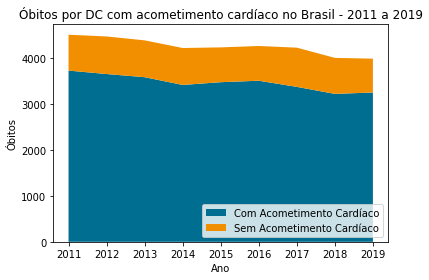

{'AC':        Obitos
ANO_O        
2011     3733
2012     3658
2013     3589
2014     3420
2015     3480
2016     3512
2017     3378
2018     3225
2019     3255, 'OC':        Obitos
ANO_O        
2011      782
2012      819
2013      803
2014      805
2015      759
2016      757
2017      855
2018      785
2019      738}


In [ ]:
#Agregando os óbitos por Doença de Chagas no Brasil, por ano
por_ano = { 'AC':chagas[chagas['CAUSABAS_O'].isin(['B570', 'B572'])].groupby('ANO_O').agg(Obitos=('ANO_O',pd.Series.count)),
'OC':chagas[chagas['CAUSABAS_O'].isin(['B571','B573','B574','B575'])].groupby('ANO_O').agg(Obitos=('ANO_O',pd.Series.count))}

fig, ax = plt.subplots()
ax.stackplot(por_ano['AC'].index,[por_ano['AC'].Obitos,por_ano['OC'].Obitos], labels=['Com Acometimento Cardíaco', 'Sem Acometimento Cardíaco'], colors=['#006E90', '#F18F01'])
#plt.ylim((3000,5000))
ax.set_xlabel('Ano')
ax.set_ylabel('Óbitos')
ax.set_title('Óbitos por DC com acometimento cardíaco no Brasil - 2011 a 2019')
ax.legend(loc='lower right')
plt.show()


print(por_ano)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


,Soma
SEXO,
0,1
1,17168
2,14080
9,1


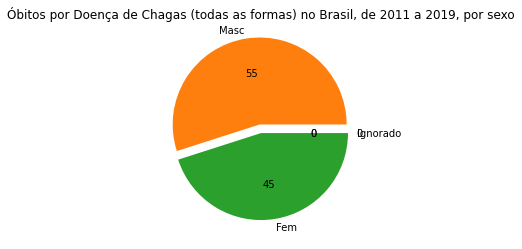

In [ ]:
#Distribuição por sexo, Chagas com Acometimento Cardíaco
por_sexo = chagas[chagas['CAUSABAS_O'].isin(['B570','B572'])].groupby('SEXO').agg(Soma=('SEXO',pd.Series.count))
labels = ['0','Masc','Fem','Ignorado']
explode = [0,0.1,0,0]

plt.pie(por_sexo, labels=labels, explode=explode, autopct='%.0f')
plt.title('Óbitos por Doença de Chagas (todas as formas) no Brasil, de 2011 a 2019, por sexo')
por_sexo

In [ ]:
#Carrega série histórica de população para BR e UFs
pop = pd.read_csv('pop_estimada_2011_2019.csv',sep=';', index_col='Ano')
print(pop)

#uf = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
#pop_novo = pd.DataFrame(columns=['UF', 'ANO', 'POP'], index=['UF','ANO'])
#print(pop_novo)

#"""for i in pop.index:
#  for a in uf:
#    #print(pop.loc(i,a))
#    print('Ano: ',i,', UF:',a)
#    print(pop.loc[i,a])"""


#pop_novo


             BR       RO      AC       AM      RR       PA      AP       TO  \
Ano                                                                           
2011  192379287  1576455  746386  3538387  460165  7688593  684309  1400892   
2012  193904015  1590011  758786  3590985  469524  7777543  698602  1417694   
2013  201032714  1728214  776463  3807921  488072  7969654  734996  1478164   
2014  202768562  1748531  790101  3873743  496936  8073924  750912  1496880   
2015  204450049  1768204  803513  3938336  505665  8175113  766679  1515126   
2016  206081432  1787279  816687  4001667  514229  8272724  782295  1532902   
2017  207660929  1805788  829619  4063614  522636  8366628  797722  1550194   
2018  208494900  1757589  869265  4080611  576568  8513497  829494  1555229   
2019  210147125  1777225  881935  4144597  605761  8602865  845731  1572866   

           MA       PI       CE       RN       PB       PE       AL       SE  \
Ano                                               

In [ ]:
#Computando óbitos por DC (todos os CIDs) por estado, de 2011 a 2019

por_estado = chagas.groupby(['ANO_O', 'UF']).agg({'ANO_O':pd.Series.count}).unstack(fill_value=0)
#por_estado = por_estado.sort_values(by='Abs',ascending=True)
print(por_estado)
#x=[]
#y=[]

#Computando óbitos proporcionais à população
for a in por_estado.index:
  for i in por_estado.loc[a].index:
    print(por_estado.loc[a,i])
    print('POP ', i[1],'ANO: ',a,'  -  ', pop.loc[a,i[1]])
    #print('NUMERADOR ', por_estado.loc[a,i])
    #print('DENOMINADOR ', pop.loc[a,i[1]])
    #print('TESTE ', por_estado.loc[a,i]/(pop.loc[a,i[1]]/ 100000))
    #por_estado.loc[a,i] = por_estado.loc[a,i]/pop.loc[a,i[1]]
    #x += [i[1]]
    #print('i[1] ', i[1] )
    #y += [np.around(por_estado.loc[a,i]/(pop.loc[a,i[1]]/ 100000),2)]
    #print('x ',x)
    #print('y ',y)

  #fig = plt.figure()
  #spacing = 0.3
  #fig.subplots_adjust(bottom=spacing)
#  plt.figure(figsize=(10,8))
#  plt.xlabel("Estado")
#  plt.ylabel("Número de óbitos a cada 100 mil habitantes")
#  plt.title('Número de óbitos por DC por estado, %i' %a)
#  plt.yticks(np.arange(0, 12.5, 0.3))
#  plt.bar(x,y, width=0.4)
#  for i in range(len(x)):
#        plt.text(i,y[i],y[i])
#  plt.show()
#  x=[]
#  y=[]

#plt.figure(figsize=(10,5))
#plt.title('Óbitos por Doença de Chagas (todas as formas) de 2011 a 2019, por estado')
#plt.bar(por_estado.index, por_estado['Abs'])

#por_estado

      ANO_O                                                                  \
UF       AC   AL AM AP   BA  CE   DF ES   GO  MA    MG  MS  MT  PA  PB   PE   
ANO_O                                                                         
2011      0  102  4  2  603  44  186  3  717   5  1156  42  52  17  31  107   
2012      2   87  1  0  593  60  198  3  734   6  1124  44  42  19  30  114   
2013      1   84  1  1  552  39  198  6  734  12  1120  38  46   9  22  107   
2014      0   99  0  3  540  39  176  4  678   9  1104  42  45  11  22  115   
2015      0   72  3  1  529  44  168  4  721   7  1097  42  46  14  42  110   
2016      1  107  0  0  529  49  163  4  680   9  1097  40  49  21  26  133   
2017      2   91  2  3  527  44  170  4  766   6  1034  46  57  19  29  101   
2018      1   79  2  0  576  48  177  5  675  10   970  46  54  22  33  102   
2019      1  100  2  0  566  55  155  7  691   9   972  34  47  18  25  103   

                                                   

<Figure size 432x288 with 0 Axes>

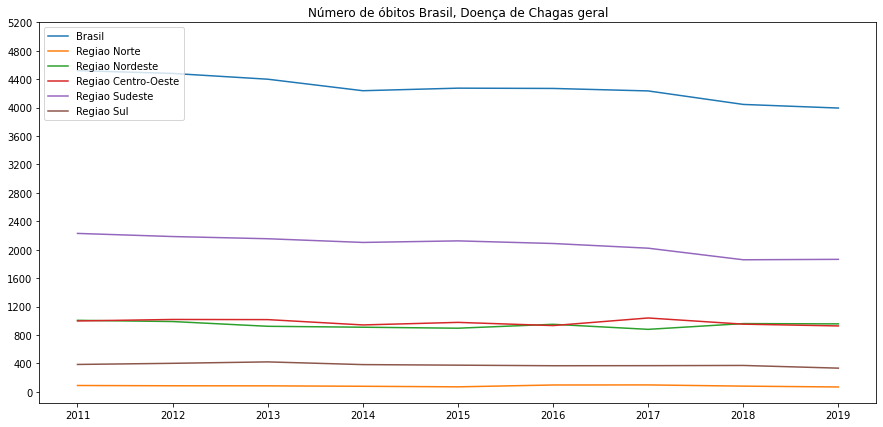

MultiIndex([('ANO_O', 'AC'),
            ('ANO_O', 'AL'),
            ('ANO_O', 'AM'),
            ('ANO_O', 'AP'),
            ('ANO_O', 'BA'),
            ('ANO_O', 'CE'),
            ('ANO_O', 'DF'),
            ('ANO_O', 'ES'),
            ('ANO_O', 'GO'),
            ('ANO_O', 'MA'),
            ('ANO_O', 'MG'),
            ('ANO_O', 'MS'),
            ('ANO_O', 'MT'),
            ('ANO_O', 'PA'),
            ('ANO_O', 'PB'),
            ('ANO_O', 'PE'),
            ('ANO_O', 'PI'),
            ('ANO_O', 'PR'),
            ('ANO_O', 'RJ'),
            ('ANO_O', 'RN'),
            ('ANO_O', 'RO'),
            ('ANO_O', 'RR'),
            ('ANO_O', 'RS'),
            ('ANO_O', 'SC'),
            ('ANO_O', 'SE'),
            ('ANO_O', 'SP'),
            ('ANO_O', 'TO')],
           names=[None, 'UF'])

In [ ]:
estados_norte = ['AC', 'AP', 'AM', 'RR', 'RO', 'PA', 'TO']
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE']
estados_centro = ['MT', 'MS', 'GO', 'DF']
estados_sudeste = ['SP', 'RJ', 'ES', 'MG']
estados_sul = ['SC', 'PR', 'RS', 'DF']

brasil_obitos = [0,0,0,0,0,0,0,0,0]
norte_obitos = [0,0,0,0,0,0,0,0,0]
nordeste_obitos = [0,0,0,0,0,0,0,0,0]
centro_obitos = [0,0,0,0,0,0,0,0,0]
sudeste_obitos = [0,0,0,0,0,0,0,0,0]
sul_obitos = [0,0,0,0,0,0,0,0,0]

for a in por_estado.index:
  for i in por_estado.loc[a].index:
    brasil_obitos[a-2011] += por_estado.loc[a,i]
    if(i[1] in estados_norte):
      norte_obitos[a-2011] += por_estado.loc[a,i]
    if(i[1] in estados_nordeste):
      nordeste_obitos[a-2011] += por_estado.loc[a,i]
    if(i[1] in estados_centro):
      centro_obitos[a-2011] += por_estado.loc[a,i]
    if(i[1] in estados_sudeste):
      sudeste_obitos[a-2011] += por_estado.loc[a,i]
    if(i[1] in estados_sul):
      sul_obitos[a-2011] += por_estado.loc[a,i]

y = [2011,2012,2013,2014,2015,2016,2017,2018,2019]

fig = plt.figure()
spacing = 0.3
fig.subplots_adjust(bottom=spacing)
plt.figure(figsize=(15,7))

plt.plot(y,brasil_obitos,label="Brasil")
plt.plot(y,norte_obitos,label="Regiao Norte")
plt.plot(y,nordeste_obitos,label="Regiao Nordeste")
plt.plot(y,centro_obitos,label="Regiao Centro-Oeste")
plt.plot(y,sudeste_obitos,label="Regiao Sudeste")
plt.plot(y,sul_obitos, label="Regiao Sul")

plt.legend(loc=		2)

plt.title('Número de óbitos Brasil, Doença de Chagas geral')
plt.yticks(np.arange(0, 5300, 400))
# function to show the plot
plt.show()
por_estado.columns


In [ ]:
acometimento_Cardiaco = chagas[~chagas['CAUSABAS_O'].isin(['B570','B572'])].groupby(['ANO_O', 'UF']).agg(Soma=('ANO_O',pd.Series.count)).unstack(fill_value=0)

#print(f"Total ao longo dos anos Nordeste: {df['NORDESTE'].sum(axis=0)}")
#print(f"Total ao longo dos anos Norte: {df['NORTE'].sum(axis=0)}"

#print(acometimento_Cardiaco)

brasil_obitos = [0,0,0,0,0,0,0,0,0]
norte_obitos = [0,0,0,0,0,0,0,0,0]
nordeste_obitos = [0,0,0,0,0,0,0,0,0]
centro_obitos = [0,0,0,0,0,0,0,0,0]
sudeste_obitos = [0,0,0,0,0,0,0,0,0]
sul_obitos = [0,0,0,0,0,0,0,0,0]

print('description - ',acometimento_Cardiaco.describe)

print('dtypes - ',acometimento_Cardiaco.dtypes)

print('colunas - ',acometimento_Cardiaco.columns)

#print('pra sima ',acometimento_Cardiaco[1][1])

print('uhuuum')

print('colunas - ',acometimento_Cardiaco.info())

print('shape - ',acometimento_Cardiaco.shape)

for a in acometimento_Cardiaco:
  #for i in por_estado.loc[a].index:
    #print('acometimento ',acometimento_Cardiaco[a][i[1]])
    #print('I : -',i[1])
  print(a)

#for a in Range(lenght(acometimento_Cardiaco.index)):
  #print(brasil_obitos)
  #if(a[1] == )
  #acometimento_Cardiaco.iloc[a][i]

##print(acometimento_Cardiaco.columns)
#print(acometimento_Cardiaco.dtypes)
#print(acometimento_Cardiaco.iloc[0][0])

#print(chagas.columns)
#print(chagas.dtypes)
#print(chagas.axes)

#for a in acometimento_Cardiaco.index:
  #print(a)
  #print(acometimento_Cardiaco.iloc[2])
  #print(a[acometimento_Cardiaco.length-1])


description -  <bound method NDFrame.describe of       Soma                                                                   \
UF      AC  AL AM AP   BA  CE  DF ES   GO MA   MG  MS  MT PA PB  PE  PI  PR   
ANO_O                                                                         
2011     0  16  2  1   81  10  36  1  127  2  152   5   9  4  6  21  21  52   
2012     1  10  1  0   82  12  36  1  139  1  168   9   7  5  5  21  10  54   
2013     0  14  0  0   91   6  46  0  154  3  146   7   8  3  4  17  11  48   
2014     0   9  0  1   86   7  38  1  148  3  185   7   4  1  5  25   9  58   
2015     0   7  0  0   99   9  27  0  134  3  186   5  12  6  6  21   7  57   
2016     1  14  0  0   86   7  18  0  115  1  148   6  13  7  4  27  12  44   
2017     0  15  0  0  100   9  24  0  156  1  186   7  12  4  7  19  14  52   
2018     0  13  0  0  116   8  32  1  128  1  184  11  14  6  1  17  17  48   
2019     0  19  1  0  104   7  20  0  126  0  156  12  10  6  2  22  11  40   

  

**CID-10 PARA DOENÇA DE CHAGAS**

**B57**	Doença de Chagas

**B570**	Forma aguda da doença de Chagas, com comprometimento cardíaco

**B571**	Forma aguda da doença de Chagas, sem comprometimento cardíaco

**B572**	Doença de Chagas (crônica) com comprometimento cardíaco

**B573**	Doença de Chagas (crônica) com comprometimento do aparelho digestivo

**B574**	Doença de Chagas (crônica) com comprometimento do sistema nervoso

**B575**	Doença de Chagas (crônica) com comprometimento de outros órgãos